In [100]:
import logging
import os
import pandas as pd
import sys

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
logger = logging.getLogger()
logger.setLevel(logging.INFO)
os.environ['STAGE'] = 'local'
sys.path.append('..')
pd.set_option('max_colwidth', 128)
jtplot.style()

def unload(module):
    def _unload(_module):
        if _module in sys.modules:
            print('Deleting', _module)
            del sys.modules[_module]
    keys_to_del = [k for k in sys.modules.keys() if k.startswith(module + '.')]
    [_unload(k) for k in keys_to_del]
    _unload(module)

time: 3.8 ms (started: 2021-07-12 22:54:32 -04:00)


In [101]:
MFA_CODE = 736343
!echo $MFA_CODE | aws-mfa
unload('boto3')
unload('db')
unload('job')
unload('lib')
unload('peewee')
unload('playhouse')
unload('sites')

INFO - Validating credentials for profile: default 
INFO - Your credentials are still valid for 39222.607941 seconds they will expire at 2021-07-13 13:48:16
Deleting boto3.utils
Deleting boto3.exceptions
Deleting boto3.resources
Deleting boto3.resources.params
Deleting boto3.resources.response
Deleting boto3.resources.model
Deleting boto3.docs.client
Deleting boto3.docs.base
Deleting boto3.docs.method
Deleting boto3.docs.utils
Deleting boto3.docs.action
Deleting boto3.docs.waiter
Deleting boto3.docs.collection
Deleting boto3.docs.subresource
Deleting boto3.docs.attr
Deleting boto3.docs.resource
Deleting boto3.docs.service
Deleting boto3.docs
Deleting boto3.docs.docstring
Deleting boto3.resources.action
Deleting boto3.resources.base
Deleting boto3.resources.collection
Deleting boto3.resources.factory
Deleting boto3.session
Deleting boto3.s3
Deleting boto3.s3.transfer
Deleting boto3.s3.inject
Deleting boto3
Deleting db.mappings
Deleting db.mappings.base
Deleting db.mappings.article
Delet

In [102]:
from datetime import datetime

from job.steps.fetch_data import fetch_data
# from db.mappings.article import Article
# from db.mappings.recommendation import Rec
from job.steps.scrape_metadata import scrape_metadata
from sites.sites import Sites
# from sites import washington_city_paper

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


time: 505 ms (started: 2021-07-12 22:54:34 -04:00)


In [103]:
qa_df = pd.read_csv('data/wcp_rec_module_qa.csv')
qa_df['date'] = pd.to_datetime(qa_df.date)

time: 8.22 ms (started: 2021-07-12 22:54:34 -04:00)


In [104]:
qa_df['source_external_id'] = qa_df.source_url.str.slice(start=31).apply(Sites.WCP.extract_external_id)
qa_df['rec_external_id'] = qa_df.rec_url.str.slice(start=31).apply(Sites.WCP.extract_external_id)

time: 3.62 ms (started: 2021-07-12 22:54:35 -04:00)


In [105]:
max_dt = pd.to_datetime(qa_df.date).max()
min_dt = pd.to_datetime(qa_df.date).min()

time: 1.97 ms (started: 2021-07-12 22:54:38 -04:00)


In [106]:
df = fetch_data(today_dt = max_dt, days=30 + (max_dt - min_dt).days)
df = df[df.landing_page_path.notna()]
df.to_csv('data/wcp_qa_interactions.csv', index=False)

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-00-20-53-4a77b1fe-33bf-4c2d-a386-66e92bfc80a2.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-00-20-53-4a77b1fe-33bf-4c2d-a386-66e92bfc80a2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-00-12-29-d4e54a9f-8c40-4e05-b5f4-359531c183b0.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-00-12-29-d4e54a9f-8c40-4e05-b5f4-359531c183b0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-00-33-43-4d12dc2d-ddfd-40fc-bbbb-e33a170c656a.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-00-33-43-4d12d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-01-45-17-e25024bd-8172-4468-b083-aa822a81133e.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-01-45-17-e25024bd-8172-4468-b083-aa822a81133e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-01-32-44-4643b6a3-134e-43f2-9384-a66633edce60.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-01-32-44-4643b6a3-134e-43f2-9384-a66633edce60.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-01-53-45-5747a336-4033-4d1c-bd88-015b834cbb3f.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-01-53-45-5747a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-03-31-06-ceb08caf-fab6-48ef-aa0f-25d81a7c1c92.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-03-31-06-ceb08caf-fab6-48ef-aa0f-25d81a7c1c92.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-03-39-36-d4ef7704-7378-4f1e-aedc-ebbdf77e85e5.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-03-39-36-d4ef7704-7378-4f1e-aedc-ebbdf77e85e5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-04-09-15-d1eed26c-dd30-4bea-954f-fbee93ed4503.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-04-09-15-d1eed

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-05-43-20-24b51694-3794-40ce-91b2-d19bc21fca3f.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-05-43-20-24b51694-3794-40ce-91b2-d19bc21fca3f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-05-30-19-17cd0ab0-09b8-4689-9937-01794382992e.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-05-30-19-17cd0ab0-09b8-4689-9937-01794382992e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-05-21-51-64cbe3ef-b3a1-4579-b19d-f679b8b57d68.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-05-21-51-64cbe

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-07-08-05-a5dce3e3-26e1-409f-8130-8d4b02b8dd3e.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-07-08-05-a5dce3e3-26e1-409f-8130-8d4b02b8dd3e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-07-17-00-6f55396d-229b-41a5-a3de-ad3f9d53352f.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-07-17-00-6f55396d-229b-41a5-a3de-ad3f9d53352f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-07-30-07-76da9b84-c699-412d-8847-33837039d935.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-07-30-07-76da9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-09-18-36-e96e0755-8210-4b13-bbf6-a38580313aee.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-09-18-36-e96e0755-8210-4b13-bbf6-a38580313aee.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-08-57-38-e46f7ea3-48f1-4a73-adc7-cdc596b3ac06.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-08-57-38-e46f7ea3-48f1-4a73-adc7-cdc596b3ac06.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-09-06-01-3ca0275a-41dc-4c93-8b4e-645f18cf1503.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-09-06-01-3ca02

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-11-19-32-9a54ec07-4ea0-4ea7-b47d-2ac6e30c030a.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-11-19-32-9a54ec07-4ea0-4ea7-b47d-2ac6e30c030a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-11-02-47-3fcac6c3-ec58-4165-a581-cba1d9e656ad.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-11-02-47-3fcac6c3-ec58-4165-a581-cba1d9e656ad.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-10-49-09-46595477-9c2d-4962-b524-232a9104e9a1.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-10-49-09-46595

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-12-53-24-51cc0442-e849-4ee1-bb0d-95dc183170a4.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-12-53-24-51cc0442-e849-4ee1-bb0d-95dc183170a4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-12-40-39-6d60af7b-c2c4-45bc-8510-b099958fd534.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-12-40-39-6d60af7b-c2c4-45bc-8510-b099958fd534.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-13-06-05-31377bb4-c306-476f-960e-8c0efaacf796.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-13-06-05-31377

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-14-00-46-0b7aecfc-75d3-4608-9d02-fa71ec4652b6.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-14-00-46-0b7aecfc-75d3-4608-9d02-fa71ec4652b6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-14-09-09-d4fdb5da-e99e-4b59-b5a0-7ae182e949e0.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-14-09-09-d4fdb5da-e99e-4b59-b5a0-7ae182e949e0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-14-34-51-33bb5a16-f363-463c-999c-c0216984c859.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-14-34-51-33bb5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-15-50-36-5bee6f86-0bb6-4e09-a14d-c537e9510f08.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-15-50-36-5bee6f86-0bb6-4e09-a14d-c537e9510f08.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-15-33-40-a2cab957-ff86-4406-8286-1734a27d72e6.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-15-33-40-a2cab957-ff86-4406-8286-1734a27d72e6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-15-42-04-39998708-df8e-4bb4-b31a-e05f10582e68.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-15-42-04-39998

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-17-18-50-36165753-7141-424c-9ed6-29df82c12083.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-17-18-50-36165753-7141-424c-9ed6-29df82c12083.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-17-39-52-f4f15e30-6bd7-4fb7-8f78-96e8992e94b2.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-17-39-52-f4f15e30-6bd7-4fb7-8f78-96e8992e94b2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-16-49-33-01b56363-938c-4e2a-b352-84a6d5626b5c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-16-49-33-01b56

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-18-34-28-5276ab44-58cb-44ee-8c14-d145c975b643.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-18-34-28-5276ab44-58cb-44ee-8c14-d145c975b643.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-18-26-10-654484c6-aa4c-46cd-980a-2f1d85f2e29a.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-18-26-10-654484c6-aa4c-46cd-980a-2f1d85f2e29a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-18-42-50-d6617d29-6a1f-4b0e-9eb7-43832b6ff0a0.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-18-42-50-d6617

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-20-02-24-8767fe72-dc35-4da4-aa0c-32f47c94cb85.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-20-02-24-8767fe72-dc35-4da4-aa0c-32f47c94cb85.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-19-58-16-b41bfa32-fd9d-41a0-8048-8c9438c6399e.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-19-58-16-b41bfa32-fd9d-41a0-8048-8c9438c6399e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-20-10-41-1a9a6c15-ad59-4699-a29e-6b25a8bab3a2.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-20-10-41-1a9a6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-21-26-11-f9b3c97f-a13f-4470-a19d-0c1a73740e88.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-21-26-11-f9b3c97f-a13f-4470-a19d-0c1a73740e88.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-21-34-46-bf2a7636-08b1-41ab-a90d-cdb6d90ba4ab.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-21-34-46-bf2a7636-08b1-41ab-a90d-cdb6d90ba4ab.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-21-30-31-0bad558b-1879-40e6-866d-3931011965c9.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-21-30-31-0bad5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-23-03-37-3267254f-8ca5-4750-8e55-23f4e5403c97.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-23-03-37-3267254f-8ca5-4750-8e55-23f4e5403c97.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-23-07-57-3269d78d-3e97-4410-8e5c-095167b821b4.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-23-07-57-3269d78d-3e97-4410-8e5c-095167b821b4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/12/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-22-50-58-3fa12662-5fb0-444a-9f61-932083f9f9be.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-12-22-50-58-3fa12

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-01-22-04-d2db0386-c60e-46a4-b43c-c604af517e11.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-01-22-04-d2db0386-c60e-46a4-b43c-c604af517e11.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-01-26-24-0c1f6cfe-91d3-47d9-86dd-0ee55ec730d3.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-01-26-24-0c1f6cfe-91d3-47d9-86dd-0ee55ec730d3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-01-39-01-96309887-9f0c-46ad-b55f-09d2379d1102.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-01-39-01-96309

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-03-20-02-bf0f5c7b-3768-4bce-8d98-55b011d7eb84.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-03-20-02-bf0f5c7b-3768-4bce-8d98-55b011d7eb84.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-03-32-35-d1abfa98-bece-4832-b4c9-facda41d54c3.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-03-32-35-d1abfa98-bece-4832-b4c9-facda41d54c3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-03-45-06-00d59dde-e702-46eb-b0b2-781a079637d2.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-03-45-06-00d59

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-05-19-30-a439310e-5994-41d1-a3cb-4880cc6301c8.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-05-19-30-a439310e-5994-41d1-a3cb-4880cc6301c8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-05-40-50-4bdf9f23-9aea-465b-bde3-9230e736814d.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-05-40-50-4bdf9f23-9aea-465b-bde3-9230e736814d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-05-32-18-03096339-956d-4989-8f5e-4178ecc2f2fa.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-05-32-18-03096

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-07-06-41-bee69abe-4f57-4154-8ccc-2acd549a0122.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-07-06-41-bee69abe-4f57-4154-8ccc-2acd549a0122.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-07-15-51-57132ad1-7d38-4c99-b02d-5ef2d54562aa.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-07-15-51-57132ad1-7d38-4c99-b02d-5ef2d54562aa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-06-53-16-1fd7be10-f6df-41b0-b4cb-69a938f01245.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-06-53-16-1fd7b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-09-12-22-4cdc027a-6dd3-4a5a-b3ec-8dae9a836c85.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-09-12-22-4cdc027a-6dd3-4a5a-b3ec-8dae9a836c85.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-09-08-03-29182a68-de45-4ce8-a454-8119b88b8165.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-09-08-03-29182a68-de45-4ce8-a454-8119b88b8165.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-09-20-57-0f587a40-866a-4b2d-8905-70ed09cfbf47.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-09-20-57-0f587

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-11-18-18-7120664f-9b68-41f4-b5fb-9f9dce52175b.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-11-18-18-7120664f-9b68-41f4-b5fb-9f9dce52175b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-11-31-00-e39c0c4b-5725-41a4-9c3a-6275c8420c11.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-11-31-00-e39c0c4b-5725-41a4-9c3a-6275c8420c11.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-11-26-50-f243be54-159d-4ad3-936c-48f8b22f9053.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-11-26-50-f243b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-13-17-10-7d3cc138-34d1-4717-a42a-1d4e6863e853.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-13-17-10-7d3cc138-34d1-4717-a42a-1d4e6863e853.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-13-12-55-48743d61-ba2b-4fae-bb1b-762f4ecb1b60.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-13-12-55-48743d61-ba2b-4fae-bb1b-762f4ecb1b60.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-13-08-41-939dfc3a-63d8-438d-b449-1cae82523a1b.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-13-08-41-939df

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-15-19-47-765f04eb-c6ab-4941-bd48-4ab649e256e4.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-15-19-47-765f04eb-c6ab-4941-bd48-4ab649e256e4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-15-44-44-f23826cd-c1ef-40d3-bae3-5efe9a81882c.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-15-44-44-f23826cd-c1ef-40d3-bae3-5efe9a81882c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-15-28-09-7661ee52-971e-40ff-a47c-795314739e70.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-15-28-09-7661e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-16-56-48-2f3eb199-20bd-429a-b94e-3076ea04c2b4.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-16-56-48-2f3eb199-20bd-429a-b94e-3076ea04c2b4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-17-22-09-df39d8d9-c622-421a-abd6-06db5dda3a49.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-17-22-09-df39d8d9-c622-421a-abd6-06db5dda3a49.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-16-39-59-21df09b5-3c87-4c39-8be4-1b39ad333f19.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-16-39-59-21df0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-18-56-00-fc91a4b0-9c6d-4c1a-afb0-fe72af2732ba.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-18-56-00-fc91a4b0-9c6d-4c1a-afb0-fe72af2732ba.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-19-12-48-25447f35-b746-4fb6-a9fe-ab93dd6a287c.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-19-12-48-25447f35-b746-4fb6-a9fe-ab93dd6a287c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-19-29-32-097e73ae-ca19-4185-bedc-22c5e64504e4.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-19-29-32-097e7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-20-41-08-a8a67648-14d9-45c6-82de-179c6522d65a.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-20-41-08-a8a67648-14d9-45c6-82de-179c6522d65a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-20-49-30-11fa84b2-0e37-46e5-96fa-acf37aefcaad.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-20-49-30-11fa84b2-0e37-46e5-96fa-acf37aefcaad.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-20-57-55-0ff3e29c-e166-4205-9da6-a8b255d8707b.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-20-57-55-0ff3e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-23-00-31-d5d499f8-0bd9-4dd4-b5c3-01936a020ee9.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-23-00-31-d5d499f8-0bd9-4dd4-b5c3-01936a020ee9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-22-35-10-e7037c9b-5b7e-4b49-8bb9-2f405824ddca.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-22-35-10-e7037c9b-5b7e-4b49-8bb9-2f405824ddca.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/11/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-22-43-38-81bb9bd3-7b49-4bc7-9dbb-f59b6fc3cc02.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-11-22-43-38-81bb9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-00-04-05-71f367f8-2eb3-407b-b542-cc570f08fadf.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-00-04-05-71f367f8-2eb3-407b-b542-cc570f08fadf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-00-16-34-abd13cfb-1b51-4dbc-b5f7-87d0cd1c64db.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-00-16-34-abd13cfb-1b51-4dbc-b5f7-87d0cd1c64db.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-00-12-24-46a6082b-204b-4222-a078-fb18fe7ba938.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-00-12-24-46a60

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-01-32-24-a9b77096-d2fa-4a66-853d-dbddc16730dc.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-01-32-24-a9b77096-d2fa-4a66-853d-dbddc16730dc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-01-28-06-e4594a91-823f-4bd7-bc04-ea2c0c8b3daa.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-01-28-06-e4594a91-823f-4bd7-bc04-ea2c0c8b3daa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-01-11-02-78a10cb8-a8ac-4f60-bf25-3a639216deb1.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-01-11-02-78a10

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-02-56-00-a4bc6b62-bef9-4006-bd7d-0f77b1db798e.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-02-56-00-a4bc6b62-bef9-4006-bd7d-0f77b1db798e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-03-00-08-ccbf8cf8-838a-4000-8774-ca13e4fc83ec.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-03-00-08-ccbf8cf8-838a-4000-8774-ca13e4fc83ec.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-03-08-32-0a8e8671-2f62-42cf-90d1-9a5e60f613f3.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-03-08-32-0a8e8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-04-51-07-bd48fa94-fdf5-4245-81ff-488955fa7f05.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-04-51-07-bd48fa94-fdf5-4245-81ff-488955fa7f05.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-05-12-25-f3aaa255-5760-4805-a2ce-725f5fb2301f.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-05-12-25-f3aaa255-5760-4805-a2ce-725f5fb2301f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-04-59-34-3af3c419-ba5f-4b16-980f-bf74fd6e9afd.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-04-59-34-3af3c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-06-46-24-b63f88ad-52fe-4bb5-8b50-4c393f79a059.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-06-46-24-b63f88ad-52fe-4bb5-8b50-4c393f79a059.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-06-59-07-6e0af113-53df-42ef-ae27-23298adcbdcc.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-06-59-07-6e0af113-53df-42ef-ae27-23298adcbdcc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-07-03-24-9deb5679-38a7-4fd7-be67-18e02129afc3.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-07-03-24-9deb5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-08-53-40-881dcb6a-bfbb-4454-b184-231a84480046.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-08-53-40-881dcb6a-bfbb-4454-b184-231a84480046.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-08-58-40-b81a4718-06af-4557-90fe-3d8dd56438cd.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-08-58-40-b81a4718-06af-4557-90fe-3d8dd56438cd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-08-36-47-53f1656c-7c4e-4228-9e24-0429fad042ff.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-08-36-47-53f16

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-10-51-54-c8bc9d7f-1b76-436b-aaec-b39a6033a7a7.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-10-51-54-c8bc9d7f-1b76-436b-aaec-b39a6033a7a7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-10-56-15-926c4ff4-4ba6-4dc7-bd0f-4e5786a52d73.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-10-56-15-926c4ff4-4ba6-4dc7-bd0f-4e5786a52d73.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-10-43-29-ad3d581b-5277-48bb-bd1e-8098b13286e4.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-10-43-29-ad3d5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-12-17-43-28ab5765-9ad6-4761-ad66-01982ee79a8d.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-12-17-43-28ab5765-9ad6-4761-ad66-01982ee79a8d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-12-59-58-7f9cd03f-2452-4976-8361-f6c4a6c1a2c3.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-12-59-58-7f9cd03f-2452-4976-8361-f6c4a6c1a2c3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-12-55-45-02b472b9-fb93-4fd7-984e-89b79b7a6df7.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-12-55-45-02b47

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-14-32-50-4997aae0-28d0-44c8-8b3c-c2779207681e.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-14-32-50-4997aae0-28d0-44c8-8b3c-c2779207681e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-14-16-17-ce0dfb4e-f3f3-4c65-b5b8-9717ae9ae525.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-14-16-17-ce0dfb4e-f3f3-4c65-b5b8-9717ae9ae525.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-14-24-32-8c49901e-28ea-490f-8ef7-5330fddca190.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-14-24-32-8c499

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-16-18-17-4d5b360c-edfd-42ec-94d2-9ae456fdef97.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-16-18-17-4d5b360c-edfd-42ec-94d2-9ae456fdef97.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-16-01-41-4e1ab144-fd02-49ba-ae3c-6ff8fcd4c282.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-16-01-41-4e1ab144-fd02-49ba-ae3c-6ff8fcd4c282.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-15-53-20-69f9a452-d257-4514-a978-a59ebab03a0a.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-15-53-20-69f9a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-17-54-43-86b5ba63-0376-4317-93e5-39b603168b08.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-17-54-43-86b5ba63-0376-4317-93e5-39b603168b08.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-17-42-00-01f00504-fd29-4cd3-a8db-8303cafc4a45.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-17-42-00-01f00504-fd29-4cd3-a8db-8303cafc4a45.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-18-07-12-77f533b1-ebe8-421a-9720-b095923c50f8.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-18-07-12-77f53

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-19-31-28-c66b569f-62aa-4689-9b2c-30d26a25381b.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-19-31-28-c66b569f-62aa-4689-9b2c-30d26a25381b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-19-56-56-afd20050-e8d8-472d-b746-012065aa13b3.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-19-56-56-afd20050-e8d8-472d-b746-012065aa13b3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-19-36-03-4c4879e8-373b-4a8f-8d25-aa5299efb420.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-19-36-03-4c487

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-21-42-06-c079f02f-c8e7-417f-9e12-7fbecbf5cd20.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-21-42-06-c079f02f-c8e7-417f-9e12-7fbecbf5cd20.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-21-46-14-a642611f-0354-4eaa-ad5f-e345afc87cb3.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-21-46-14-a642611f-0354-4eaa-ad5f-e345afc87cb3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-22-07-22-070933dd-1c17-494e-b830-60031dabab8f.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-22-07-22-07093

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-23-53-00-500617e9-2c1e-4c3e-a2a8-0874e1d9636c.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-23-53-00-500617e9-2c1e-4c3e-a2a8-0874e1d9636c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-23-35-52-0da20f11-ce68-4481-b0a2-5f3d39dcda52.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-23-35-52-0da20f11-ce68-4481-b0a2-5f3d39dcda52.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/10/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-23-57-15-64bf804f-ec66-4546-9fd3-4997802e2de7.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-10-23-57-15-64bf8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-03-08-51-78f03556-30f3-4fe2-abc8-54744575ef53.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-03-08-51-78f03556-30f3-4fe2-abc8-54744575ef53.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-03-17-19-a7799272-b9ab-4b27-81ea-cc46dc03b766.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-03-17-19-a7799272-b9ab-4b27-81ea-cc46dc03b766.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-03-29-47-352c6f05-9455-4e49-b873-e4ab99f425cd.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-03-29-47-352c6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-04-45-22-6d3c1fce-6e26-43c1-b2fb-91ea38260df1.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-04-45-22-6d3c1fce-6e26-43c1-b2fb-91ea38260df1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-04-41-14-489b716b-eec2-4870-bb9f-2af248f5fcec.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-04-41-14-489b716b-eec2-4870-bb9f-2af248f5fcec.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-04-49-37-33af2d4b-391d-4dd3-900e-2ce2bb0029b3.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-04-49-37-33af2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-06-48-38-0f22d880-7070-4f18-97d3-2f5a45949a1e.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-06-48-38-0f22d880-7070-4f18-97d3-2f5a45949a1e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-06-40-08-012dd9ed-4765-48ed-8cc7-a02a00e6fa19.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-06-40-08-012dd9ed-4765-48ed-8cc7-a02a00e6fa19.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-07-01-27-6c330786-be33-4cf0-bbfd-754d12e9d9c8.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-07-01-27-6c330

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-08-29-15-8e6e98fd-8590-46fb-ab0f-05098f4380ef.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-08-29-15-8e6e98fd-8590-46fb-ab0f-05098f4380ef.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-08-37-51-3dc400f1-04c8-4b18-a502-dd3213bf9b6a.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-08-37-51-3dc400f1-04c8-4b18-a502-dd3213bf9b6a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-08-59-24-9a69be01-ab27-45cc-bfcc-d75f8d20a4c3.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-08-59-24-9a69b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-10-17-59-10527b2b-fedf-4420-bfa2-80b30c190670.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-10-17-59-10527b2b-fedf-4420-bfa2-80b30c190670.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-10-43-59-c3889576-3e78-4579-8ed4-3f006e86b797.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-10-43-59-c3889576-3e78-4579-8ed4-3f006e86b797.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-10-09-13-0144c64c-58f7-4a9e-b8ad-3da07a3b8109.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-10-09-13-0144c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-12-25-11-ee41c3cc-0fae-4e7e-ae1c-652e3d1bb216.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-12-25-11-ee41c3cc-0fae-4e7e-ae1c-652e3d1bb216.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-12-12-37-9975725c-2021-4765-8a50-35b888be2836.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-12-12-37-9975725c-2021-4765-8a50-35b888be2836.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-11-55-48-18e7dcc0-0a68-4aba-b700-00f7d0015a2e.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-11-55-48-18e7d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-13-49-25-d700beea-7a94-46a5-8b28-2e8ca092a341.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-13-49-25-d700beea-7a94-46a5-8b28-2e8ca092a341.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-14-14-43-d1c861cb-ea03-499c-855e-3ac2745bded1.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-14-14-43-d1c861cb-ea03-499c-855e-3ac2745bded1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-14-01-54-37bc5a20-4070-434f-a41f-bd5704165682.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-14-01-54-37bc5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-15-18-05-b133a928-51fe-4bfc-9102-7f5171da2161.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-15-18-05-b133a928-51fe-4bfc-9102-7f5171da2161.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-15-30-40-e3b0b5de-3987-4036-b935-adec01194f2e.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-15-30-40-e3b0b5de-3987-4036-b935-adec01194f2e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-15-39-01-6168f2bd-3875-44e1-b79c-5bc705e1cad5.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-15-39-01-6168f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-16-46-20-4bc3a7e7-e339-4597-800e-7c921ed54fa8.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-16-46-20-4bc3a7e7-e339-4597-800e-7c921ed54fa8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-16-54-41-4fe01372-0006-4292-8f4e-d2fe860499e5.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-16-54-41-4fe01372-0006-4292-8f4e-d2fe860499e5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-17-15-41-f8256d65-9cbb-4358-b525-a56760780359.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-17-15-41-f8256

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-18-35-41-d56511e1-caf7-4783-89a4-295f4a4a8de4.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-18-35-41-d56511e1-caf7-4783-89a4-295f4a4a8de4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-18-23-06-d3158e70-62c3-4dc4-86c3-76b0a2dcd496.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-18-23-06-d3158e70-62c3-4dc4-86c3-76b0a2dcd496.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-18-27-17-33e2de16-5970-40ee-a6cc-8d282dfe4b36.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-18-27-17-33e2d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-19-59-29-034dad00-8978-41b9-89a0-6263f40ac698.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-19-59-29-034dad00-8978-41b9-89a0-6263f40ac698.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-19-55-12-8e7aa878-9d77-4724-aec5-d82d03b7862d.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-19-55-12-8e7aa878-9d77-4724-aec5-d82d03b7862d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-20-07-54-bdb9ad19-d805-44ee-8f5a-b175fc781539.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-20-07-54-bdb9a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-21-10-52-5a3d074f-f1cf-4f98-90f1-b98329c6ae73.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-21-10-52-5a3d074f-f1cf-4f98-90f1-b98329c6ae73.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-21-36-13-7dcac04a-0038-4d52-bec7-ccf9e86cc204.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-21-36-13-7dcac04a-0038-4d52-bec7-ccf9e86cc204.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-21-31-57-afdeb93f-1861-4d06-8d95-d5823c5e6858.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-21-31-57-afdeb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-23-13-46-2fdb7dad-b367-46ae-8dca-d5bdeb7033fb.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-23-13-46-2fdb7dad-b367-46ae-8dca-d5bdeb7033fb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-23-26-23-488475e0-84d6-48d6-a0a2-e9e671e00b6c.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-23-26-23-488475e0-84d6-48d6-a0a2-e9e671e00b6c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/09/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-23-22-07-f94c79f8-666d-48f7-b759-8a09a760106b.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-09-23-22-07-f94c7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-01-52-04-e895870f-fd0d-4d5a-801d-4eb95bf1ecfe.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-01-52-04-e895870f-fd0d-4d5a-801d-4eb95bf1ecfe.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-01-26-33-6d955370-c412-4d29-8c69-13a9b13f1e95.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-01-26-33-6d955370-c412-4d29-8c69-13a9b13f1e95.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-01-47-51-d5b212e6-0bfa-44a5-9aaf-7dbcf985b6bd.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-01-47-51-d5b21

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-03-11-53-54bd9c56-7d77-46ee-9c3c-40fabe4abfae.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-03-11-53-54bd9c56-7d77-46ee-9c3c-40fabe4abfae.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-03-16-08-c2fe0121-5a9e-46fe-a1ce-928f9de6c43c.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-03-16-08-c2fe0121-5a9e-46fe-a1ce-928f9de6c43c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-03-07-37-83fbcb11-9431-4247-b135-e147af516982.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-03-07-37-83fbc

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-04-36-58-726f0917-1b63-44c1-a279-47b337b6d128.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-04-36-58-726f0917-1b63-44c1-a279-47b337b6d128.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-04-53-58-d825d84e-dc5e-4680-b9b1-defe89ca0ef7.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-04-53-58-d825d84e-dc5e-4680-b9b1-defe89ca0ef7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-04-49-43-dc45b60b-db5c-4f87-a8ba-8a465a6387ae.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-04-49-43-dc45b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-06-47-23-5adae0be-1b5f-470e-bc4b-85c667f62b58.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-06-47-23-5adae0be-1b5f-470e-bc4b-85c667f62b58.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-06-39-01-ede57341-cdd2-4ed7-aaec-6f155da711a7.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-06-39-01-ede57341-cdd2-4ed7-aaec-6f155da711a7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-06-30-13-57722e44-4470-4505-9426-f2ed16c4a503.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-06-30-13-57722

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-08-22-45-d812b41c-0c20-4796-a8cb-17a6fdc7b503.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-08-22-45-d812b41c-0c20-4796-a8cb-17a6fdc7b503.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-08-26-59-8ea6997d-d38a-483e-973d-9ee4dceee94d.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-08-26-59-8ea6997d-d38a-483e-973d-9ee4dceee94d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-08-48-29-53e6729b-9459-434d-b91b-eb1c86ff0a66.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-08-48-29-53e67

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-10-11-29-23e3a580-5da2-4d73-8fc6-b656fea8b77c.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-10-11-29-23e3a580-5da2-4d73-8fc6-b656fea8b77c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-10-24-19-6551583a-e166-4602-8ca4-d396cd589651.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-10-24-19-6551583a-e166-4602-8ca4-d396cd589651.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-10-32-53-159b0429-0bce-48b7-ac6b-23c360a4d213.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-10-32-53-159b0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-12-26-29-176527b1-be4f-4dbd-8c39-3bffcfbc5a09.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-12-26-29-176527b1-be4f-4dbd-8c39-3bffcfbc5a09.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-12-09-44-5e5bc82e-649b-4da9-92bc-0842a33f518f.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-12-09-44-5e5bc82e-649b-4da9-92bc-0842a33f518f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-12-18-01-5a9633a8-c665-4d3f-8b3e-4d3d7c136470.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-12-18-01-5a963

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-13-54-59-09bc7c9a-ca78-4124-b6d5-c477b17a6c4e.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-13-54-59-09bc7c9a-ca78-4124-b6d5-c477b17a6c4e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-14-03-25-f6d55b41-f841-44fb-a08c-55dcdd6e1483.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-14-03-25-f6d55b41-f841-44fb-a08c-55dcdd6e1483.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-14-11-53-076ab882-1fc3-43c6-852c-a4d479792939.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-14-11-53-076ab

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-15-22-36-f744dde7-1cfd-46cf-96a0-c0aea9ce5971.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-15-22-36-f744dde7-1cfd-46cf-96a0-c0aea9ce5971.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-15-35-21-62e8f3af-67f6-452a-a203-a96c5f8cbb1a.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-15-35-21-62e8f3af-67f6-452a-a203-a96c5f8cbb1a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-15-31-06-5eacceaf-28d4-4bf5-8c81-1c9bf5195a3f.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-15-31-06-5eacc

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-16-42-25-afe1a974-ec15-439d-b83e-8861d566ee0c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-16-42-25-afe1a974-ec15-439d-b83e-8861d566ee0c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-16-38-10-1326f188-39a0-43d9-bcec-72185cef16bc.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-16-38-10-1326f188-39a0-43d9-bcec-72185cef16bc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-17-03-24-89a2c8af-64c3-4902-94d0-82c9863b5006.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-08-17-03-24-89a2c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-17-57-46-348e248e-06a9-4700-8b9d-a5d848464bb0.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-17-57-46-348e248e-06a9-4700-8b9d-a5d848464bb0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-18-10-18-b6c32428-7f78-4ef3-98d3-830ee039affc.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-18-10-18-b6c32428-7f78-4ef3-98d3-830ee039affc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-18-18-37-8c29bb98-02ca-461b-8f3b-3ffbd0c716c0.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-18-18-37-8c29b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-19-38-29-a097a331-0c7b-4dfb-8f40-5fab650c9212.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-19-38-29-a097a331-0c7b-4dfb-8f40-5fab650c9212.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-20-08-12-2c4a572c-da19-4977-bc06-e2fe7a06b5dc.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-20-08-12-2c4a572c-da19-4977-bc06-e2fe7a06b5dc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-20-12-22-198015c3-5e44-41b3-97d9-238d47f58dab.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-20-12-22-19801

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-21-19-29-6c0378a0-6911-4d3d-a2a7-5184772ec649.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-21-19-29-6c0378a0-6911-4d3d-a2a7-5184772ec649.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-21-15-22-f0ed065d-5fe0-4fcc-b44c-a04204cef9e1.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-21-15-22-f0ed065d-5fe0-4fcc-b44c-a04204cef9e1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-21-32-19-e2688061-2af8-4b76-a503-d42f5af66265.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-21-32-19-e2688

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-22-56-01-8499c19a-ecdd-4733-aaab-4ca8a5aaee98.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-22-56-01-8499c19a-ecdd-4733-aaab-4ca8a5aaee98.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-23-08-34-6b48e395-43a3-4d5b-b9e4-365c923671a8.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-23-08-34-6b48e395-43a3-4d5b-b9e4-365c923671a8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/08/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-23-00-11-6f712769-f1ca-479c-a551-8fb33de502ce.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-3-2021-07-08-23-00-11-6f712

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-01-17-05-b09512c9-05db-439d-bae7-810365d35ea9.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-01-17-05-b09512c9-05db-439d-bae7-810365d35ea9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-01-00-26-748b4bee-0c67-4de5-b011-7f4b3628ff9a.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-01-00-26-748b4bee-0c67-4de5-b011-7f4b3628ff9a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-01-33-47-c29bef7c-ef6f-472f-97f2-46477e4d4663.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-01-33-47-c29be

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-02-45-05-c4ae6bd7-00c9-4999-88c6-2d6ff3ed3487.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-02-45-05-c4ae6bd7-00c9-4999-88c6-2d6ff3ed3487.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-02-49-11-eea7cdfa-45f0-442d-a39c-c959ef9e9c12.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-02-49-11-eea7cdfa-45f0-442d-a39c-c959ef9e9c12.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-03-06-03-54a016f1-70a4-42e0-8db0-6f3675865473.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-03-06-03-54a01

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-04-40-33-71d2cd36-2904-4c15-b64d-8415a8e084f2.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-04-40-33-71d2cd36-2904-4c15-b64d-8415a8e084f2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-04-05-09-dcbcf29a-8d69-4d87-9f4d-76323e858779.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-04-05-09-dcbcf29a-8d69-4d87-9f4d-76323e858779.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-04-48-54-82a204a7-13db-44d9-8376-12f09a3c1a62.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-04-48-54-82a20

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-06-37-03-07785280-dd9b-4bb7-87b2-3a1f6d5260a9.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-06-37-03-07785280-dd9b-4bb7-87b2-3a1f6d5260a9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-06-28-20-f42bdfd7-6283-492b-ad56-963f9970e0e8.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-06-28-20-f42bdfd7-6283-492b-ad56-963f9970e0e8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-06-49-49-decc2314-9bbe-4309-98d3-cc058974d9c2.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-06-49-49-decc2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-07-32-45-4f1223e8-c24a-4f90-91ed-f309f342af9b.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-07-32-45-4f1223e8-c24a-4f90-91ed-f309f342af9b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-08-27-19-18f34b18-f1d1-40e3-b7de-1f0e879a2f99.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-08-27-19-18f34b18-f1d1-40e3-b7de-1f0e879a2f99.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-08-13-48-ede7576d-847e-4df0-b818-cb06e50bf083.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-08-13-48-ede75

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-10-14-04-84048ed7-3a8e-4af9-8156-5054dca5c373.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-10-14-04-84048ed7-3a8e-4af9-8156-5054dca5c373.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-10-23-25-d16cfb9c-533e-43dd-92ce-8f815092f1e1.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-10-23-25-d16cfb9c-533e-43dd-92ce-8f815092f1e1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-10-00-54-e2feee39-2a03-4def-8c84-bbe5f593472f.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-10-00-54-e2fee

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-11-53-17-5c0d1283-eb4a-4e7f-963d-8aeb34aafcfc.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-11-53-17-5c0d1283-eb4a-4e7f-963d-8aeb34aafcfc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-11-40-26-352ea651-8d8f-4118-98ae-754d327c4cd6.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-11-40-26-352ea651-8d8f-4118-98ae-754d327c4cd6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-12-01-46-8ec8c959-0839-4b02-bb24-56fbafc5d1f8.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-12-01-46-8ec8c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-13-18-01-c1c8458d-3bc6-4b73-a3eb-cc0052bb0617.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-13-18-01-c1c8458d-3bc6-4b73-a3eb-cc0052bb0617.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-13-13-53-6a9a2224-8ab0-48be-a576-6cc339fc350f.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-13-13-53-6a9a2224-8ab0-48be-a576-6cc339fc350f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-13-34-47-f84ecc3c-a7ad-4c69-9eb6-bef88ca797ba.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-13-34-47-f84ec

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-14-50-28-731eee76-f273-4721-bdcf-06e8f381622c.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-14-50-28-731eee76-f273-4721-bdcf-06e8f381622c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-14-46-12-1fa2f4da-3def-45a4-8ab7-b00538e5f6ad.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-14-46-12-1fa2f4da-3def-45a4-8ab7-b00538e5f6ad.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-15-28-40-a9939139-e021-4cb2-b17c-bd8009ca5cf5.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-15-28-40-a9939

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-16-23-17-1c21c6d3-96ba-4056-81bc-b67241333a03.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-16-23-17-1c21c6d3-96ba-4056-81bc-b67241333a03.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-16-36-00-344ba9a2-8eec-4f43-8d56-08ad589fcdb6.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-16-36-00-344ba9a2-8eec-4f43-8d56-08ad589fcdb6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-16-44-40-6578b7cc-1484-4192-b9ed-b37a02dd65cc.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-16-44-40-6578b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-17-39-24-1c554555-4d22-46f5-9acc-3f4f10e53c49.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-17-39-24-1c554555-4d22-46f5-9acc-3f4f10e53c49.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-18-04-16-e656f555-444c-46a8-a4f1-2964dd0cf161.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-18-04-16-e656f555-444c-46a8-a4f1-2964dd0cf161.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-17-47-37-8636f73b-20a5-4005-a984-9ef15b790dc5.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-17-47-37-8636f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-19-24-09-28b37904-f47c-43a8-b965-c788060132ab.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-19-24-09-28b37904-f47c-43a8-b965-c788060132ab.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-19-07-21-168cf05b-64e7-4340-85ae-b63feb2d4dc1.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-19-07-21-168cf05b-64e7-4340-85ae-b63feb2d4dc1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-19-15-46-a31fc5d4-0edf-43de-a428-455da89da97b.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-19-15-46-a31fc

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-20-14-48-2a2b67cb-7864-4a77-b223-1fdd834b4779.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-20-14-48-2a2b67cb-7864-4a77-b223-1fdd834b4779.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-20-40-04-d610192b-181e-4263-bc8a-ecbd85a4f525.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-20-40-04-d610192b-181e-4263-bc8a-ecbd85a4f525.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-20-44-16-4c103c46-17dd-4341-99e5-780dfe9dba5d.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-20-44-16-4c103

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-22-00-01-8d844f57-bc84-4ba5-a170-3544efb1eb6d.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-22-00-01-8d844f57-bc84-4ba5-a170-3544efb1eb6d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-22-08-16-b54d7a85-38ad-4617-908a-e93f1265e98a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-22-08-16-b54d7a85-38ad-4617-908a-e93f1265e98a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-21-47-27-8e37e9f5-baa5-47fd-bce1-4d2f557afe78.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-21-47-27-8e37e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-23-53-23-f9e97677-c01b-46e6-a1e3-be109b6f1429.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-23-53-23-f9e97677-c01b-46e6-a1e3-be109b6f1429.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-23-49-03-4ace5d0c-dc46-4e3b-b3ed-48dcaaac8b05.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-23-49-03-4ace5d0c-dc46-4e3b-b3ed-48dcaaac8b05.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/07/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-23-24-05-ee518d6b-b82f-46f5-b2f6-9b71967a3f3c.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-07-23-24-05-ee518

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-01-46-08-d7f7e9ec-5498-4984-8012-54fc412ebbb2.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-01-46-08-d7f7e9ec-5498-4984-8012-54fc412ebbb2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-01-20-08-2bba0e27-84e7-4198-9cb9-4fb01892b80b.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-01-20-08-2bba0e27-84e7-4198-9cb9-4fb01892b80b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-01-33-34-17972e60-30bc-47ae-9139-b36de894a896.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-01-33-34-17972

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-03-28-14-17a93fa6-a105-47ee-b8a4-07f134b063f8.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-03-28-14-17a93fa6-a105-47ee-b8a4-07f134b063f8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-03-49-23-6673c999-96d1-4bbb-99ba-3e7967ca2664.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-03-49-23-6673c999-96d1-4bbb-99ba-3e7967ca2664.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-03-57-48-9c796853-a7fa-428c-9e7a-03fe24e76508.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-03-57-48-9c796

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-06-03-37-998c2a3a-f97d-4118-a515-cd3f386e16c7.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-06-03-37-998c2a3a-f97d-4118-a515-cd3f386e16c7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-05-51-00-f0986b22-b5eb-4f6d-a615-7cbc6561e6e9.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-05-51-00-f0986b22-b5eb-4f6d-a615-7cbc6561e6e9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-05-46-28-3766e52a-a3d8-4873-9142-0db909bc83d6.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-05-46-28-3766e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-07-48-24-1614d7f3-8407-492c-b470-45d7579a2efe.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-07-48-24-1614d7f3-8407-492c-b470-45d7579a2efe.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-08-18-31-31fec058-3547-439e-99a2-3397fd48cb57.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-08-18-31-31fec058-3547-439e-99a2-3397fd48cb57.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-08-14-24-e9c56f9b-7dc7-4632-878e-c68da59306d6.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-08-14-24-e9c56

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-10-05-41-7c20837a-6bc0-40ed-8649-69e590969740.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-10-05-41-7c20837a-6bc0-40ed-8649-69e590969740.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-10-01-21-2f0a03b8-17b9-4626-b72c-730b4264edfd.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-10-01-21-2f0a03b8-17b9-4626-b72c-730b4264edfd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-09-39-51-fc6238db-7b5a-4980-9f09-0e6d1d9a8190.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-09-39-51-fc623

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-11-48-55-3c5e84a3-c541-4475-b3e3-6dc2f64c8751.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-11-48-55-3c5e84a3-c541-4475-b3e3-6dc2f64c8751.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-12-27-15-085cbbdb-6959-4ee3-a791-381cddea8fcb.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-12-27-15-085cbbdb-6959-4ee3-a791-381cddea8fcb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-12-31-30-e4dfec3b-0425-46be-8392-bcee3a37b70b.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-12-31-30-e4dfe

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-14-03-55-4da03254-abca-469f-aef9-ba3f0708c7c7.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-14-03-55-4da03254-abca-469f-aef9-ba3f0708c7c7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-14-08-10-e930c89f-1a10-4c99-b754-155a415b6f26.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-14-08-10-e930c89f-1a10-4c99-b754-155a415b6f26.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-14-16-26-e2b8989d-f051-4c41-9fbd-1d15cca9e12a.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-14-16-26-e2b89

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-15-36-05-29bbb7e1-679b-49e8-bfc0-c06aa94c0d84.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-15-36-05-29bbb7e1-679b-49e8-bfc0-c06aa94c0d84.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-15-27-36-265ee3ef-3c44-48d6-9835-757bbc7ee9f8.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-15-27-36-265ee3ef-3c44-48d6-9835-757bbc7ee9f8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-15-44-22-1634c43e-5140-46d5-8be4-24fa21fa9b79.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-15-44-22-1634c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-17-00-46-d806f016-4987-4b2f-b0d0-1518491aedb5.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-17-00-46-d806f016-4987-4b2f-b0d0-1518491aedb5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-17-04-56-621bf44f-54b7-473e-95b4-c1e43cbc0f7d.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-17-04-56-621bf44f-54b7-473e-95b4-c1e43cbc0f7d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-16-17-33-6686b5f0-c3f8-4703-b686-d2c581f61a4b.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-16-17-33-6686b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-18-37-23-c766cdd3-c54d-4bc7-b5ba-4fc2e5391ffa.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-18-37-23-c766cdd3-c54d-4bc7-b5ba-4fc2e5391ffa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-18-33-13-4163b401-c52c-4c8d-a1b6-c35ecebaadf1.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-18-33-13-4163b401-c52c-4c8d-a1b6-c35ecebaadf1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-19-02-22-a86c1d4b-20d3-48d4-973a-218e392790d0.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-19-02-22-a86c1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-19-56-44-7b484543-0ae4-40b6-a813-4398fcf0e063.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-19-56-44-7b484543-0ae4-40b6-a813-4398fcf0e063.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-20-00-54-7289db40-32d3-48a8-a3f0-b12cf2d404e4.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-20-00-54-7289db40-32d3-48a8-a3f0-b12cf2d404e4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-19-52-29-3aa58e67-b258-485b-b2bb-179132e83be0.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-19-52-29-3aa58

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-21-33-02-2039a041-eb39-4ba9-9926-acdb81f387df.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-21-33-02-2039a041-eb39-4ba9-9926-acdb81f387df.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-21-45-37-2fb5d514-0e5e-4e6a-a562-f858b61a2f12.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-21-45-37-2fb5d514-0e5e-4e6a-a562-f858b61a2f12.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-21-37-15-6b93229e-6142-457e-a382-d0ba3cb89dee.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-21-37-15-6b932

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-23-36-23-a53b3b5f-013a-403b-91bc-97def1a8efd3.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-23-36-23-a53b3b5f-013a-403b-91bc-97def1a8efd3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-23-15-12-1f27f89e-1958-4f6e-a746-276fef1d8906.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-23-15-12-1f27f89e-1958-4f6e-a746-276fef1d8906.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/06/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-23-44-45-3936f5ad-9743-4fb7-a3ec-89763305fd4a.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-06-23-44-45-3936f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-01-28-39-0026a9b9-30dd-43f4-a77c-df956c2f3117.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-01-28-39-0026a9b9-30dd-43f4-a77c-df956c2f3117.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-01-41-21-a8025a1d-dc8a-410a-9e7b-1d76bc4d9d33.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-01-41-21-a8025a1d-dc8a-410a-9e7b-1d76bc4d9d33.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-01-24-27-9bc6a325-b6e9-40ed-92f5-afdfb1abbce1.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-01-24-27-9bc6a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-03-12-01-ead25cc4-0fb6-4f0a-994f-94f1ef4a9e35.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-03-12-01-ead25cc4-0fb6-4f0a-994f-94f1ef4a9e35.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-03-24-58-6413f14d-08f0-40f1-8629-b78c514c2dd4.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-03-24-58-6413f14d-08f0-40f1-8629-b78c514c2dd4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-03-37-56-5cc54211-f1f9-4e50-aeef-3b4570c4ac66.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-03-37-56-5cc54

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-04-51-28-92d3f8c4-ee16-4061-8fb4-b6e614dcb7f3.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-04-51-28-92d3f8c4-ee16-4061-8fb4-b6e614dcb7f3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-05-08-11-59044e85-1f70-4bfd-949c-edd110d42857.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-05-08-11-59044e85-1f70-4bfd-949c-edd110d42857.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-05-34-29-527be6ba-4812-4ba8-ba72-5996128b42a9.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-05-34-29-527be

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-07-05-49-1694baa1-3970-4e86-a9af-4a0c741cbbff.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-07-05-49-1694baa1-3970-4e86-a9af-4a0c741cbbff.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-07-10-29-4fd632aa-fda9-4a27-8dde-10ebecd97d64.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-07-10-29-4fd632aa-fda9-4a27-8dde-10ebecd97d64.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-07-14-49-d95ceab2-6f04-4c14-94b7-e0146dd5be82.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-07-14-49-d95ce

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-08-59-58-c4cb397c-911a-4cf2-bd1b-a0182df47119.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-08-59-58-c4cb397c-911a-4cf2-bd1b-a0182df47119.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-09-24-54-3f253181-64cf-451a-8e0b-4f0c1a483d78.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-09-24-54-3f253181-64cf-451a-8e0b-4f0c1a483d78.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-09-16-14-5b326932-555c-49b3-996f-94c41cd63801.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-09-16-14-5b326

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-10-55-44-5b8babd3-a3af-47d6-aa8b-d0747f2ecd58.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-10-55-44-5b8babd3-a3af-47d6-aa8b-d0747f2ecd58.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-11-12-58-f6c6a938-2f67-47a3-9831-e75c601d6305.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-11-12-58-f6c6a938-2f67-47a3-9831-e75c601d6305.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-10-33-22-6a8737d0-f834-485d-b7f6-62d87f81191b.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-10-33-22-6a873

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-13-06-08-ecbc7516-fedd-434f-8d15-fda1d568d48c.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-13-06-08-ecbc7516-fedd-434f-8d15-fda1d568d48c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-12-52-49-e5e6dcb6-4d23-4056-a3b4-8715f85a3ca9.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-12-52-49-e5e6dcb6-4d23-4056-a3b4-8715f85a3ca9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-12-57-03-e8bebb83-e33b-480d-96a8-4f98dd5fba97.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-12-57-03-e8beb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-14-42-29-1e4d8b1e-8417-415e-ab67-b1eee7dbddff.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-14-42-29-1e4d8b1e-8417-415e-ab67-b1eee7dbddff.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-14-50-47-53174469-df5c-43c5-b4bd-390866452cd5.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-14-50-47-53174469-df5c-43c5-b4bd-390866452cd5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-14-55-07-96021fe2-79c3-41ae-a847-bbc0e8fe4d25.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-14-55-07-96021

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-16-35-50-1027f758-ec22-4457-911e-816c4a93dddb.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-16-35-50-1027f758-ec22-4457-911e-816c4a93dddb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-16-44-15-bdea7179-a114-43a5-8579-009fd45b1bb5.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-16-44-15-bdea7179-a114-43a5-8579-009fd45b1bb5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-16-48-30-3bf4b5f8-ab3f-48c4-af39-747dd492d91c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-16-48-30-3bf4b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-18-34-36-a8f50cc6-02b2-4239-9047-163dd71e81f2.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-18-34-36-a8f50cc6-02b2-4239-9047-163dd71e81f2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-19-04-07-b384b1c5-6f90-4999-9882-767ec04ee1d7.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-19-04-07-b384b1c5-6f90-4999-9882-767ec04ee1d7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-18-30-21-edef3c48-dfc7-47ee-8c9a-0bdeca26a8fc.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-18-30-21-edef3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-20-37-47-aaf56444-fbe2-49e6-9ee8-f636bdc19111.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-20-37-47-aaf56444-fbe2-49e6-9ee8-f636bdc19111.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-20-46-31-2a7c8dc9-8b15-4af2-a6fc-9cc069be90c1.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-20-46-31-2a7c8dc9-8b15-4af2-a6fc-9cc069be90c1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-20-33-34-eb8c608e-d8b1-4e4d-a8cb-75ec36e510ef.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-20-33-34-eb8c6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-22-36-45-75cda9aa-e99b-4a36-b79d-bfb6c98de3ac.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-22-36-45-75cda9aa-e99b-4a36-b79d-bfb6c98de3ac.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-22-28-17-2d489106-e62d-4887-a86c-7fed01394acb.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-22-28-17-2d489106-e62d-4887-a86c-7fed01394acb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/05/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-22-19-46-f8cb279d-3e09-47d4-a7bf-f9963263e6c7.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-05-22-19-46-f8cb2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-00-03-59-7165f62e-a813-4df4-a1b3-9322ee793436.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-00-03-59-7165f62e-a813-4df4-a1b3-9322ee793436.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-00-08-10-370eacc3-a8e9-4b01-b981-9185fc1edbcf.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-00-08-10-370eacc3-a8e9-4b01-b981-9185fc1edbcf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-00-12-25-b55fd01b-7d43-4c41-872b-2aba75a2bff8.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-00-12-25-b55fd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-02-29-58-5cdb6484-68a7-4376-b7d6-c251542b89f5.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-02-29-58-5cdb6484-68a7-4376-b7d6-c251542b89f5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-02-55-06-b7e5f261-ecbe-4a01-91d7-d704f9e8b9ce.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-02-55-06-b7e5f261-ecbe-4a01-91d7-d704f9e8b9ce.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-03-07-33-c3a522db-950a-454f-a6b3-71998996fcb0.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-03-07-33-c3a52

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-05-08-11-cbf7d0a1-1c57-4e82-b4b5-ac6ce9e737cd.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-05-08-11-cbf7d0a1-1c57-4e82-b4b5-ac6ce9e737cd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-05-03-54-da6209a0-da23-410f-bb36-3c30d04b84ff.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-05-03-54-da6209a0-da23-410f-bb36-3c30d04b84ff.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-04-59-44-f4dabf1e-9fb0-45c4-8f4b-c6fef3070918.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-04-59-44-f4dab

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-06-22-54-64a67a35-919f-4466-ba4b-1e238bb3b17b.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-06-22-54-64a67a35-919f-4466-ba4b-1e238bb3b17b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-06-44-30-c8af79dd-736a-4013-a8c9-5d08824fa4f2.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-06-44-30-c8af79dd-736a-4013-a8c9-5d08824fa4f2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-07-06-01-9224abe5-7489-4113-971f-00a9ba1741ec.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-07-06-01-9224a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-08-46-26-1fcf75fe-ba17-4aa5-989f-54c539959818.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-08-46-26-1fcf75fe-ba17-4aa5-989f-54c539959818.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-08-55-38-8013d963-68fc-4942-8f9f-c854eab2bdf4.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-08-55-38-8013d963-68fc-4942-8f9f-c854eab2bdf4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-08-36-18-38081d1a-8647-48c1-8a2d-2d79a985f057.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-08-36-18-38081

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-10-31-05-0cc9bc5e-c55e-491e-8266-f1d18297e1d3.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-10-31-05-0cc9bc5e-c55e-491e-8266-f1d18297e1d3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-10-40-02-3c7c4283-08e6-48fa-b62d-4d8206d1be44.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-10-40-02-3c7c4283-08e6-48fa-b62d-4d8206d1be44.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-10-48-37-7564579b-56f9-458d-819e-7ec5fb3821cf.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-10-48-37-75645

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-12-26-32-1ef22fcb-4c4c-4789-aaf4-1ec6a764100a.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-12-26-32-1ef22fcb-4c4c-4789-aaf4-1ec6a764100a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-12-57-33-b945dcb8-e10f-47bf-a97e-fd815a6cf433.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-12-57-33-b945dcb8-e10f-47bf-a97e-fd815a6cf433.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-12-53-07-4122148d-cfe3-46bf-8b77-4f2b8613e650.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-12-53-07-41221

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-14-14-09-52b5c498-dace-44d2-904b-4653e9c6e9f3.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-14-14-09-52b5c498-dace-44d2-904b-4653e9c6e9f3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-14-09-58-a096db7d-e898-407e-9488-e056fb2c994e.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-14-09-58-a096db7d-e898-407e-9488-e056fb2c994e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-14-26-48-d08178b5-2c15-4c4d-8cb6-d6a02a773c1e.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-14-26-48-d0817

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-16-04-41-2166133b-3013-456d-8bae-81e2abf9986c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-16-04-41-2166133b-3013-456d-8bae-81e2abf9986c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-16-08-53-a6b3e63d-cd29-402f-9606-5d2dd02d47f7.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-16-08-53-a6b3e63d-cd29-402f-9606-5d2dd02d47f7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-16-21-31-5f9f6bae-9995-45a3-bcbf-02444649a1a5.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-16-21-31-5f9f6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-18-03-20-bf92ece7-0fb1-4f0e-8957-189d1233b7ce.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-18-03-20-bf92ece7-0fb1-4f0e-8957-189d1233b7ce.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-17-41-51-2c359bdd-aba6-4a88-86a7-e44cbc941859.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-17-41-51-2c359bdd-aba6-4a88-86a7-e44cbc941859.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-18-07-30-48c12899-4afa-4576-91f5-407aa5661c2f.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-18-07-30-48c12

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-19-53-35-046ce287-11a8-486c-b569-1d0fe6174899.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-19-53-35-046ce287-11a8-486c-b569-1d0fe6174899.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-20-02-10-da480453-c17e-4465-a910-474584cbce2d.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-20-02-10-da480453-c17e-4465-a910-474584cbce2d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-19-23-40-2cf9fe52-34a0-4404-a33b-f7a202f4e988.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-19-23-40-2cf9f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-21-49-29-31eb8bd7-9ded-46bd-acc0-34aee559e4ab.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-21-49-29-31eb8bd7-9ded-46bd-acc0-34aee559e4ab.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-21-41-07-f41a08bc-9551-4264-867e-1bf5806d4005.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-21-41-07-f41a08bc-9551-4264-867e-1bf5806d4005.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-21-45-18-773e3396-2cd2-4a3b-8330-baf23a3b5d95.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-21-45-18-773e3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-23-10-40-3cd22e1e-c6dd-48d8-a735-9396f331ef88.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-23-10-40-3cd22e1e-c6dd-48d8-a735-9396f331ef88.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-23-44-26-f73d6a18-7c8b-48c1-b25a-12734a85b60e.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-23-44-26-f73d6a18-7c8b-48c1-b25a-12734a85b60e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/04/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-23-36-06-aff64e83-063d-432d-a40f-d316227a12f9.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-04-23-36-06-aff64

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-01-45-28-8023e936-7991-4ee9-8969-3b83400c6a70.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-01-45-28-8023e936-7991-4ee9-8969-3b83400c6a70.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-01-53-48-9a384a3f-67d6-4aa9-8a7e-45fcc014b563.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-01-53-48-9a384a3f-67d6-4aa9-8a7e-45fcc014b563.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-01-58-04-648e28bd-26ff-468c-8150-41b4f8bc0f63.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-01-58-04-648e2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-03-09-53-d1077c16-1258-42db-a00a-b59993e00712.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-03-09-53-d1077c16-1258-42db-a00a-b59993e00712.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-03-05-39-6c5c315c-3f4f-49a8-a1aa-873a78c06cdc.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-03-05-39-6c5c315c-3f4f-49a8-a1aa-873a78c06cdc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-03-27-09-0d02e59f-f87d-4b76-b7e8-c5469911dead.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-03-27-09-0d02e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-04-52-19-5faccec2-90e6-4e5d-aa8d-ddce8dc34de3.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-04-52-19-5faccec2-90e6-4e5d-aa8d-ddce8dc34de3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-05-00-50-13889457-4490-4c33-bb3d-edf220a9a0e4.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-05-00-50-13889457-4490-4c33-bb3d-edf220a9a0e4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-05-17-44-09f20b95-0f37-46b9-a333-f064f86082a5.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-05-17-44-09f20

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-06-47-02-04d925ec-4313-44a0-a262-2856768f0a19.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-06-47-02-04d925ec-4313-44a0-a262-2856768f0a19.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-06-55-41-d7d48e64-774a-4ae4-90b9-194b215a67bd.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-06-55-41-d7d48e64-774a-4ae4-90b9-194b215a67bd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-06-59-54-91051f44-8c41-4bbb-8d96-dc90828f7027.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-06-59-54-91051

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-08-45-21-7abda922-9b19-489f-9c66-7ac92e224b09.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-08-45-21-7abda922-9b19-489f-9c66-7ac92e224b09.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-08-40-46-72f6c372-4805-4491-bb76-ec625dc4dd37.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-08-40-46-72f6c372-4805-4491-bb76-ec625dc4dd37.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-08-49-51-d72ee764-4c8c-4c99-a3bc-172359503d16.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-08-49-51-d72ee

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-10-34-21-5e36ca32-db6a-4b60-a311-939af89378d4.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-10-34-21-5e36ca32-db6a-4b60-a311-939af89378d4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-10-52-37-eb71012a-b4d2-4bbb-a809-49f475f8cdb7.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-10-52-37-eb71012a-b4d2-4bbb-a809-49f475f8cdb7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-10-38-36-03b4bbf8-72d8-43f3-9b17-709a8f972e9b.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-10-38-36-03b4b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-12-18-01-3f43567b-51d3-44b8-9eba-9bbe89a3b1b5.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-12-18-01-3f43567b-51d3-44b8-9eba-9bbe89a3b1b5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-12-05-17-68d43b2b-a022-43bc-a4d7-fef80d86d52c.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-12-05-17-68d43b2b-a022-43bc-a4d7-fef80d86d52c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-12-13-37-64481456-6062-4b2a-ae55-95c369973197.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-12-13-37-64481

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-14-07-36-d1023134-d206-42e6-a9e4-e46254685f49.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-14-07-36-d1023134-d206-42e6-a9e4-e46254685f49.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-13-42-04-b1ee69c4-a084-4065-b72b-594005611872.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-13-42-04-b1ee69c4-a084-4065-b72b-594005611872.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-13-55-04-5d54309b-14b0-4ad9-8263-81386a663c9b.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-13-55-04-5d543

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-15-02-57-35b8dced-eee1-4cde-b5bd-b7983a9a66ce.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-15-02-57-35b8dced-eee1-4cde-b5bd-b7983a9a66ce.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-15-36-37-f0693d69-38d6-443f-a6c9-c999c7a9f209.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-15-36-37-f0693d69-38d6-443f-a6c9-c999c7a9f209.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-15-44-57-3eb25bbe-89dc-4dd3-971c-ec8280b03221.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-15-44-57-3eb25

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-17-18-08-409a688d-e29c-4849-9dc3-2cb808831671.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-17-18-08-409a688d-e29c-4849-9dc3-2cb808831671.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-17-30-37-e1dc8974-ef0b-4311-8352-cf219cb794aa.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-17-30-37-e1dc8974-ef0b-4311-8352-cf219cb794aa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-17-34-47-867be5ec-ec86-498e-a02b-06356de78449.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-17-34-47-867be

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-19-03-32-a1337c8e-5026-4a4a-ba97-d032574baffa.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-19-03-32-a1337c8e-5026-4a4a-ba97-d032574baffa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-19-07-44-819b34c6-b53a-469a-b578-e8a1dcffbfcb.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-19-07-44-819b34c6-b53a-469a-b578-e8a1dcffbfcb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-18-59-19-cd1cd9d6-0fe1-4da9-8844-b92b7ec3dab9.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-18-59-19-cd1cd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-21-01-14-1987544e-4ca9-4a58-8b5e-8893bd45b2e1.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-21-01-14-1987544e-4ca9-4a58-8b5e-8893bd45b2e1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-21-09-48-4a4458f7-906d-45aa-aefb-c8abc5d4b9c8.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-21-09-48-4a4458f7-906d-45aa-aefb-c8abc5d4b9c8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-20-44-08-d61f5b60-d708-4e7b-af59-23f16cdc76eb.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-20-44-08-d61f5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-22-42-25-7fb58c79-c7dc-4da2-8a3a-70d2dde82f35.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-22-42-25-7fb58c79-c7dc-4da2-8a3a-70d2dde82f35.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-22-25-31-c008f4d7-0a73-479c-9bd8-04c735d4d2b8.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-22-25-31-c008f4d7-0a73-479c-9bd8-04c735d4d2b8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/03/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-22-50-54-c241af93-67c8-41ab-9f32-00ba9aef4f8b.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-03-22-50-54-c241a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-00-02-51-3961e7f9-4b57-4482-8bb2-99ce2dbf5a1a.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-00-02-51-3961e7f9-4b57-4482-8bb2-99ce2dbf5a1a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-00-07-03-f494d46b-205f-4b13-860c-b2cd522a278e.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-00-07-03-f494d46b-205f-4b13-860c-b2cd522a278e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-00-19-50-c52ff2ab-6abf-4953-b62e-cf58e488f723.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-00-19-50-c52ff

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-02-46-44-723a5149-3e96-4095-9522-ac514c28815d.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-02-46-44-723a5149-3e96-4095-9522-ac514c28815d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-02-25-39-36f91f9d-4296-4386-82b6-62b219b35862.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-02-25-39-36f91f9d-4296-4386-82b6-62b219b35862.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-03-03-40-349e47d9-9823-4a94-9ecd-b95f8b321bc9.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-03-03-40-349e4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-04-14-50-2d4aa4e5-2381-494e-9bcb-ceb142f968a6.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-04-14-50-2d4aa4e5-2381-494e-9bcb-ceb142f968a6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-04-44-30-6b99f824-f748-473f-b266-1777e608f5d4.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-04-44-30-6b99f824-f748-473f-b266-1777e608f5d4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-04-27-35-bc95c920-cb10-4187-bb44-f7bba1e78f60.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-04-27-35-bc95c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-06-35-21-39ec2e95-19e0-41d3-bcd1-c18a8f4eeaac.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-06-35-21-39ec2e95-19e0-41d3-bcd1-c18a8f4eeaac.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-06-26-33-c3ad4992-83d8-490c-bf44-d6a9296ce6e0.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-06-26-33-c3ad4992-83d8-490c-bf44-d6a9296ce6e0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-06-39-39-e322a3c1-5f75-4c96-bcf3-70338c9b0b1f.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-06-39-39-e322a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-08-30-44-62104041-7872-402b-b915-4789937f46cd.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-08-30-44-62104041-7872-402b-b915-4789937f46cd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-08-43-46-f0381b20-91e8-49c7-875e-45e2962d88e7.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-08-43-46-f0381b20-91e8-49c7-875e-45e2962d88e7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-08-35-04-ad1176bf-e182-40f4-8a57-09fd6774e10a.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-08-35-04-ad117

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-10-13-58-bb1e2cba-652f-455a-99c8-fe81cbb8f3b1.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-10-13-58-bb1e2cba-652f-455a-99c8-fe81cbb8f3b1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-10-09-49-5a6b69d1-8f61-4634-b93b-a52e9c214228.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-10-09-49-5a6b69d1-8f61-4634-b93b-a52e9c214228.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-09-43-08-3cdeaa2b-1b07-462e-9217-fb2755582b92.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-09-43-08-3cdea

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-12-14-14-559201b9-89c7-4bf0-b508-c473420a6f16.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-12-14-14-559201b9-89c7-4bf0-b508-c473420a6f16.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-12-23-00-4d5c5d24-0866-46ea-9591-0ba95cb05988.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-12-23-00-4d5c5d24-0866-46ea-9591-0ba95cb05988.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-12-35-46-30a2180e-41bf-4a74-b7ba-7b8e40f3334c.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-12-35-46-30a21

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-13-51-56-22fc0a41-3a61-4cf9-946f-af57816a4d23.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-13-51-56-22fc0a41-3a61-4cf9-946f-af57816a4d23.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-14-12-45-8b670ac2-e203-4168-a6ab-891cddcfc49a.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-14-12-45-8b670ac2-e203-4168-a6ab-891cddcfc49a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-14-08-35-0c887905-537a-415f-abe0-00d65f5002f5.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-14-08-35-0c887

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-15-53-35-ae5d5035-112a-4552-9fc6-9dbb1e232b23.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-15-53-35-ae5d5035-112a-4552-9fc6-9dbb1e232b23.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-15-57-57-f851e9e3-9b35-453a-819a-39d3e02b738c.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-15-57-57-f851e9e3-9b35-453a-819a-39d3e02b738c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-15-49-22-b92c72c2-d635-4457-a01c-10e51113e025.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-15-49-22-b92c7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-17-04-40-a9d3a56e-3158-413d-a032-144739f8db61.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-17-04-40-a9d3a56e-3158-413d-a032-144739f8db61.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-17-34-02-aef53465-3d66-45b2-adae-e9d02049acfc.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-17-34-02-aef53465-3d66-45b2-adae-e9d02049acfc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-17-00-26-24811661-0d31-4ca1-b286-78a19c68cf3a.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-17-00-26-24811

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-19-06-12-c1f318f8-84f3-4de1-b696-9f75af328db6.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-19-06-12-c1f318f8-84f3-4de1-b696-9f75af328db6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-19-02-07-08ecce0a-8fc0-4c44-91ba-113afd0f293f.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-19-02-07-08ecce0a-8fc0-4c44-91ba-113afd0f293f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-19-19-02-7870c9e7-c0cd-4128-8bca-68dfbbabdf06.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-19-19-02-7870c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-20-34-33-6b561d38-0d7e-4d97-bf61-c84d45aeb303.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-20-34-33-6b561d38-0d7e-4d97-bf61-c84d45aeb303.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-21-07-58-ee818ec8-b395-429c-a2ac-dfcb6487002f.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-21-07-58-ee818ec8-b395-429c-a2ac-dfcb6487002f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-21-03-48-970acc7f-2402-49d2-95f5-d5e46bfc49d1.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-21-03-48-970ac

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-23-05-46-d541bcc2-a72f-4c4c-99f5-e083419a5c4b.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-23-05-46-d541bcc2-a72f-4c4c-99f5-e083419a5c4b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-23-01-38-1fe10848-ac20-48b0-8e73-a0dc6925adf2.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-23-01-38-1fe10848-ac20-48b0-8e73-a0dc6925adf2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/02/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-22-28-05-5450ddae-ebe8-4a92-a9e7-2eca578d7824.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-02-22-28-05-5450d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-01-03-50-bac3c3e4-bf6b-4f2a-81e1-ff89fff0b756.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-01-03-50-bac3c3e4-bf6b-4f2a-81e1-ff89fff0b756.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-01-54-46-956adf89-d7ab-47a5-a55b-c057583104a4.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-01-54-46-956adf89-d7ab-47a5-a55b-c057583104a4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-02-11-40-b1f1c1f3-9b2f-466f-8512-65412a2abb49.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-02-11-40-b1f1c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-03-45-31-f17465b2-5930-430b-ab56-d65ac7831837.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-03-45-31-f17465b2-5930-430b-ab56-d65ac7831837.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-03-24-12-340e02d3-d877-4105-90c9-465bdc4ae3a3.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-03-24-12-340e02d3-d877-4105-90c9-465bdc4ae3a3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-03-36-55-3fdf1ef6-cf7c-4b0f-85e3-4e1e0c31c5ca.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-03-36-55-3fdf1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-05-26-58-06a3928d-edde-43d8-a635-437352c54cc7.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-05-26-58-06a3928d-edde-43d8-a635-437352c54cc7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-05-31-12-cd52703b-b9bc-4a61-9d68-fb0e94dcff8d.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-05-31-12-cd52703b-b9bc-4a61-9d68-fb0e94dcff8d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-05-01-28-d1d5caee-feb0-4928-9201-7ec76636408d.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-05-01-28-d1d5c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-07-09-12-89f47648-dcf0-4f36-846b-7e17a5e2d401.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-07-09-12-89f47648-dcf0-4f36-846b-7e17a5e2d401.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-07-26-28-ba543454-ed32-4672-b93c-406504b58b6f.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-07-26-28-ba543454-ed32-4672-b93c-406504b58b6f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-07-43-58-e3e1faa7-64b8-4c06-b95f-9c49e7159121.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-07-43-58-e3e1f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-09-33-23-d190093f-3921-4a31-a46d-0812cc457d55.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-09-33-23-d190093f-3921-4a31-a46d-0812cc457d55.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-09-50-43-275e7cc5-fe8d-4121-a50f-6e588e78d5c2.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-09-50-43-275e7cc5-fe8d-4121-a50f-6e588e78d5c2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-09-41-59-fa5f14e7-92aa-4d6b-ba30-98881df6c36a.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-09-41-59-fa5f1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-11-35-27-ae73c7a1-28da-4a6d-a813-5520bb73a469.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-11-35-27-ae73c7a1-28da-4a6d-a813-5520bb73a469.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-11-22-29-44feb97d-5965-4c92-9947-9fd0023d6df4.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-11-22-29-44feb97d-5965-4c92-9947-9fd0023d6df4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-11-39-52-937a25d4-ae58-445c-aa0d-90468e838c31.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-11-39-52-937a2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-13-16-46-dd5d1f4e-f3a9-4dcf-8f98-f6c63174625a.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-13-16-46-dd5d1f4e-f3a9-4dcf-8f98-f6c63174625a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-13-12-34-2e45ae60-8bf2-4a54-ab0c-409f190e1215.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-13-12-34-2e45ae60-8bf2-4a54-ab0c-409f190e1215.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-13-29-15-63da81c4-7687-49da-9435-aa14a35f9e88.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-13-29-15-63da8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-14-36-10-a2cb59c5-1e20-4ba9-aded-a3be6de95089.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-14-36-10-a2cb59c5-1e20-4ba9-aded-a3be6de95089.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-14-40-20-1f79178d-d6d5-4bc2-ade7-cf4cf5f30116.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-14-40-20-1f79178d-d6d5-4bc2-ade7-cf4cf5f30116.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-14-23-30-b5441ff3-f17c-46af-89aa-636d64c6c73a.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-14-23-30-b5441

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-16-17-15-a412aa1b-5023-443c-b814-621e5f6de34d.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-16-17-15-a412aa1b-5023-443c-b814-621e5f6de34d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-16-04-37-cca7a0ba-d3cf-4bae-bbe1-71a94fc9fb57.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-16-04-37-cca7a0ba-d3cf-4bae-bbe1-71a94fc9fb57.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-16-00-35-7f058340-7411-4374-8458-b1a3de64e1eb.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-16-00-35-7f058

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-16-59-09-2a6c532c-44d9-4de8-a30d-7c19258f58de.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-16-59-09-2a6c532c-44d9-4de8-a30d-7c19258f58de.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-17-24-22-dde96f59-1321-4386-834f-6366f00ceb63.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-17-24-22-dde96f59-1321-4386-834f-6366f00ceb63.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-17-32-52-53ec3582-be9c-4ddc-9833-9b941a8efadc.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-17-32-52-53ec3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-19-17-27-77afc3f9-43b5-42cf-a1d8-7636ad5ec942.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-19-17-27-77afc3f9-43b5-42cf-a1d8-7636ad5ec942.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-19-13-12-4c8f1bc5-7c85-4fc6-9556-670730e4d435.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-19-13-12-4c8f1bc5-7c85-4fc6-9556-670730e4d435.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-19-04-47-5f5bf878-8fdc-496a-9526-a48b59edd617.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-19-04-47-5f5bf

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-20-41-14-757d6cf7-afc7-4061-992b-4ecd88b28fc8.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-20-41-14-757d6cf7-afc7-4061-992b-4ecd88b28fc8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-20-12-00-5ad06788-b845-4dd6-8dbd-953548ebda92.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-20-12-00-5ad06788-b845-4dd6-8dbd-953548ebda92.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-20-33-02-6dc29cf9-dba3-4748-94bd-0b7e2005d216.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-20-33-02-6dc29

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-22-17-50-d86a19cb-5fa5-4a39-b483-c8732942faa1.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-22-17-50-d86a19cb-5fa5-4a39-b483-c8732942faa1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-22-05-26-81ca8a86-743c-44bb-8374-dff5066095af.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-22-05-26-81ca8a86-743c-44bb-8374-dff5066095af.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-22-22-03-b3d3e22c-9ad4-456b-a31b-a96003ff72d4.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-22-22-03-b3d3e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-23-41-28-21b2d858-6be5-4343-b2d0-6e64608cea02.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-23-41-28-21b2d858-6be5-4343-b2d0-6e64608cea02.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-23-50-02-329154e1-4f31-4dad-bb21-21c7fa920912.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-23-50-02-329154e1-4f31-4dad-bb21-21c7fa920912.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/07/01/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-23-54-14-588435a5-1979-45e4-a190-c4bd7996422f.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-07-01-23-54-14-58843

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-03-01-24-06e98d9a-12da-4a86-bb59-dd777fbba587.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-03-01-24-06e98d9a-12da-4a86-bb59-dd777fbba587.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-03-05-36-bd9b4906-3d43-4301-8039-e0427400d9b0.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-03-05-36-bd9b4906-3d43-4301-8039-e0427400d9b0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-03-30-48-3612e7a3-3ff8-42df-b035-20b00f79201a.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-03-30-48-3612e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-04-43-14-a21142cb-09db-4dda-865f-cbfbcb821dbd.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-04-43-14-a21142cb-09db-4dda-865f-cbfbcb821dbd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-04-48-08-660fbc59-c7cc-4067-a9ea-281f0c513477.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-04-48-08-660fbc59-c7cc-4067-a9ea-281f0c513477.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-05-22-43-5450f7f5-800f-4d1e-9cdc-088d1f7f5de4.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-05-22-43-5450f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-06-52-19-16ba521c-0d4b-44c4-a983-3e7da668b259.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-06-52-19-16ba521c-0d4b-44c4-a983-3e7da668b259.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-06-39-14-81a29de7-8c5f-47ce-b1be-2770943f5cef.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-06-39-14-81a29de7-8c5f-47ce-b1be-2770943f5cef.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-07-05-10-984f8695-92b2-4aac-b85c-bd35078dbe9f.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-07-05-10-984f8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-08-35-50-ae9b8dc5-b99e-454d-85d5-dd75c629e6be.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-08-35-50-ae9b8dc5-b99e-454d-85d5-dd75c629e6be.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-08-01-54-5e54fdbb-68be-4cb6-af86-1f84ad278975.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-08-01-54-5e54fdbb-68be-4cb6-af86-1f84ad278975.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-08-44-21-924de7c8-b54c-4e12-986f-209e91f08c2b.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-08-44-21-924de

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-10-30-44-5d5a8215-7037-4fc7-9989-cf1432490e5c.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-10-30-44-5d5a8215-7037-4fc7-9989-cf1432490e5c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-10-35-03-4ee4de1c-9f93-4971-a5b7-3c90c4e6f65f.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-10-35-03-4ee4de1c-9f93-4971-a5b7-3c90c4e6f65f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-10-39-26-f95dcf3c-c260-4ce8-be4b-ec0ae6acdaf2.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-10-39-26-f95dc

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-11-58-48-0c6b2a07-58f1-4b2a-b3e1-145d94b885bb.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-11-58-48-0c6b2a07-58f1-4b2a-b3e1-145d94b885bb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-12-16-11-8feadf6e-efcb-446c-a2cb-01658376622c.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-12-16-11-8feadf6e-efcb-446c-a2cb-01658376622c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-12-37-25-ade9a78b-f2ab-4b11-ae11-c6b433ebc323.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-12-37-25-ade9a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-14-10-21-486d0a2b-c641-462a-ad26-28313caac00a.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-14-10-21-486d0a2b-c641-462a-ad26-28313caac00a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-13-15-48-8df4f6c3-ec92-437d-93e3-87c346608c7c.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-13-15-48-8df4f6c3-ec92-437d-93e3-87c346608c7c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-14-14-35-9221533c-29e7-4698-9ab7-438daf4b5cf7.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-14-14-35-92215

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-15-51-11-f340e279-71f0-4bf1-968a-7bc8527b1c8c.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-15-51-11-f340e279-71f0-4bf1-968a-7bc8527b1c8c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-15-59-39-f3bc3250-64d7-48c9-a5dc-8ee398b17070.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-15-59-39-f3bc3250-64d7-48c9-a5dc-8ee398b17070.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-15-55-23-4941304f-a49f-4ac2-a467-ead754cebc03.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-15-55-23-49413

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-17-52-43-d1279481-9509-4af6-9877-855953d00a8a.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-17-52-43-d1279481-9509-4af6-9877-855953d00a8a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-17-40-07-375ea2a9-0770-4cca-9783-ad486eea9b82.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-17-40-07-375ea2a9-0770-4cca-9783-ad486eea9b82.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-17-31-47-bae23ef9-5d25-46ca-b6c7-b6303aeff2d5.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-17-31-47-bae23

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-19-34-03-66c3c5c9-6efb-4911-bc18-48dad6d2fb12.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-19-34-03-66c3c5c9-6efb-4911-bc18-48dad6d2fb12.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-19-17-18-750cb0e4-dab8-4865-b7dc-5788d6cffc06.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-19-17-18-750cb0e4-dab8-4865-b7dc-5788d6cffc06.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-19-38-13-56efd418-adc6-4980-b343-bacb19f899ac.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-19-38-13-56efd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-21-02-26-0b6c4ec9-fa6f-41a1-ab72-0d68c465123d.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-21-02-26-0b6c4ec9-fa6f-41a1-ab72-0d68c465123d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-21-15-17-ddb05b56-32e6-44fa-910d-f86ab7747b89.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-21-15-17-ddb05b56-32e6-44fa-910d-f86ab7747b89.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-21-52-50-bcf4f3d4-8289-498f-95f2-946e2f7b4d02.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-21-52-50-bcf4f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-22-47-48-1f8727cb-1e13-4121-a6da-9ae7ceb80a9a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-22-47-48-1f8727cb-1e13-4121-a6da-9ae7ceb80a9a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-22-56-25-ae47ba87-c05c-47e8-820f-857bda762f5a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-22-56-25-ae47ba87-c05c-47e8-820f-857bda762f5a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/30/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-23-00-39-8ee1723b-7f5a-4e06-8c36-74a6ddd52f18.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-30-23-00-39-8ee17

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-00-12-16-5eb60162-6edf-4f98-a9a0-cffe53cf85dd.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-00-12-16-5eb60162-6edf-4f98-a9a0-cffe53cf85dd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-00-08-10-d08b9099-9d3a-42f9-9b32-317eff54780a.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-00-08-10-d08b9099-9d3a-42f9-9b32-317eff54780a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-00-20-56-715ad77f-ddb2-4deb-8964-91a6566709b7.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-00-20-56-715ad

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-03-14-11-25b4c21f-ef1f-422c-8cef-03d080803ee5.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-03-14-11-25b4c21f-ef1f-422c-8cef-03d080803ee5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-03-22-37-4c18102f-e61a-46a8-ba07-0c77a0e7f170.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-03-22-37-4c18102f-e61a-46a8-ba07-0c77a0e7f170.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-03-18-25-0f4d4ced-47f0-4687-b279-2e89e0221c7e.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-03-18-25-0f4d4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-05-12-24-4066ec02-c48e-4519-9fe3-dd83081005b2.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-05-12-24-4066ec02-c48e-4519-9fe3-dd83081005b2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-04-46-39-fc6db7d2-427e-456c-b0c6-ef85227b54c1.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-04-46-39-fc6db7d2-427e-456c-b0c6-ef85227b54c1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-05-03-52-ebf79f4d-d400-4707-942c-f601a22a83e3.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-05-03-52-ebf79

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-06-34-11-1506e89f-7823-480e-bc1e-1189956e0f2d.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-06-34-11-1506e89f-7823-480e-bc1e-1189956e0f2d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-06-46-45-2380772c-8ea0-4cb4-a2ec-8bde65944667.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-06-46-45-2380772c-8ea0-4cb4-a2ec-8bde65944667.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-06-55-07-ad65daa3-d39c-43df-a20c-562847d474f3.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-06-55-07-ad65d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-08-21-02-23d66b0a-db8b-4700-85ef-e21fbf312c0f.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-08-21-02-23d66b0a-db8b-4700-85ef-e21fbf312c0f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-08-47-07-8498ece9-0bce-4e83-9c23-43d9ee8ce29a.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-08-47-07-8498ece9-0bce-4e83-9c23-43d9ee8ce29a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-08-42-57-16a97eb1-0c5b-490b-be2b-736ad1fdce58.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-08-42-57-16a97

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-10-17-42-17cc35b9-1ad7-40cd-a83b-609550d2091c.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-10-17-42-17cc35b9-1ad7-40cd-a83b-609550d2091c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-10-21-52-f8549f62-af99-426b-8036-928164aaa6fb.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-10-21-52-f8549f62-af99-426b-8036-928164aaa6fb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-10-38-50-e311c4a1-14fe-4810-b9c5-5f52c7d0cab9.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-10-38-50-e311c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-12-11-57-35312a33-e8d7-4b66-a0fb-c5bf54c14984.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-12-11-57-35312a33-e8d7-4b66-a0fb-c5bf54c14984.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-12-33-08-6e2c4128-8b50-4840-8dd7-460521952332.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-12-33-08-6e2c4128-8b50-4840-8dd7-460521952332.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-12-37-23-3c313d3a-c4e0-4f46-bbd9-aab632a5d6bb.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-12-37-23-3c313

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-14-01-24-c0a8f96b-8536-498f-8364-ba7706053b9c.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-14-01-24-c0a8f96b-8536-498f-8364-ba7706053b9c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-13-52-59-0605780e-1671-4a90-b081-e21499c17bda.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-13-52-59-0605780e-1671-4a90-b081-e21499c17bda.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-14-05-40-fe27215e-bae6-4103-b337-8aa5f4371638.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-14-05-40-fe272

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-15-08-28-b5f358ab-6ab4-4054-b208-6ab69e11fc74.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-15-08-28-b5f358ab-6ab4-4054-b208-6ab69e11fc74.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-15-25-24-1d9f8669-bd7a-4688-a2ae-024e81fbb17a.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-15-25-24-1d9f8669-bd7a-4688-a2ae-024e81fbb17a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-15-12-44-9c73cb41-71af-459d-b12b-8a70d64b43ef.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-15-12-44-9c73c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-16-41-01-9d428f34-7347-48b8-b917-4e7075c91e3a.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-16-41-01-9d428f34-7347-48b8-b917-4e7075c91e3a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-17-02-00-57cf697a-46b4-4149-90ed-3f0d42f27493.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-17-02-00-57cf697a-46b4-4149-90ed-3f0d42f27493.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-16-45-16-41d7dd01-697a-4360-82cf-8ac78430b675.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-16-45-16-41d7d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-18-39-22-a545088a-a359-4aba-8c73-8a452fa22f59.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-18-39-22-a545088a-a359-4aba-8c73-8a452fa22f59.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-18-26-47-0806ea85-369f-444d-b86e-fcd815c4d3da.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-18-26-47-0806ea85-369f-444d-b86e-fcd815c4d3da.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-18-43-41-e66505ea-f52e-4129-a3bd-243f8dbd2540.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-18-43-41-e6650

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-20-24-38-b7188b77-379e-49c1-9c69-7715c017cb60.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-20-24-38-b7188b77-379e-49c1-9c69-7715c017cb60.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-20-03-45-b957599a-a54a-477e-88f4-f8d9b1894deb.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-20-03-45-b957599a-a54a-477e-88f4-f8d9b1894deb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-20-16-16-f6eac466-38fd-4fe0-aa25-dadcec5fc79e.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-20-16-16-f6eac

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-22-00-54-f4d06c95-e0a7-4056-958e-010cae652955.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-22-00-54-f4d06c95-e0a7-4056-958e-010cae652955.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-22-26-16-5290950a-5d53-40e5-952d-d5aca0baf2a1.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-22-26-16-5290950a-5d53-40e5-952d-d5aca0baf2a1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-22-34-47-65fb42f1-6212-4e99-b283-c8cc2698ec03.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-22-34-47-65fb4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/29/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-23-34-33-0b6adc36-fa48-4bf6-85d5-eee4b124cca7.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-29-23-34-33-0b6adc36-fa48-4bf6-85d5-eee4b124cca7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-00-16-28-a31919c2-3fd3-42eb-b4b0-b594953a0613.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-00-16-28-a31919c2-3fd3-42eb-b4b0-b594953a0613.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-00-08-04-bf571bb9-301a-43f7-b999-e9262e4863ad.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-00-08-04-bf571

download: s3://lnl-snowplow-washington-city-pa1 file(s) remainingper/enriched/good/2021/06/28/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-03-25-53-11977bdb-a6da-46bb-b7cd-2c74329337aa.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-03-25-53-11977bdb-a6da-46bb-b7cd-2c74329337aa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-03-13-13-12b57e3b-1744-4a67-b5f0-6002bb93db21.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-03-13-13-12b57e3b-1744-4a67-b5f0-6002bb93db21.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-03-30-01-fce430a9-51ff-4308-8ac8-43612b4916c1.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-05-20-24-3d018812-0331-40a1-9114-2a3a13cd970e.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-05-20-24-3d018812-0331-40a1-9114-2a3a13cd970e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-05-03-26-35ddbafd-af90-4276-9203-36d539f84696.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-05-03-26-35ddbafd-af90-4276-9203-36d539f84696.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-05-07-35-44022623-d6ac-43d5-ae16-b2a2f9332748.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-05-07-35-44022

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-06-58-32-3393ebb8-4dae-43d5-ad2b-0958a9ea769e.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-06-58-32-3393ebb8-4dae-43d5-ad2b-0958a9ea769e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-07-11-15-a47f1025-c6cf-440a-8526-37c73b56595b.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-07-11-15-a47f1025-c6cf-440a-8526-37c73b56595b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-06-37-31-348f513b-3c79-4d15-90ab-5dcaf1b0acc5.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-06-37-31-348f5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-08-25-52-5a803439-dcb7-4153-8ef5-58f1857fa07f.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-08-25-52-5a803439-dcb7-4153-8ef5-58f1857fa07f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-08-47-12-620d2c28-3f33-4f83-85ae-464415db070f.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-08-47-12-620d2c28-3f33-4f83-85ae-464415db070f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-08-34-22-f55bbea9-91e0-4511-8022-78176eed2998.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-08-34-22-f55bb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-10-38-57-97e67d25-179a-4233-adde-4da494d93070.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-10-38-57-97e67d25-179a-4233-adde-4da494d93070.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-10-52-07-25aa4aeb-ba00-4996-b2bd-65ba35a2d8ed.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-10-52-07-25aa4aeb-ba00-4996-b2bd-65ba35a2d8ed.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-10-47-37-b6b9fb80-d190-4438-b296-fa2f21696aba.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-10-47-37-b6b9f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-12-26-24-afc4952d-fe55-4b3c-818a-a91f2396dc1b.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-12-26-24-afc4952d-fe55-4b3c-818a-a91f2396dc1b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-11-52-33-e3a05bf8-c74d-4b57-b083-fa3b3e8a06a5.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-11-52-33-e3a05bf8-c74d-4b57-b083-fa3b3e8a06a5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-12-01-08-e59849e4-9e9c-4141-b823-ed92e75a419a.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-12-01-08-e5984

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-13-58-38-d0457abf-7009-4fa1-9226-4605525177d1.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-13-58-38-d0457abf-7009-4fa1-9226-4605525177d1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-14-02-47-27f5be1e-6b8f-4e17-a957-c0283cd6e5c7.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-14-02-47-27f5be1e-6b8f-4e17-a957-c0283cd6e5c7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-13-46-03-1b6fdbe2-21a1-4589-8f74-9c993426b160.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-13-46-03-1b6fd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-14-40-40-e231fc7f-55c5-4f4f-9ad4-8f52abb3aefa.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-14-40-40-e231fc7f-55c5-4f4f-9ad4-8f52abb3aefa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-15-43-17-c9faed38-68a1-4bd3-a6e2-596c0158b5dd.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-15-43-17-c9faed38-68a1-4bd3-a6e2-596c0158b5dd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-15-47-33-855e92d6-654c-4e86-b0b2-3ea8b1c56d2c.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-15-47-33-855e9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-16-33-53-3735dfb7-9f5c-4a73-a998-1f7eeef9bcfc.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-16-33-53-3735dfb7-9f5c-4a73-a998-1f7eeef9bcfc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-16-20-58-17ad8e53-fa9c-4b5b-a980-4c30e53f50a9.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-16-20-58-17ad8e53-fa9c-4b5b-a980-4c30e53f50a9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-17-03-33-cfaed802-1704-417f-b78a-b0e9bf961ea4.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-17-03-33-cfaed

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-18-40-13-055db721-2591-4d73-b23f-e7b95d6de39b.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-18-40-13-055db721-2591-4d73-b23f-e7b95d6de39b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-18-19-19-b8efaa59-0622-4f40-82f0-d67553e1e229.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-18-19-19-b8efaa59-0622-4f40-82f0-d67553e1e229.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-18-57-04-4338b914-bdfe-4d9f-894d-a072426014de.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-18-57-04-4338b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-20-00-04-d279b63e-45a5-4e81-b9e1-c28838a56643.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-20-00-04-d279b63e-45a5-4e81-b9e1-c28838a56643.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-20-04-17-96265963-b8ea-49db-bd90-b8e69dbf7edd.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-20-04-17-96265963-b8ea-49db-bd90-b8e69dbf7edd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-20-08-30-0209dff3-b8fd-4f92-bbeb-334f2a1801b7.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-20-08-30-0209d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-21-44-22-911f3f61-2810-4195-b662-12e70a29b6c4.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-21-44-22-911f3f61-2810-4195-b662-12e70a29b6c4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-21-23-22-74d6abe5-37a2-48a4-8b8d-4b32154ce1f0.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-21-23-22-74d6abe5-37a2-48a4-8b8d-4b32154ce1f0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-21-31-45-e8892bfd-1ce9-45a8-93dd-b197c85f8096.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-21-31-45-e8892

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-23-21-34-4038467b-cf36-4919-99ad-9a54d5d45fcf.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-23-21-34-4038467b-cf36-4919-99ad-9a54d5d45fcf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-23-08-38-4bfab13a-c356-40ff-bb79-becf4ffe133f.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-23-08-38-4bfab13a-c356-40ff-bb79-becf4ffe133f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/28/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-23-17-00-1b03c417-f396-40c6-8384-65310808b7dc.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-28-23-17-00-1b03c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-01-12-53-ec35a0f9-aea0-407a-9e25-f0b66ff3132c.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-01-12-53-ec35a0f9-aea0-407a-9e25-f0b66ff3132c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-01-04-20-83f39ec7-e51e-4494-afa1-95d599665ce6.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-01-04-20-83f39ec7-e51e-4494-afa1-95d599665ce6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-01-21-18-0fac8673-2714-4acd-a993-7c8fbe02b88b.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-01-21-18-0fac8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-03-07-00-05928492-b1b3-424b-a971-08ea72237abe.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-03-07-00-05928492-b1b3-424b-a971-08ea72237abe.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-03-02-49-58f93ad7-32ca-48be-9a72-97c2f5f5b3ab.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-03-02-49-58f93ad7-32ca-48be-9a72-97c2f5f5b3ab.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-02-54-10-6da3e4d5-2c3d-4037-b5cd-6538f7f36cd2.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-02-54-10-6da3e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-04-58-18-b90920a2-a419-4d17-b00b-bcfed000e13b.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-04-58-18-b90920a2-a419-4d17-b00b-bcfed000e13b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-05-06-48-d4c85520-54b5-4411-84a7-2cea38c552e8.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-05-06-48-d4c85520-54b5-4411-84a7-2cea38c552e8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-04-49-32-bde6a48d-4e45-4577-ac11-da32715eaf81.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-04-49-32-bde6a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-06-28-10-108e7f71-e048-4375-846f-ebe6ee696648.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-06-28-10-108e7f71-e048-4375-846f-ebe6ee696648.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-06-45-02-4c6c3324-617a-4f67-b0a8-98e685b911ea.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-06-45-02-4c6c3324-617a-4f67-b0a8-98e685b911ea.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-06-49-19-60b5338d-d353-4999-a7fa-9115c6e4abd2.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-06-49-19-60b53

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-08-38-15-2b8be241-df5c-4f96-9c04-0b2fe377a14e.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-08-38-15-2b8be241-df5c-4f96-9c04-0b2fe377a14e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-08-47-04-81c129bc-1780-47a2-b809-a2e5dbb851af.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-08-47-04-81c129bc-1780-47a2-b809-a2e5dbb851af.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-08-55-57-41af8e15-04d3-4172-aef2-274d200eb22c.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-08-55-57-41af8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-10-35-44-b2543cd9-35c5-4c23-a418-40fb027b3f4b.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-10-35-44-b2543cd9-35c5-4c23-a418-40fb027b3f4b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-10-53-23-403bccdf-946e-456c-8fcf-3266af691de6.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-10-53-23-403bccdf-946e-456c-8fcf-3266af691de6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-10-18-25-9601dc11-9e78-440a-96ec-98a1d348caaf.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-10-18-25-9601d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-11-52-54-34330c1f-6654-46f7-bdd0-4ab8201f5e75.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-11-52-54-34330c1f-6654-46f7-bdd0-4ab8201f5e75.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-11-57-07-558f34c6-820a-419d-a6da-f9730577d4e3.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-11-57-07-558f34c6-820a-419d-a6da-f9730577d4e3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-12-18-27-f5b5d83e-3fe5-4068-94b9-cfa6f8bb7426.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-12-18-27-f5b5d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-14-08-07-d186af7c-ab51-4051-a21b-5070741b46a9.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-14-08-07-d186af7c-ab51-4051-a21b-5070741b46a9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-14-03-59-b274980e-388d-43ac-82bb-af5325a7a310.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-14-03-59-b274980e-388d-43ac-82bb-af5325a7a310.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-14-16-28-d4186c42-ce60-4736-a8ec-e1fa0f508692.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-14-16-28-d4186

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-15-40-41-3d22fe01-1382-486f-a99b-ecf9feeeb110.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-15-40-41-3d22fe01-1382-486f-a99b-ecf9feeeb110.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-15-44-46-377e55f0-2d96-4ea0-a932-dbec83baf96b.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-15-44-46-377e55f0-2d96-4ea0-a932-dbec83baf96b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-16-01-29-78b2fbf0-2dc1-421b-b5e6-68b2e87aae40.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-16-01-29-78b2f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-17-30-06-4ff0cbf4-cc59-4d98-94b0-a626def310f4.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-17-30-06-4ff0cbf4-cc59-4d98-94b0-a626def310f4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-17-25-57-7ef8909a-7ec3-47b5-96a2-dfe60216fe9f.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-17-25-57-7ef8909a-7ec3-47b5-96a2-dfe60216fe9f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-17-17-21-d3be651b-12e5-46a6-a630-ce9fd93b9bee.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-17-17-21-d3be6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-18-45-59-1d754142-b399-4bc9-bd81-0376bce40182.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-18-45-59-1d754142-b399-4bc9-bd81-0376bce40182.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-18-41-52-b9cf2f84-8aed-48e9-87e4-ecf2490b5dba.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-18-41-52-b9cf2f84-8aed-48e9-87e4-ecf2490b5dba.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-18-58-55-b2298fc3-be7e-44f8-976b-da63b066ca24.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-18-58-55-b2298

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-20-23-13-2ecd3634-9973-45eb-9b98-77cf0721a98c.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-20-23-13-2ecd3634-9973-45eb-9b98-77cf0721a98c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-20-27-37-8eed8250-71b5-424c-bcb2-2f0e9a7adda8.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-20-27-37-8eed8250-71b5-424c-bcb2-2f0e9a7adda8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-20-44-13-de7e7612-13fe-4281-aaad-124a96a93af4.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-20-44-13-de7e7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-22-22-13-a4d66f8c-a298-419c-b66d-74f5b90e46e6.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-22-22-13-a4d66f8c-a298-419c-b66d-74f5b90e46e6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-22-09-14-92ca3395-cc8b-44f7-be33-4f1ca815f2fb.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-22-09-14-92ca3395-cc8b-44f7-be33-4f1ca815f2fb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/27/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-22-39-25-31f7f676-36a8-420c-83fc-968c4c0023a6.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-27-22-39-25-31f7f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-00-00-30-bc42b38f-2543-4c90-8871-e7bd823aad9f.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-00-00-30-bc42b38f-2543-4c90-8871-e7bd823aad9f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-00-04-40-4b5917b2-e6b6-4fa2-a487-2cbfa16bdd78.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-00-04-40-4b5917b2-e6b6-4fa2-a487-2cbfa16bdd78.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-00-13-03-4d5d8609-c800-41c0-b602-6a98031c50a3.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-00-13-03-4d5d8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-01-33-18-e4855d18-9a1e-4d5d-812f-3ae0f7ddc394.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-01-33-18-e4855d18-9a1e-4d5d-812f-3ae0f7ddc394.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-01-16-25-cd0a6260-f3f1-41ce-8f5a-25ff98dcfd48.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-01-16-25-cd0a6260-f3f1-41ce-8f5a-25ff98dcfd48.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-01-29-02-95d5b028-2bad-4f4f-adb5-8408aeb721ec.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-01-29-02-95d5b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-03-15-27-ba0e41b4-f4f5-4067-8852-c168dc16185b.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-03-15-27-ba0e41b4-f4f5-4067-8852-c168dc16185b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-03-07-07-c1840a02-52ac-426f-92e5-533e183582ae.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-03-07-07-c1840a02-52ac-426f-92e5-533e183582ae.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-03-19-41-66dffc22-609f-4dd0-ba42-48827929d014.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-03-19-41-66dff

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-04-52-37-9c42114d-b63b-4bee-93e7-05852bd5721e.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-04-52-37-9c42114d-b63b-4bee-93e7-05852bd5721e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-04-27-12-014be9bc-79ec-43af-9add-61451b26f098.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-04-27-12-014be9bc-79ec-43af-9add-61451b26f098.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-04-48-22-32963140-a4d0-4fe4-810d-0912d8fc3954.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-04-48-22-32963

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-06-44-23-a46bc815-4161-4abf-bd56-522906856a94.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-06-44-23-a46bc815-4161-4abf-bd56-522906856a94.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-06-21-47-8f02a4e7-ab0b-4dc3-846d-fa4a0709ba15.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-06-21-47-8f02a4e7-ab0b-4dc3-846d-fa4a0709ba15.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-06-48-48-ee36f992-a463-460a-8c97-807b6082a0d7.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-06-48-48-ee36f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-08-29-48-5dcde3d2-0e4a-42b9-9ab2-ba85fae07ee6.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-08-29-48-5dcde3d2-0e4a-42b9-9ab2-ba85fae07ee6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-08-34-07-2ae7c1d6-0218-4333-9f76-958eafa37e40.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-08-34-07-2ae7c1d6-0218-4333-9f76-958eafa37e40.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-08-38-22-19d55713-9296-4633-b8d6-ee43bec2c9b7.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-08-38-22-19d55

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-10-18-18-688cebe2-84c6-42ec-9680-79c9349a8529.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-10-18-18-688cebe2-84c6-42ec-9680-79c9349a8529.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-10-26-55-a9b6600c-3601-4085-b516-1f48bec05efc.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-10-26-55-a9b6600c-3601-4085-b516-1f48bec05efc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-10-35-32-234c00a6-790d-4c3b-a357-36ad3d6a948b.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-10-35-32-234c0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-12-16-22-c56ba287-f751-4ffd-8fe3-70685d2426e0.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-12-16-22-c56ba287-f751-4ffd-8fe3-70685d2426e0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-11-37-51-54dcb856-f3c2-4d1b-abfb-5b23c78f18dd.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-11-37-51-54dcb856-f3c2-4d1b-abfb-5b23c78f18dd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-11-42-03-d2fe1a91-af3e-444a-b234-157415650a32.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-11-42-03-d2fe1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-13-28-09-219fa4a7-0126-459f-8004-9b5c2b1ff299.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-13-28-09-219fa4a7-0126-459f-8004-9b5c2b1ff299.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-13-32-24-9fad4e61-2e83-4233-b450-4680b5f18a34.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-13-32-24-9fad4e61-2e83-4233-b450-4680b5f18a34.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-12-54-24-a8f219db-1c18-4e2a-a7fd-da9a5f2da827.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-12-54-24-a8f21

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-15-21-48-c774cc75-85b5-4d66-a9a3-239406c867bf.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-15-21-48-c774cc75-85b5-4d66-a9a3-239406c867bf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-15-05-06-6d039889-ccc2-440f-87b4-b17b9cf2c1b7.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-15-05-06-6d039889-ccc2-440f-87b4-b17b9cf2c1b7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-14-35-21-03f63711-212d-4b49-b0f9-d464e0dc498d.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-14-35-21-03f63

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-16-38-30-85e119a3-3892-48fb-9b3c-7a01f7c4e90a.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-16-38-30-85e119a3-3892-48fb-9b3c-7a01f7c4e90a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-16-34-11-5e541686-ec2c-4511-9ab6-f6d18cf9ae11.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-16-34-11-5e541686-ec2c-4511-9ab6-f6d18cf9ae11.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-16-25-40-2c756f36-535e-480c-a3ef-4ac15add05bc.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-16-25-40-2c756

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-17-37-25-4af118a1-30a4-47c4-b4fc-44595d7f8a51.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-17-37-25-4af118a1-30a4-47c4-b4fc-44595d7f8a51.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-18-19-55-103b8b23-0e9d-4fbd-8f45-f5308882d768.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-18-19-55-103b8b23-0e9d-4fbd-8f45-f5308882d768.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-18-28-14-885f6f86-2445-4731-8525-843781027c69.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-18-28-14-885f6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-19-56-25-abdefe6f-216a-4e4b-ad1f-66f9e5ba2648.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-19-56-25-abdefe6f-216a-4e4b-ad1f-66f9e5ba2648.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-20-00-45-583c2110-cd5e-4d00-8335-e0824c7f6d20.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-20-00-45-583c2110-cd5e-4d00-8335-e0824c7f6d20.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-19-39-45-5e030d1f-f5e0-44e0-a041-0e99c248ea0f.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-19-39-45-5e030

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-21-29-52-c03ebafe-8c2a-4fba-8ae5-80daae5126e9.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-21-29-52-c03ebafe-8c2a-4fba-8ae5-80daae5126e9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-21-55-17-7cdb9845-56f4-4eb8-bc23-577ee2812630.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-21-55-17-7cdb9845-56f4-4eb8-bc23-577ee2812630.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-21-21-18-2d265042-e094-4156-8010-30809011e465.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-21-21-18-2d265

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-23-32-00-9f3396a1-c7cf-4f92-9079-a6541aac0dae.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-23-32-00-9f3396a1-c7cf-4f92-9079-a6541aac0dae.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-23-36-05-1a755d3d-6394-4da2-806e-bc0187bed4ba.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-23-36-05-1a755d3d-6394-4da2-806e-bc0187bed4ba.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/26/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-23-27-50-958e6ac4-b397-4e72-bda1-55c2c0963af0.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-26-23-27-50-958e6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-02-31-41-5181e291-2c4c-4cd9-99ac-7eb6ee6bdd8c.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-02-31-41-5181e291-2c4c-4cd9-99ac-7eb6ee6bdd8c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-02-14-53-39634305-6efc-40e3-a8fa-630e3e74fd01.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-02-14-53-39634305-6efc-40e3-a8fa-630e3e74fd01.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-02-40-11-3bbd310c-9897-41f5-849b-3cb33d79bce1.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-02-40-11-3bbd3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-04-17-38-5ba7f667-dfe9-4d75-b6f0-fa705bcd5174.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-04-17-38-5ba7f667-dfe9-4d75-b6f0-fa705bcd5174.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-04-26-10-5399c364-08f8-4866-8b41-89544a285125.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-04-26-10-5399c364-08f8-4866-8b41-89544a285125.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-04-34-42-300a8641-5328-4aa2-a210-f28ec1ba0300.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-04-34-42-300a8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-06-00-31-815d5eb7-c631-44f7-ac10-fd5b3c00011c.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-06-00-31-815d5eb7-c631-44f7-ac10-fd5b3c00011c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-06-22-05-b66d85da-4121-4ca7-9162-06fb254ea23d.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-06-22-05-b66d85da-4121-4ca7-9162-06fb254ea23d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-06-13-02-7cab3785-c8c9-4b79-bf83-85c24b9fd1e6.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-06-13-02-7cab3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-07-58-20-93a6f3e9-ce2c-48d7-ad67-c1d751ef8942.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-07-58-20-93a6f3e9-ce2c-48d7-ad67-c1d751ef8942.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-07-40-38-d3229704-81c9-42dd-b04f-5025bacb10b6.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-07-40-38-d3229704-81c9-42dd-b04f-5025bacb10b6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-08-07-35-1ce3e9bb-657e-4cda-bd32-514c6f96d0cc.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-08-07-35-1ce3e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-09-58-22-77b357e4-5a9c-4a24-9b44-2cc2544d9ec1.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-09-58-22-77b357e4-5a9c-4a24-9b44-2cc2544d9ec1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-10-15-26-2f211de3-6d74-4a9f-bc3c-08dcc9aa5de4.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-10-15-26-2f211de3-6d74-4a9f-bc3c-08dcc9aa5de4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-09-49-51-72f891de-d328-413f-86d3-733f2da49111.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-09-49-51-72f89

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-11-55-21-463b263e-96d6-4543-aae9-fe8e2886ebaa.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-11-55-21-463b263e-96d6-4543-aae9-fe8e2886ebaa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-11-46-45-b9c42190-356f-4d9e-8fd0-d777b63cb393.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-11-46-45-b9c42190-356f-4d9e-8fd0-d777b63cb393.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-11-42-28-431321a4-6802-4e2a-a285-ec4c5ef7cf6c.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-11-42-28-43132

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-13-44-34-9c1e1ae6-f6f4-4c63-9b7e-d3b0568b3fa2.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-13-44-34-9c1e1ae6-f6f4-4c63-9b7e-d3b0568b3fa2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-13-40-22-549ad08f-9b81-4edd-9767-ef7514c395ac.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-13-40-22-549ad08f-9b81-4edd-9767-ef7514c395ac.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-13-48-52-0f16928f-b90b-4db1-b9a5-fd8b249e23cb.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-13-48-52-0f169

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-15-38-13-b582ff61-f3bf-4164-995b-8b97572c48a3.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-15-38-13-b582ff61-f3bf-4164-995b-8b97572c48a3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-15-21-40-4437689b-84f9-4bea-af25-639606da7ff5.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-15-21-40-4437689b-84f9-4bea-af25-639606da7ff5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-15-30-03-4be29e10-736b-46a7-860e-a6096c9b336b.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-15-30-03-4be29

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-17-11-09-9ad20bfb-8817-418c-a9cc-8c5576b9c4f1.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-17-11-09-9ad20bfb-8817-418c-a9cc-8c5576b9c4f1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-17-02-50-bdb12d0a-908f-4f9f-893d-6f2e025b74e6.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-17-02-50-bdb12d0a-908f-4f9f-893d-6f2e025b74e6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-17-06-59-d309e77e-5bd9-4b6a-9a3e-eee5b1d9a903.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-17-06-59-d309e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-18-30-56-c01ad19f-d9bf-4c8f-b2cd-3eb6ce4f3614.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-18-30-56-c01ad19f-d9bf-4c8f-b2cd-3eb6ce4f3614.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-18-39-20-a81563c3-5c41-4b9c-8122-0028d6dfdbcb.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-18-39-20-a81563c3-5c41-4b9c-8122-0028d6dfdbcb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-18-47-38-abb4016b-132f-4204-86df-056c8c81402c.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-18-47-38-abb40

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-21-02-34-826df930-1822-4084-869d-100f477f9b9b.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-21-02-34-826df930-1822-4084-869d-100f477f9b9b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-21-15-19-d5f26b00-492a-4992-a47c-385e74cce9d3.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-21-15-19-d5f26b00-492a-4992-a47c-385e74cce9d3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-21-06-49-865a075f-d9b9-46e6-8f64-1217fdb59e6a.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-21-06-49-865a0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-22-53-15-f076a51a-1fe7-4254-bc06-aba767f349b4.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-22-53-15-f076a51a-1fe7-4254-bc06-aba767f349b4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-22-57-26-6c55ca47-0e08-44d4-b0ce-6765e0184b74.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-22-57-26-6c55ca47-0e08-44d4-b0ce-6765e0184b74.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/25/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-22-36-21-7545c48a-78e1-4ab9-8e0d-9959e18823a6.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-25-22-36-21-7545c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-00-01-23-59e083f4-0b86-45cc-ba16-aa2be2df790d.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-00-01-23-59e083f4-0b86-45cc-ba16-aa2be2df790d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-00-09-42-5afdc418-9d03-45a2-b81f-fdf7b72168df.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-00-09-42-5afdc418-9d03-45a2-b81f-fdf7b72168df.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-00-05-35-08e3bd08-c22b-469f-9682-3e9a63c6c01f.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-00-05-35-08e3b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-01-20-40-986eb719-487c-49b0-be56-112ac8d946b2.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-01-20-40-986eb719-487c-49b0-be56-112ac8d946b2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-01-50-22-d1d2fd1c-c158-478e-9d39-e9650f9dd2af.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-01-50-22-d1d2fd1c-c158-478e-9d39-e9650f9dd2af.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-01-33-14-f9bcb717-eb5c-4a28-8e2d-05b6cb9cd590.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-01-33-14-f9bcb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-02-56-03-f851f234-7737-48d1-b637-86177a3456e3.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-02-56-03-f851f234-7737-48d1-b637-86177a3456e3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-03-26-10-95cd58f3-e9ef-4968-ab56-3672c831979b.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-03-26-10-95cd58f3-e9ef-4968-ab56-3672c831979b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-03-13-28-00ef35b9-96b3-47b6-ad0f-c79600a7759e.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-03-13-28-00ef3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-04-42-38-127f1ef0-16ea-449e-9cfd-2a3b7e5b5232.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-04-42-38-127f1ef0-16ea-449e-9cfd-2a3b7e5b5232.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-04-29-32-eec8c454-a100-4e51-ae4d-9ae5608c1dd2.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-04-29-32-eec8c454-a100-4e51-ae4d-9ae5608c1dd2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-04-46-44-98848e42-fe90-431c-bfd4-8e4d70f90219.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-04-46-44-98848

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-06-00-34-86eba666-cf1f-4361-b3d6-e7dd90b10dde.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-06-00-34-86eba666-cf1f-4361-b3d6-e7dd90b10dde.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-06-23-24-0d8069ce-5dfd-4954-9397-373ee21a3b4f.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-06-23-24-0d8069ce-5dfd-4954-9397-373ee21a3b4f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-06-27-43-7b65958c-273c-489b-ae7d-9278598b5ada.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-06-27-43-7b659

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-08-11-36-b6db78d4-a93e-4dff-8c8a-4b317132b20d.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-08-11-36-b6db78d4-a93e-4dff-8c8a-4b317132b20d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-08-22-08-2946538c-9b6b-4a35-b04a-8e2edfba046c.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-08-22-08-2946538c-9b6b-4a35-b04a-8e2edfba046c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-08-31-18-46b2583c-d9dc-4fab-b9cf-ecfe5aeaa70c.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-08-31-18-46b25

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-10-21-55-970f577f-0d1c-4a81-ab25-dad93f224166.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-10-21-55-970f577f-0d1c-4a81-ab25-dad93f224166.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-10-43-30-8ec43819-e3d4-4bb4-8758-dd91758bfaf6.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-10-43-30-8ec43819-e3d4-4bb4-8758-dd91758bfaf6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-10-04-36-957a0c6d-df70-47ed-beaf-7f67690e067e.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-10-04-36-957a0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-12-13-02-9a5c6f82-9aac-4428-adc3-fc802f71e92d.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-12-13-02-9a5c6f82-9aac-4428-adc3-fc802f71e92d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-12-04-30-c1a16c96-b2f7-4db8-9df7-acc863b3209d.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-12-04-30-c1a16c96-b2f7-4db8-9df7-acc863b3209d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-12-17-12-d18b74dc-20f3-4e59-b8a9-70a9c08af6c1.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-12-17-12-d18b7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-13-45-36-5b7df2af-a883-451f-a3f6-33b818edc067.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-13-45-36-5b7df2af-a883-451f-a3f6-33b818edc067.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-13-49-51-c0a5a495-95b3-4d3d-822b-773eccc661b8.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-13-49-51-c0a5a495-95b3-4d3d-822b-773eccc661b8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-13-58-12-095c87be-ed24-4723-be4a-f83da95ac1ec.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-13-58-12-095c8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-15-22-31-05d6d6a6-f502-4db5-89a8-040104a3a7af.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-15-22-31-05d6d6a6-f502-4db5-89a8-040104a3a7af.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-15-30-45-f36de29a-cd5b-43a2-855d-67d165d9f788.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-15-30-45-f36de29a-cd5b-43a2-855d-67d165d9f788.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-15-26-43-938b1ed7-a5ec-42e3-98d1-227adf67f04a.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-15-26-43-938b1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-16-50-43-cacbf98b-d34a-4220-9f76-028f27b3ac51.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-16-50-43-cacbf98b-d34a-4220-9f76-028f27b3ac51.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-17-03-16-6d9c1ebd-e439-4897-9b17-28401f2cf26b.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-17-03-16-6d9c1ebd-e439-4897-9b17-28401f2cf26b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-16-42-13-522d5ea2-a582-4e6d-8db6-9a4c578f386e.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-16-42-13-522d5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-18-06-10-a8e7e95b-8c67-4016-9d34-541056d8053d.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-18-06-10-a8e7e95b-8c67-4016-9d34-541056d8053d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-18-18-45-e4e1d637-63d6-46e7-8f1e-9a6ab8d1fbe6.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-18-18-45-e4e1d637-63d6-46e7-8f1e-9a6ab8d1fbe6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-18-10-23-7c819e67-e895-4e78-b599-3625d39431b2.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-18-10-23-7c819

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-19-26-07-4416b5b0-d9b3-460d-8742-392b27ba1ac0.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-19-26-07-4416b5b0-d9b3-460d-8742-392b27ba1ac0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-18-56-44-b9bd6532-348b-46f9-9901-5f629d403af8.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-18-56-44-b9bd6532-348b-46f9-9901-5f629d403af8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-19-22-01-98de7fb7-df29-4f2c-879d-f13f8feda714.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-19-22-01-98de7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-20-54-28-c727f054-dcdf-4bff-a0b3-171171d90f73.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-20-54-28-c727f054-dcdf-4bff-a0b3-171171d90f73.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-21-07-09-df648e32-1fec-47cd-8a06-e1534f040f79.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-21-07-09-df648e32-1fec-47cd-8a06-e1534f040f79.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-21-11-27-e095e6ec-2a12-4600-97b6-cc2f4dbf2125.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-21-11-27-e095e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-22-43-40-c986bf10-e641-449d-add5-40d07f3e6d66.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-22-43-40-c986bf10-e641-449d-add5-40d07f3e6d66.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-22-47-45-1497f79c-10e3-497d-96d6-f56bb4563510.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-22-47-45-1497f79c-10e3-497d-96d6-f56bb4563510.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/24/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-22-56-22-4c72fede-1def-42a1-a48b-c3bdef3c4392.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-24-22-56-22-4c72f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-00-05-46-79bef48c-2c62-4eb5-9aaa-372789bc83c6.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-00-05-46-79bef48c-2c62-4eb5-9aaa-372789bc83c6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-00-01-36-5028e79f-c0bf-4e52-b027-1fa043edd9a2.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-00-01-36-5028e79f-c0bf-4e52-b027-1fa043edd9a2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-00-14-11-d65daf06-f7fc-48cb-b5ed-9ce8d0840db6.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-00-14-11-d65da

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-02-45-34-ac35d240-66d9-4393-8618-9a02d6873449.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-02-45-34-ac35d240-66d9-4393-8618-9a02d6873449.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-02-07-43-285e32a6-6595-438d-a437-5f82f18d11c2.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-02-07-43-285e32a6-6595-438d-a437-5f82f18d11c2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-02-37-06-88d1dbdb-902f-4793-8fcb-9e144e7bf974.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-02-37-06-88d1d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-04-19-04-8c7f6fe6-16fe-4259-8a94-c0d2a0bd2ebd.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-04-19-04-8c7f6fe6-16fe-4259-8a94-c0d2a0bd2ebd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-04-44-38-319c88b4-b38d-4180-bcb3-83b6ce5c9fd6.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-04-44-38-319c88b4-b38d-4180-bcb3-83b6ce5c9fd6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-04-06-18-b2ce3167-895d-45f5-a17c-d5ac077d1e65.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-04-06-18-b2ce3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-05-50-29-957dc7c0-5c32-4fa8-95dd-3befc4defc6b.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-05-50-29-957dc7c0-5c32-4fa8-95dd-3befc4defc6b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-05-54-49-8650ec0c-bcd9-4947-b6c3-862da5f3039b.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-05-54-49-8650ec0c-bcd9-4947-b6c3-862da5f3039b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-05-59-08-2274f876-22f0-4e95-8439-3fe8b2ea2395.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-05-59-08-2274f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-08-08-14-81cea00e-4655-45c6-8eab-8569e991410e.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-08-08-14-81cea00e-4655-45c6-8eab-8569e991410e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-07-49-28-641e7c33-ab1b-4f79-ba64-143aa6697edc.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-07-49-28-641e7c33-ab1b-4f79-ba64-143aa6697edc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-08-03-10-542bef29-6884-46e7-bf8d-6486cfa261f0.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-08-03-10-542be

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-09-52-40-8957c178-69a2-4dd1-b97c-49ace43e26b1.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-09-52-40-8957c178-69a2-4dd1-b97c-49ace43e26b1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-09-43-30-20318e63-2027-4093-8eed-9fedc13a109e.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-09-43-30-20318e63-2027-4093-8eed-9fedc13a109e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-09-48-04-7ad66898-9182-4a52-b5b2-bcc1e475890a.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-09-48-04-7ad66

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-11-51-30-7943ddd0-5922-443f-b492-e6f96752c68b.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-11-51-30-7943ddd0-5922-443f-b492-e6f96752c68b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-11-47-12-bd28131e-24a6-44d1-83d0-24556a2cfb23.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-11-47-12-bd28131e-24a6-44d1-83d0-24556a2cfb23.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-11-33-54-6e1e335a-718b-46d4-842f-b71bd13a6d05.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-11-33-54-6e1e3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-13-42-04-ad98ab0b-f1dd-402d-b084-38c943ace95c.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-13-42-04-ad98ab0b-f1dd-402d-b084-38c943ace95c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-13-20-49-a57456f3-527c-4cae-8a2d-168ffd5322f4.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-13-20-49-a57456f3-527c-4cae-8a2d-168ffd5322f4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-13-04-04-048209f6-1e0c-4c1b-b967-807a81a78e9b.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-13-04-04-04820

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-15-02-13-4b259453-7548-4e48-8cfb-09d55e1dbed4.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-15-02-13-4b259453-7548-4e48-8cfb-09d55e1dbed4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-15-14-44-0acc9d90-4f66-4153-b7bd-02673141772d.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-15-14-44-0acc9d90-4f66-4153-b7bd-02673141772d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-15-10-27-c0ac8edf-271f-4e16-b0c9-5bf9df33e49f.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-15-10-27-c0ac8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-17-04-20-6a6d3f4c-1775-475b-bd41-4016907e2b64.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-17-04-20-6a6d3f4c-1775-475b-bd41-4016907e2b64.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-16-51-49-8089407c-c7c5-42b3-9f70-abeecf9b1a91.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-16-51-49-8089407c-c7c5-42b3-9f70-abeecf9b1a91.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-16-47-40-060968dc-243c-4693-b19a-83f4baf7e9f6.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-16-47-40-06096

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-18-19-56-282cbfc0-1044-4429-99d6-4804446c6325.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-18-19-56-282cbfc0-1044-4429-99d6-4804446c6325.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-18-28-17-68011fa7-814c-45c4-a060-1d69192740ed.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-18-28-17-68011fa7-814c-45c4-a060-1d69192740ed.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-18-32-26-49b4a9f2-1766-4a06-8972-c7026a8f1aee.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-18-32-26-49b4a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-20-17-51-4eb4e441-4a8c-44d0-8748-cad386f78b76.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-20-17-51-4eb4e441-4a8c-44d0-8748-cad386f78b76.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-20-42-52-cd92da13-35dd-4120-9a9f-1f377bbf85b1.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-20-42-52-cd92da13-35dd-4120-9a9f-1f377bbf85b1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-20-30-31-3b91f278-dc8c-4e71-b6a8-9fbead1548c2.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-20-30-31-3b91f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-21-58-39-fcd03ee8-69df-4288-8a9b-811a1fff230d.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-21-58-39-fcd03ee8-69df-4288-8a9b-811a1fff230d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-21-54-22-53184022-a247-41f2-a9eb-fab7afc53bf6.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-21-54-22-53184022-a247-41f2-a9eb-fab7afc53bf6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-21-29-16-10387b73-48f2-4c27-ae50-163f6e06b809.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-21-29-16-10387

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-22-53-47-65e4038a-af5a-4894-ae9d-1ff14bc13b03.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-22-53-47-65e4038a-af5a-4894-ae9d-1ff14bc13b03.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-23-27-22-5e850c2b-1213-4722-af19-55a3149b325c.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-23-27-22-5e850c2b-1213-4722-af19-55a3149b325c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/23/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-23-44-17-dabbbe65-b1f0-4d13-a000-cf41eabce346.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-23-23-44-17-dabbb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-01-38-53-cca669c1-ce7b-4083-aa18-78fd844ad57f.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-01-38-53-cca669c1-ce7b-4083-aa18-78fd844ad57f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-01-17-44-26926ffd-5460-45d5-be3b-e9b26c2234c7.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-01-17-44-26926ffd-5460-45d5-be3b-e9b26c2234c7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-01-47-12-6fd8e998-15eb-43f2-b22e-272efd683fd8.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-01-47-12-6fd8e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-02-51-28-91a1fd48-ac0e-4312-832b-9d2b58897fc4.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-02-51-28-91a1fd48-ac0e-4312-832b-9d2b58897fc4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-02-34-07-5d0b51d5-17d2-499f-8377-ad2911eb380b.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-02-34-07-5d0b51d5-17d2-499f-8377-ad2911eb380b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-03-08-13-b264db01-83f4-4299-a9f7-0115816f7487.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-03-08-13-b264d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-04-28-43-5da2e122-3562-4d57-8716-93fb67d91ba1.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-04-28-43-5da2e122-3562-4d57-8716-93fb67d91ba1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-04-03-25-c2887978-213f-48f6-8b34-014da5aa69a9.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-04-03-25-c2887978-213f-48f6-8b34-014da5aa69a9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-04-45-35-f523c5bd-a3f0-40f6-b4c9-c58c78a46324.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-04-45-35-f523c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-05-51-13-935ffd9f-a29c-401d-a3ef-a5568d154965.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-05-51-13-935ffd9f-a29c-401d-a3ef-a5568d154965.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-05-46-49-cfa32670-ad47-4300-9593-23b55dfef50e.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-05-46-49-cfa32670-ad47-4300-9593-23b55dfef50e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-05-37-43-f52dddf8-3301-4ba5-8ad0-519c25e47900.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-05-37-43-f52dd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-07-49-14-9608cae5-967c-44f7-8fd6-eeb342232148.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-07-49-14-9608cae5-967c-44f7-8fd6-eeb342232148.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-07-53-34-fbc0f905-1719-4ef5-97e7-4e6ecac1c8d5.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-07-53-34-fbc0f905-1719-4ef5-97e7-4e6ecac1c8d5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-07-23-09-8605b451-fa55-4cfa-a46b-06d11284ad84.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-07-23-09-8605b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-09-25-05-7e5d11d6-6e8d-4255-aea1-cf9eb9df1bfd.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-09-25-05-7e5d11d6-6e8d-4255-aea1-cf9eb9df1bfd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-09-39-09-23ee3aab-32d5-4d5e-a8f3-b2cf9a27ad0a.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-09-39-09-23ee3aab-32d5-4d5e-a8f3-b2cf9a27ad0a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-09-34-55-90dd182a-6cb0-4fc1-9013-33db0b493e7b.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-09-34-55-90dd1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-11-29-29-e61b3adc-89de-4fb5-9b11-d20728842173.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-11-29-29-e61b3adc-89de-4fb5-9b11-d20728842173.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-11-33-56-dd29df6e-7a8d-4467-bdba-2e50c1bf4201.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-11-33-56-dd29df6e-7a8d-4467-bdba-2e50c1bf4201.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-11-20-39-fc3f94d2-5644-4581-a46f-d648075af899.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-11-20-39-fc3f9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-13-12-18-8810f3a2-ba87-461c-bc62-3fcb1154dcf2.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-13-12-18-8810f3a2-ba87-461c-bc62-3fcb1154dcf2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-12-55-15-d9bc8f10-66d8-4b6c-a6f5-4f835be535fa.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-12-55-15-d9bc8f10-66d8-4b6c-a6f5-4f835be535fa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-12-12-45-ef49f639-f58a-4916-930b-39b61090144d.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-12-12-45-ef49f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-14-36-40-c8f8d7e4-c405-4609-b0b9-f723d54f8449.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-14-36-40-c8f8d7e4-c405-4609-b0b9-f723d54f8449.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-14-40-48-a9ac547a-3dbf-4119-a223-675f7582f991.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-14-40-48-a9ac547a-3dbf-4119-a223-675f7582f991.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-14-53-26-e278348a-37e9-46e3-b9ba-90d6c571effb.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-14-53-26-e2783

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-16-21-53-8d6a5eec-df23-49dc-a40c-5943560b5413.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-16-21-53-8d6a5eec-df23-49dc-a40c-5943560b5413.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-16-04-46-567c2a99-2aa6-426b-8a0f-1e4ba149363e.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-16-04-46-567c2a99-2aa6-426b-8a0f-1e4ba149363e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-16-13-18-20e511b9-04b6-477e-96bb-6de3aa8de285.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-16-13-18-20e51

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-17-16-49-937f5d92-4668-44c4-a4ab-2d9124579d30.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-17-16-49-937f5d92-4668-44c4-a4ab-2d9124579d30.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-17-12-36-b4577136-7b02-49fe-b9e4-43f707f75b05.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-17-12-36-b4577136-7b02-49fe-b9e4-43f707f75b05.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-17-33-35-1ff0890c-cc77-4656-b3be-6672e282f983.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-17-33-35-1ff08

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-18-52-57-f098f3bb-3967-437c-8976-488e2a7429b4.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-18-52-57-f098f3bb-3967-437c-8976-488e2a7429b4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-19-01-14-b2dc15b5-397c-43d9-bb35-953f8f944157.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-19-01-14-b2dc15b5-397c-43d9-bb35-953f8f944157.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-19-13-40-1eaa20bc-004f-4295-985f-f0e820b40b25.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-19-13-40-1eaa2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-20-33-34-37cca4df-505c-4eb4-b497-fc5d4d69c385.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-20-33-34-37cca4df-505c-4eb4-b497-fc5d4d69c385.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-20-25-07-b5f68b9e-bcb7-4a37-aeb9-5801f6bbea2c.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-20-25-07-b5f68b9e-bcb7-4a37-aeb9-5801f6bbea2c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-20-20-57-0944226b-75e0-468a-866c-3fdd872e0e96.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-20-20-57-09442

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-22-11-25-b273fca7-1bc9-4266-ac15-ad7b94bd6baf.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-22-11-25-b273fca7-1bc9-4266-ac15-ad7b94bd6baf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-22-19-59-540c7f3c-c061-4c02-bf13-6b487e7a7e91.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-22-19-59-540c7f3c-c061-4c02-bf13-6b487e7a7e91.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-22-15-44-5f013b4c-5530-4544-bb0e-68a78320bf45.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-22-15-44-5f013

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-23-39-43-dfe9e5d8-a930-4617-9ba2-e888744b9866.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-23-39-43-dfe9e5d8-a930-4617-9ba2-e888744b9866.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-23-31-27-add51ef3-adec-4dff-ab84-b1a75407ff26.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-23-31-27-add51ef3-adec-4dff-ab84-b1a75407ff26.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/22/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-23-18-42-09e03b0e-c740-4ea5-9c15-587df48b9806.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-22-23-18-42-09e03

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-01-29-48-c57fb012-66bf-45c4-ad7b-6ea15afa82c6.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-01-29-48-c57fb012-66bf-45c4-ad7b-6ea15afa82c6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-01-33-56-c515a339-0904-4ee1-a8f8-8e1c07387294.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-01-33-56-c515a339-0904-4ee1-a8f8-8e1c07387294.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-01-38-07-f38510c5-a7b9-4850-a4ca-63cd69dc24b0.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-01-38-07-f3851

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-02-28-42-4a4f4911-34cc-419d-a15e-33aae41cd667.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-02-28-42-4a4f4911-34cc-419d-a15e-33aae41cd667.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-03-06-37-23be0438-83c8-4b64-8fdd-0b04e84bb0c4.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-03-06-37-23be0438-83c8-4b64-8fdd-0b04e84bb0c4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-03-10-52-7f5383fb-d55d-42e4-a7db-c7ed7355c00e.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-03-10-52-7f538

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-04-14-13-5889f8d5-98a5-4e6a-acc8-b0956de79ceb.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-04-14-13-5889f8d5-98a5-4e6a-acc8-b0956de79ceb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-04-09-59-4936d0f7-db75-4331-806b-b5e98da69728.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-04-09-59-4936d0f7-db75-4331-806b-b5e98da69728.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-04-26-57-ce36e15e-d66d-4793-90a5-8d13d69893ee.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-04-26-57-ce36e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-05-52-12-a6cc2553-464b-46fd-8428-a4d5402e44f1.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-05-52-12-a6cc2553-464b-46fd-8428-a4d5402e44f1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-05-43-42-4d7ba41f-5556-44a8-ae34-855b4d534fd3.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-05-43-42-4d7ba41f-5556-44a8-ae34-855b4d534fd3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-05-56-37-326eda8a-afa0-49f7-b164-92be40414e93.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-05-56-37-326ed

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-07-00-12-cac98200-1f6f-400d-8e9c-f18345d461a7.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-07-00-12-cac98200-1f6f-400d-8e9c-f18345d461a7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-07-18-02-85818c85-2359-4002-b272-cf43f1ff83e2.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-07-18-02-85818c85-2359-4002-b272-cf43f1ff83e2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-06-51-53-6b7ea2fa-c8c9-465b-82ae-9d2463b8f6d4.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-06-51-53-6b7ea

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-09-05-08-073b652b-101c-446e-9fdc-54268bc97b27.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-09-05-08-073b652b-101c-446e-9fdc-54268bc97b27.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-08-50-03-f2778026-6225-4539-913e-4870792d28ad.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-08-50-03-f2778026-6225-4539-913e-4870792d28ad.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-09-00-29-47b2c1a8-bc31-4bf2-b206-9dc48dce9a0b.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-09-00-29-47b2c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-10-03-08-fc557ea7-5cba-4684-8cbb-bfb389190340.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-10-03-08-fc557ea7-5cba-4684-8cbb-bfb389190340.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-10-29-37-4728260e-a720-4af4-98a5-b86373237840.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-10-29-37-4728260e-a720-4af4-98a5-b86373237840.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-10-33-55-d10d32a2-aeeb-47fa-a0d5-de6b2295e139.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-10-33-55-d10d3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-12-40-41-7c6e22c3-ce55-492f-ac1f-337ab007c353.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-12-40-41-7c6e22c3-ce55-492f-ac1f-337ab007c353.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-12-19-24-008a00b1-b3e4-4b12-9a73-6d98c1a4d8ea.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-12-19-24-008a00b1-b3e4-4b12-9a73-6d98c1a4d8ea.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-12-36-26-6502066a-5adf-4762-aba6-4947c37b4447.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-12-36-26-65020

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-14-00-35-1a6b1525-d9e3-4577-b4df-8e5a9f7daff6.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-14-00-35-1a6b1525-d9e3-4577-b4df-8e5a9f7daff6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-13-52-06-ab60b1dd-3c5f-450b-ab03-f5efb7c28b68.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-13-52-06-ab60b1dd-3c5f-450b-ab03-f5efb7c28b68.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-14-04-39-3c8dbf26-939c-46a4-b8da-485117fa00e8.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-14-04-39-3c8db

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-15-16-15-ee7063b9-0e1d-43c8-9ee8-d7baf4965a15.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-15-16-15-ee7063b9-0e1d-43c8-9ee8-d7baf4965a15.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-15-20-25-f6594099-151d-491b-b363-0f5a864d3fb3.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-15-20-25-f6594099-151d-491b-b363-0f5a864d3fb3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-15-12-00-c1202808-e383-4580-852c-af2bb7e5344b.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-15-12-00-c1202

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-16-14-51-7b6259d4-9a9f-4544-9166-b58d7395919d.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-16-14-51-7b6259d4-9a9f-4544-9166-b58d7395919d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-16-43-46-e11a78af-4362-478c-b707-e4955d5ad762.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-16-43-46-e11a78af-4362-478c-b707-e4955d5ad762.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-16-52-24-6e578581-4cca-4b7c-afee-30c1d9c7cb20.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-16-52-24-6e578

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-17-55-20-4b9301a2-d6c4-4f07-9c6b-12c91dee4f69.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-17-55-20-4b9301a2-d6c4-4f07-9c6b-12c91dee4f69.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-17-51-08-f17f4295-dea2-44e5-a5ce-183af576925c.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-17-51-08-f17f4295-dea2-44e5-a5ce-183af576925c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-17-59-34-17675e63-7a27-4267-a40d-7e5e0482dd96.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-17-59-34-17675

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-21-12-26-cc0186a6-06bb-4aa2-aa3d-7aa2837422b3.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-21-12-26-cc0186a6-06bb-4aa2-aa3d-7aa2837422b3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-20-51-29-9ea060cb-fa46-48b9-b38d-717cf9e9669b.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-20-51-29-9ea060cb-fa46-48b9-b38d-717cf9e9669b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-21-04-01-efebf2b4-3494-44ac-9e28-489cedb8e1dc.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-21-04-01-efebf

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-22-36-58-31a9c88d-20f4-4173-b471-a6fc59709064.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-22-36-58-31a9c88d-20f4-4173-b471-a6fc59709064.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-22-32-50-8c07f8a4-5dc6-44c9-8358-66ba28f45703.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-22-32-50-8c07f8a4-5dc6-44c9-8358-66ba28f45703.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/21/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-22-58-18-b0973a67-7c99-443c-a993-9a27ef69a10a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-21-22-58-18-b0973

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-00-01-48-4be8a94a-add0-44b9-aa14-d8b1ff76bb8f.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-00-01-48-4be8a94a-add0-44b9-aa14-d8b1ff76bb8f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-00-39-55-10386336-a6bf-48f3-b5ec-84287418dd99.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-00-39-55-10386336-a6bf-48f3-b5ec-84287418dd99.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-00-14-28-7a0f4cc7-af1f-4b98-8c98-c470d3ad80e2.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-00-14-28-7a0f4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-01-55-53-fe69f56c-ad3e-40a0-afe1-b03e0b13d0bd.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-01-55-53-fe69f56c-ad3e-40a0-afe1-b03e0b13d0bd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-02-08-21-799666ef-ffa2-4665-ad0e-704134108ec0.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-02-08-21-799666ef-ffa2-4665-ad0e-704134108ec0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-02-16-42-16c8a726-67cd-4b24-98ac-b9da87bd3278.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-02-16-42-16c8a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-03-32-18-65455ef4-c47f-419d-bbdb-6c475eb49d3b.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-03-32-18-65455ef4-c47f-419d-bbdb-6c475eb49d3b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-03-54-03-909b6af0-bddc-43b7-931e-8403030c9b6e.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-03-54-03-909b6af0-bddc-43b7-931e-8403030c9b6e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-03-58-25-66555bf6-00b8-4028-9565-c887b542b898.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-03-58-25-66555

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-05-06-44-46e8cdd7-bbd3-4396-80da-10b24927c45c.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-05-06-44-46e8cdd7-bbd3-4396-80da-10b24927c45c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-05-19-27-78c0989a-3c48-40be-af16-e3b4d64d9ddc.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-05-19-27-78c0989a-3c48-40be-af16-e3b4d64d9ddc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-05-36-09-773a1a1c-7b30-4f8d-956d-97dd1510f848.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-05-36-09-773a1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-06-23-17-f700db4f-15d8-42fd-ad21-c9d66d320b0d.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-06-23-17-f700db4f-15d8-42fd-ad21-c9d66d320b0d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-06-31-34-977d8a83-be91-41e8-b214-2fe5dfa92991.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-06-31-34-977d8a83-be91-41e8-b214-2fe5dfa92991.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-06-52-46-df33bf25-4edf-43df-a575-57191a5681b9.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-06-52-46-df33b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-08-40-18-a59b6b21-f031-4eb6-9678-b5b783a0458c.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-08-40-18-a59b6b21-f031-4eb6-9678-b5b783a0458c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-08-49-51-0ba6cbb1-2955-48de-9cfb-5c2c1de67d70.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-08-49-51-0ba6cbb1-2955-48de-9cfb-5c2c1de67d70.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-09-03-13-bdba4fbb-c06d-438a-be6e-fb1547480b8f.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-09-03-13-bdba4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-10-00-33-e17a62a7-a7b1-4b41-904d-26f5980f720c.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-10-00-33-e17a62a7-a7b1-4b41-904d-26f5980f720c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-10-09-30-3ea67564-e4f4-4c9f-b042-5b2f522a4ab6.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-10-09-30-3ea67564-e4f4-4c9f-b042-5b2f522a4ab6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-10-04-58-7639d709-096f-42ea-9e2f-3bb757e62370.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-10-04-58-7639d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-12-22-26-1b1b2ab8-ed12-4106-85f3-9c452b9f00de.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-12-22-26-1b1b2ab8-ed12-4106-85f3-9c452b9f00de.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-13-01-02-f187b41b-c790-4e43-a1ef-8207d0f25f3b.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-13-01-02-f187b41b-c790-4e43-a1ef-8207d0f25f3b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-12-43-38-0717bc4a-d89c-4f4c-ae08-db75b6dabaef.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-12-43-38-0717b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-15-00-12-ef18749e-0c8f-4ddd-a417-f87d0777f4e0.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-15-00-12-ef18749e-0c8f-4ddd-a417-f87d0777f4e0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-15-04-21-7d6888bf-788b-4281-9386-d0f12ab9ea1d.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-15-04-21-7d6888bf-788b-4281-9386-d0f12ab9ea1d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-15-12-50-5926df13-571b-4b35-8c45-7de8005f6552.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-15-12-50-5926d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-16-33-41-0de24fce-ea46-4262-98b9-b40b8168e362.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-16-33-41-0de24fce-ea46-4262-98b9-b40b8168e362.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-16-46-23-a6b3aa12-700e-4bfa-be56-86df9316fcba.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-16-46-23-a6b3aa12-700e-4bfa-be56-86df9316fcba.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-16-29-27-d6457b62-f2ed-4ce5-85c7-7b69a8e26aef.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-16-29-27-d6457

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-17-57-53-62ed4046-a075-4072-ab0e-19eb5463fc1a.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-17-57-53-62ed4046-a075-4072-ab0e-19eb5463fc1a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-17-53-38-4c641f95-0b76-4831-8d24-9bd04977d5f3.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-17-53-38-4c641f95-0b76-4831-8d24-9bd04977d5f3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-17-41-06-0c6091e2-d480-4532-983e-2aaacff78dd0.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-17-41-06-0c609

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-18-56-30-b028968d-5a89-47ed-af70-1531cdb2b6d8.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-18-56-30-b028968d-5a89-47ed-af70-1531cdb2b6d8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-19-13-25-748f9144-04ce-416b-b5f5-8a1f94ab717e.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-19-13-25-748f9144-04ce-416b-b5f5-8a1f94ab717e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-19-17-30-ef85c27b-214c-4931-9421-7a6154fae1fc.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-19-17-30-ef85c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-21-44-59-79f077f1-7662-41c5-9d85-8751d31b9297.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-21-44-59-79f077f1-7662-41c5-9d85-8751d31b9297.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-21-53-20-3fbf5ad2-0ebe-46c4-abb8-5face716a373.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-21-53-20-3fbf5ad2-0ebe-46c4-abb8-5face716a373.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-21-36-37-d3e4fce8-c164-427c-b2ed-80d72b79614d.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-21-36-37-d3e4f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-23-40-02-f99dd07a-54b0-49b5-8206-233ea5109647.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-23-40-02-f99dd07a-54b0-49b5-8206-233ea5109647.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-23-44-12-ba7844dd-1a45-4de2-bf69-3c7f9050f7cc.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-23-44-12-ba7844dd-1a45-4de2-bf69-3c7f9050f7cc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/20/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-23-18-23-eed4b4be-5f6f-4af6-a192-cc3b976c7dca.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-20-23-18-23-eed4b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-01-44-28-1e54d5fd-9891-4c9f-b7e2-b879f4c91dc0.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-01-44-28-1e54d5fd-9891-4c9f-b7e2-b879f4c91dc0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-01-52-58-75b8114f-07f0-4c6f-a315-07aba5addde8.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-01-52-58-75b8114f-07f0-4c6f-a315-07aba5addde8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-02-05-48-3b5b35c4-acef-4bf4-832f-803da9d3e7ac.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-02-05-48-3b5b3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-04-13-25-d5741ef2-1f7b-4310-a1d8-ba5857fe0256.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-04-13-25-d5741ef2-1f7b-4310-a1d8-ba5857fe0256.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-04-21-44-c5e8048b-baae-4579-becd-703b7386f8bc.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-04-21-44-c5e8048b-baae-4579-becd-703b7386f8bc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-04-25-53-31460580-89de-4840-86a6-759e7085885f.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-04-25-53-31460

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-06-27-24-46985e22-80db-4d33-abaa-019c07203896.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-06-27-24-46985e22-80db-4d33-abaa-019c07203896.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-06-35-54-6f130a0f-da2c-4440-9f7f-dcc438a8921f.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-06-35-54-6f130a0f-da2c-4440-9f7f-dcc438a8921f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-06-44-28-391d8c12-01ab-418e-856f-2a3d948b93be.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-06-44-28-391d8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-08-44-02-6c4c6dca-1c16-49d0-9e52-e4793922980b.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-08-44-02-6c4c6dca-1c16-49d0-9e52-e4793922980b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-08-31-10-22c56c85-57bb-4661-ae2a-0468cc5f7128.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-08-31-10-22c56c85-57bb-4661-ae2a-0468cc5f7128.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-09-11-34-7e15a5f8-aa2d-43bf-af59-4da9b8b3c059.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-09-11-34-7e15a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-09-48-48-1a6fd4dd-fcb5-4a1b-bdd2-0fb335cc46dc.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-09-48-48-1a6fd4dd-fcb5-4a1b-bdd2-0fb335cc46dc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-09-57-40-ee9b30bc-2c45-4d2b-af51-f9af0f8b9d8a.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-09-57-40-ee9b30bc-2c45-4d2b-af51-f9af0f8b9d8a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-10-11-54-856853c8-a529-4341-8ae5-0ae87a9fb140.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-10-11-54-85685

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-11-36-04-4be9a44f-80be-484d-af4d-39ef7ceb0b8e.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-11-36-04-4be9a44f-80be-484d-af4d-39ef7ceb0b8e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-11-54-54-18d615b6-8dfa-41f9-a945-8f52cf97549f.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-11-54-54-18d615b6-8dfa-41f9-a945-8f52cf97549f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-11-50-10-c8dd7aaf-7f5a-4b31-ba86-c24c92a18661.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-11-50-10-c8dd7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-13-53-50-f9fbec32-fcd2-4442-8b50-9666ac65af1c.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-13-53-50-f9fbec32-fcd2-4442-8b50-9666ac65af1c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-13-16-01-54cd3974-4c88-4bb6-9959-a7a59b42eeac.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-13-16-01-54cd3974-4c88-4bb6-9959-a7a59b42eeac.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-13-45-10-974283fb-8fb7-417a-a75c-0b4b46646f47.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-13-45-10-97428

download: s3://lnl-snowplow-washington-city-paper/enriched/goning (calculating...)od/2021/06/19/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-15-35-09-1a81d3a6-add6-4730-83e8-8459cbd35461.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-15-35-09-1a81d3a6-add6-4730-83e8-8459cbd35461.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-15-18-20-f67e47b1-d928-4112-8f0a-7eecd2a34bd3.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-15-18-20-f67e47b1-d928-4112-8f0a-7eecd2a34bd3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-15-26-41-c671d128-5c3a-4373-a13e-ae1f7520e56e.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-16-47-25-4bfc5b9f-8f5c-4156-aa53-8cfb22c6476a.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-16-47-25-4bfc5b9f-8f5c-4156-aa53-8cfb22c6476a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-16-43-12-bd300fc8-63c3-4a22-b343-b71119752190.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-16-43-12-bd300fc8-63c3-4a22-b343-b71119752190.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-16-55-47-55e8bc7d-7c50-4be6-9d5e-37b63efb7af5.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-16-55-47-55e8b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-19-23-16-b73bb042-4ce2-4ad5-a48d-ea2f0d8182c1.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-19-23-16-b73bb042-4ce2-4ad5-a48d-ea2f0d8182c1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-19-15-04-c06eb0f3-a3db-4241-bbcd-4d6eb98f9bd7.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-19-15-04-c06eb0f3-a3db-4241-bbcd-4d6eb98f9bd7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-19-40-09-f18782f8-68ff-4414-b18e-2760efa79047.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-19-40-09-f1878

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-20-18-10-940ee1a2-adab-4d2d-ba88-2845702d93ef.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-20-18-10-940ee1a2-adab-4d2d-ba88-2845702d93ef.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-20-47-52-580118a2-8a8a-431e-acac-74bcea7a3f40.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-20-47-52-580118a2-8a8a-431e-acac-74bcea7a3f40.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-20-39-22-412e9b03-8ef9-4f83-be27-3154adffa3bb.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-20-39-22-412e9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-22-45-47-fae550ab-b9d0-4725-8591-6727646bc065.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-22-45-47-fae550ab-b9d0-4725-8591-6727646bc065.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-22-20-20-264fc61d-f093-4629-b84e-1fc0c12376ed.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-22-20-20-264fc61d-f093-4629-b84e-1fc0c12376ed.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/19/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-22-28-47-e72ca659-42a0-4c53-95f8-9265a96c85ee.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-19-22-28-47-e72ca

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-00-09-14-8cf0f8c9-231a-42ca-b554-1042494e67e1.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-00-09-14-8cf0f8c9-231a-42ca-b554-1042494e67e1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-00-00-47-c9b9834a-624e-4b54-bedf-520a5bdfb80b.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-00-00-47-c9b9834a-624e-4b54-bedf-520a5bdfb80b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-00-04-53-53adbef1-1a4b-4f0b-8fd0-4b7e81feb903.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-00-04-53-53adb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-02-36-09-fc82241f-2d6e-4b70-b6f1-315d77793e43.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-02-36-09-fc82241f-2d6e-4b70-b6f1-315d77793e43.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-02-44-34-3f7783de-513e-4870-a3b9-389345a5f05a.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-02-44-34-3f7783de-513e-4870-a3b9-389345a5f05a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-02-19-19-ac355fe8-6b00-40cb-93dd-232485b747db.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-02-19-19-ac355

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-04-33-57-13b468ba-fd51-4cee-ba1c-602bb444d80b.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-04-33-57-13b468ba-fd51-4cee-ba1c-602bb444d80b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-04-21-20-df28cf6a-e18b-4911-90be-0288a458a0ff.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-04-21-20-df28cf6a-e18b-4911-90be-0288a458a0ff.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-04-08-40-d30f824d-8a53-4611-a80e-7465e0e61312.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-04-08-40-d30f8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-06-32-38-d0188032-e49c-4e1d-b469-78340acd83f4.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-06-32-38-d0188032-e49c-4e1d-b469-78340acd83f4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-07-15-50-c89054fe-a9d4-4f82-bbb7-8ed40f454df5.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-07-15-50-c89054fe-a9d4-4f82-bbb7-8ed40f454df5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-07-11-31-7ddd25e0-fdc4-4070-a196-1ad6bceb0507.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-07-11-31-7ddd2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-09-08-04-7f8a2798-f6e2-4ddc-bd19-26f0ee5f7329.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-09-08-04-7f8a2798-f6e2-4ddc-bd19-26f0ee5f7329.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-09-03-45-1588da2b-1759-48ec-80bb-a03c731533b1.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-09-03-45-1588da2b-1759-48ec-80bb-a03c731533b1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-08-59-37-6bafac50-da77-499e-a6f5-99a6d8f120db.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-08-59-37-6bafa

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-11-31-51-448028ef-756b-4b46-a65e-49b5eeca7609.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-11-31-51-448028ef-756b-4b46-a65e-49b5eeca7609.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-11-53-03-d874416d-7efc-4ac4-865a-5ed184e16944.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-11-53-03-d874416d-7efc-4ac4-865a-5ed184e16944.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-11-44-39-ca00606d-8e88-4a50-9fc2-1ba24e176bd2.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-11-44-39-ca006

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-12-52-20-6a7e5298-e1c7-43b9-adb7-d9cf48bb4e66.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-12-52-20-6a7e5298-e1c7-43b9-adb7-d9cf48bb4e66.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-12-01-27-58928acf-f389-425f-b458-04c903ec7549.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-12-01-27-58928acf-f389-425f-b458-04c903ec7549.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-12-56-32-91d737e2-7fa8-47c8-a73b-ce38959c5099.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-12-56-32-91d73

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-14-16-44-ba83db34-b99f-4329-9cc2-1d190c1540d5.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-14-16-44-ba83db34-b99f-4329-9cc2-1d190c1540d5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-14-12-15-1f10426c-a968-42ab-bf7c-bc7a54c9d030.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-14-12-15-1f10426c-a968-42ab-bf7c-bc7a54c9d030.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-14-08-03-36645751-a180-44ce-a390-7d9b60dd09b1.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-14-08-03-36645

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-15-28-15-1199a132-2f95-46d4-8e9a-010a80124580.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-15-28-15-1199a132-2f95-46d4-8e9a-010a80124580.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-15-32-24-c9f19540-8246-498b-92ce-5bb62eaaaf8b.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-15-32-24-c9f19540-8246-498b-92ce-5bb62eaaaf8b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-15-36-30-30aac369-15c3-4f64-a575-be699dc0e858.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-15-36-30-30aac

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-16-39-55-2f96961b-8748-4946-917d-152afd0ea2a1.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-16-39-55-2f96961b-8748-4946-917d-152afd0ea2a1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-16-56-38-88b075c7-3b6e-4a22-9a25-47510ed2375d.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-16-56-38-88b075c7-3b6e-4a22-9a25-47510ed2375d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-17-30-20-48c7e6b2-1b64-4919-a54a-fb6c2ea60706.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-17-30-20-48c7e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-18-20-38-15b9d6e3-3c3c-4e8f-a5c1-ae38097555b8.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-18-20-38-15b9d6e3-3c3c-4e8f-a5c1-ae38097555b8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-18-41-42-4b9c5cd4-1f41-4e34-bdb9-6b62d8b1c383.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-18-41-42-4b9c5cd4-1f41-4e34-bdb9-6b62d8b1c383.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-18-16-30-336a44d3-a876-4db1-8606-011c69ecbd0d.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-18-16-30-336a4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-19-27-46-319eae15-265c-4131-8b5e-583b9652f64f.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-19-27-46-319eae15-265c-4131-8b5e-583b9652f64f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-19-10-54-51fd266b-1c23-4d23-aa3e-7763c70e14d7.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-19-10-54-51fd266b-1c23-4d23-aa3e-7763c70e14d7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-19-48-59-d7dfc698-e922-4a54-9c7c-c2a6b3e85adf.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-19-48-59-d7dfc

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-20-53-03-4a249809-73ec-439d-b2e2-111f4ca4d51d.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-20-53-03-4a249809-73ec-439d-b2e2-111f4ca4d51d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-21-01-34-1c65983f-3f4c-4d10-a9d0-b2efe49843fc.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-21-01-34-1c65983f-3f4c-4d10-a9d0-b2efe49843fc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-21-05-49-8d8abed5-71d7-4b6f-8fc4-ca4a415e6ef2.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-21-05-49-8d8ab

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-22-37-31-56f0d753-0d67-460a-8b73-c0760337c034.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-22-37-31-56f0d753-0d67-460a-8b73-c0760337c034.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-22-21-02-fa077c58-ce30-4ee4-876f-eefdab13ed6b.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-22-21-02-fa077c58-ce30-4ee4-876f-eefdab13ed6b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-22-12-45-710b8689-48d9-4ac4-ab92-875a5c6e28a8.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-22-12-45-710b8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-23-54-22-5981ead9-5da9-4dd6-925d-b45001af49f6.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-23-54-22-5981ead9-5da9-4dd6-925d-b45001af49f6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-23-58-32-9275a764-291a-4d74-99e2-935b7ea1a333.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-23-58-32-9275a764-291a-4d74-99e2-935b7ea1a333.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/18/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-23-45-12-c6c6b895-c3b7-42b7-bd21-5bdbc64a538d.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-18-23-45-12-c6c6b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-00-37-54-792b22aa-9d36-46da-a9a6-2ea9243d74fa.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-00-37-54-792b22aa-9d36-46da-a9a6-2ea9243d74fa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-00-12-52-df661ca4-b0f9-4745-b350-bdda3648b234.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-00-12-52-df661ca4-b0f9-4745-b350-bdda3648b234.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-00-17-03-952697bf-e409-48d9-aa3e-045dc6f3e93d.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-00-17-03-95269

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-01-24-13-1dd5c26b-c38d-48ce-a7f3-20b55e20c07a.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-01-24-13-1dd5c26b-c38d-48ce-a7f3-20b55e20c07a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-01-32-41-0305812b-8bc0-4012-bd12-039122754053.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-01-32-41-0305812b-8bc0-4012-bd12-039122754053.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-01-41-01-116dd316-2a69-40df-b03d-3a3e05175b89.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-01-41-01-116dd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-03-00-55-49001372-5f6e-4084-a64d-44f455f92ad4.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-03-00-55-49001372-5f6e-4084-a64d-44f455f92ad4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-02-43-56-bb3155d7-5745-46cd-8a55-ab0e6f04469e.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-02-43-56-bb3155d7-5745-46cd-8a55-ab0e6f04469e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-03-09-15-a9fd4393-2d7e-4d01-9c24-9749836a1e0e.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-03-09-15-a9fd4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-04-03-41-7799680b-1e00-46fb-bef7-39e832148c85.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-04-03-41-7799680b-1e00-46fb-bef7-39e832148c85.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-04-37-27-f77ad0b4-f8fd-4337-8d67-028fd29e1acf.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-04-37-27-f77ad0b4-f8fd-4337-8d67-028fd29e1acf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-03-55-11-9ec9cf4a-1d95-4585-82f7-9b4f59ec5e30.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-03-55-11-9ec9c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-06-09-25-88b3f03e-0d7d-4ec6-b34b-828f4fd48db3.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-06-09-25-88b3f03e-0d7d-4ec6-b34b-828f4fd48db3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-06-00-05-e0341060-df5c-47d4-9f37-ab0449ee5161.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-06-00-05-e0341060-df5c-47d4-9f37-ab0449ee5161.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-05-42-19-c55a83cc-7568-43a8-b073-a5528e61d4db.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-05-42-19-c55a8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-07-58-24-110010d9-359d-48e6-962a-930c6438624f.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-07-58-24-110010d9-359d-48e6-962a-930c6438624f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-07-49-30-bbc482cb-7b84-4183-9bf4-b6439c60c313.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-07-49-30-bbc482cb-7b84-4183-9bf4-b6439c60c313.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-07-03-24-1c7849e7-1ea0-4bb0-bb28-1fa5788706c5.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-07-03-24-1c784

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-09-29-11-b5f7ba3c-6f25-474a-86bd-0c571965d3e0.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-09-29-11-b5f7ba3c-6f25-474a-86bd-0c571965d3e0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-09-37-56-4feb2426-f0ab-44d5-83fa-b62b723bc7b2.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-09-37-56-4feb2426-f0ab-44d5-83fa-b62b723bc7b2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-09-51-24-2348b447-e44f-4fc9-9b7b-ab38ae90a181.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-09-51-24-2348b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-11-28-50-bb80fabc-bfa7-49a1-97bd-eef518fc36f2.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-11-28-50-bb80fabc-bfa7-49a1-97bd-eef518fc36f2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-11-45-35-fd4fd8ad-e913-456e-83db-ef9dc216d3fe.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-11-45-35-fd4fd8ad-e913-456e-83db-ef9dc216d3fe.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-11-49-44-f36d15ea-d3dc-4bfb-8c89-19156d42d214.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-11-49-44-f36d1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-13-01-32-009623e3-49a7-4248-9719-f642f6dcfa41.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-13-01-32-009623e3-49a7-4248-9719-f642f6dcfa41.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-12-57-23-009d40b1-f6a2-42de-a0a3-8c64f97eb711.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-12-57-23-009d40b1-f6a2-42de-a0a3-8c64f97eb711.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-12-19-25-2487a456-c132-474e-b0a8-395c0df72963.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-12-19-25-2487a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-14-55-00-ab0e85cc-63ae-45aa-84b5-3a47f40ee815.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-14-55-00-ab0e85cc-63ae-45aa-84b5-3a47f40ee815.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-15-07-44-85865095-8f15-4541-9b5a-8dbcdbae05eb.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-15-07-44-85865095-8f15-4541-9b5a-8dbcdbae05eb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-14-59-10-90101983-4c4f-4f16-a002-7da64b027251.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-14-59-10-90101

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-16-14-31-0a13d253-638f-45c7-ba85-aa28988bd3c9.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-16-14-31-0a13d253-638f-45c7-ba85-aa28988bd3c9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-16-31-04-dfec7ff0-24fd-494d-8d3a-e2e1141c1c64.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-16-31-04-dfec7ff0-24fd-494d-8d3a-e2e1141c1c64.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-16-39-24-89b09e82-8144-422e-9db5-e07b2c3caa83.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-16-39-24-89b09

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-17-46-31-e5df7018-11f9-4099-8a4a-3309b2c8ad9a.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-17-46-31-e5df7018-11f9-4099-8a4a-3309b2c8ad9a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-17-42-18-b7742896-85b2-4c84-91da-9794ada3138d.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-17-42-18-b7742896-85b2-4c84-91da-9794ada3138d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-17-38-08-a0e62f16-fd57-4cd3-8976-aaa8af534567.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-17-38-08-a0e62

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-19-14-13-d06143b4-06e1-49af-a55a-dee80d27b810.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-19-14-13-d06143b4-06e1-49af-a55a-dee80d27b810.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-19-56-13-a08a3e2b-600f-444c-97e4-8187ee6f0174.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-19-56-13-a08a3e2b-600f-444c-97e4-8187ee6f0174.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-19-05-55-df05ca7e-8613-4844-a3c1-18fb00de901c.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-19-05-55-df05c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-20-34-24-bbf362fd-50d5-491f-84d7-7d5049298e1d.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-20-34-24-bbf362fd-50d5-491f-84d7-7d5049298e1d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-21-04-06-9e3bb64c-6d91-483d-908e-13d05ba26538.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-21-04-06-9e3bb64c-6d91-483d-908e-13d05ba26538.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-21-25-03-9117bef7-2de8-43e0-aa63-26f749fb6290.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-21-25-03-9117b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-22-48-43-7faacd70-01ae-43c8-a244-f851c0ff64e7.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-22-48-43-7faacd70-01ae-43c8-a244-f851c0ff64e7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-22-40-15-e694c995-06f3-47ad-bafd-a295f0da0671.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-22-40-15-e694c995-06f3-47ad-bafd-a295f0da0671.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/17/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-22-27-43-95c57448-1a57-4a20-a9cf-d8035d556863.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-17-22-27-43-95c57

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-00-02-44-6630612e-90d8-4449-bb99-8f087cea2ad7.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-00-02-44-6630612e-90d8-4449-bb99-8f087cea2ad7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-00-07-03-1a487ca6-f3b0-43ce-9eed-60f8ca6be127.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-00-07-03-1a487ca6-f3b0-43ce-9eed-60f8ca6be127.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-00-15-29-d47511d5-26d0-40e2-9e96-d83ea76b090b.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-00-15-29-d4751

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-02-29-58-d7ce7f9e-9e90-4037-8b2c-a6f88a797f69.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-02-29-58-d7ce7f9e-9e90-4037-8b2c-a6f88a797f69.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-02-34-26-acac02e3-f590-4df1-8a61-d30ac0ecd938.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-02-34-26-acac02e3-f590-4df1-8a61-d30ac0ecd938.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-02-00-39-c25bbb19-d520-417c-8c49-9cf5c0a64ea1.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-02-00-39-c25bb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-03-54-40-e502e9f2-5072-45ed-ba9b-0d189480f66d.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-03-54-40-e502e9f2-5072-45ed-ba9b-0d189480f66d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-03-50-25-e6d393ee-8a20-4b2f-b003-649c282a067a.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-03-50-25-e6d393ee-8a20-4b2f-b003-649c282a067a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-03-58-54-67558197-afcd-4c90-abc4-7ff40e4b4f07.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-03-58-54-67558

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-05-23-41-481874ef-11bd-43f5-8766-b89e29d214a2.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-05-23-41-481874ef-11bd-43f5-8766-b89e29d214a2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-05-40-59-f82100f8-6408-4cc3-a1b9-7f6186c82ddb.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-05-40-59-f82100f8-6408-4cc3-a1b9-7f6186c82ddb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-05-28-07-e6a6d8ec-bd16-4c11-a905-23d254b05893.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-05-28-07-e6a6d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-07-04-25-ea411a7d-a6a6-4089-9bd1-bdacedbf858d.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-07-04-25-ea411a7d-a6a6-4089-9bd1-bdacedbf858d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-06-28-09-0ac5a156-9682-4190-9597-2e10cf524239.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-06-28-09-0ac5a156-9682-4190-9597-2e10cf524239.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-06-55-29-e9ed21bf-78a8-4860-8a1f-cd7d27b40a77.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-06-55-29-e9ed2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-08-31-24-66496de7-ce24-446d-a900-02d9ce0bdd44.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-08-31-24-66496de7-ce24-446d-a900-02d9ce0bdd44.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-08-40-36-52762281-f330-4cd3-b400-7caeb4b6b3ad.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-08-40-36-52762281-f330-4cd3-b400-7caeb4b6b3ad.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-08-26-53-98355ee5-07bd-497d-ab8d-46c11b8202e0.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-08-26-53-98355

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-10-21-01-db6c7f32-490a-487d-8327-c11fcc78b250.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-10-21-01-db6c7f32-490a-487d-8327-c11fcc78b250.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-10-07-21-496f7cfc-7779-4e91-8dfd-f5a3d44c8743.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-10-07-21-496f7cfc-7779-4e91-8dfd-f5a3d44c8743.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-09-58-06-23f89e4c-94e4-4c28-82b9-44c05739d770.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-09-58-06-23f89

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-11-46-31-3415973e-210c-4c59-bef5-5246eddee086.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-11-46-31-3415973e-210c-4c59-bef5-5246eddee086.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-11-55-00-fa993c37-0b70-46df-bcfb-eb997bf946e7.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-11-55-00-fa993c37-0b70-46df-bcfb-eb997bf946e7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-11-42-21-c2aa1d69-c31f-4e60-ac42-951dbbce0069.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-11-42-21-c2aa1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-13-19-17-c72affde-4a30-4d52-acae-ca5ad6d3a464.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-13-19-17-c72affde-4a30-4d52-acae-ca5ad6d3a464.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-13-10-52-f4d247f7-788c-4f3a-abbb-73cf238c89c2.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-13-10-52-f4d247f7-788c-4f3a-abbb-73cf238c89c2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-13-35-57-d8cdd2e4-9a8e-49d0-aba0-54d2db4402de.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-13-35-57-d8cdd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-14-43-16-6b7cd052-2a2e-489c-ae1f-b24c5490e9f6.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-14-43-16-6b7cd052-2a2e-489c-ae1f-b24c5490e9f6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-14-22-16-5cb3b0ad-53e3-4a8b-a892-ec654c52f080.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-14-22-16-5cb3b0ad-53e3-4a8b-a892-ec654c52f080.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-14-34-51-db6b6f5c-8b85-45ab-a91e-92776d256abc.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-14-34-51-db6b6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-16-02-57-62b45abe-8663-4dbd-a684-4ed2a381618c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-16-02-57-62b45abe-8663-4dbd-a684-4ed2a381618c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-15-58-32-0e564f87-faa3-4015-82c4-18e686a4be11.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-15-58-32-0e564f87-faa3-4015-82c4-18e686a4be11.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-15-37-37-6c9fa809-f3c7-4cad-8468-fb9830f86dff.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-15-37-37-6c9fa

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-17-06-16-e0ca3ea3-89a9-4f0c-9f3d-ba51bf8684a5.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-17-06-16-e0ca3ea3-89a9-4f0c-9f3d-ba51bf8684a5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-17-18-53-8f635612-f88b-4463-b82b-c514f94b4c47.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-17-18-53-8f635612-f88b-4463-b82b-c514f94b4c47.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-17-02-02-5e396d0a-e42f-4e3d-8244-29e66a9f6f54.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-17-02-02-5e396

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-18-34-47-9bff2211-06e8-4317-b810-bb00ef9372b6.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-18-34-47-9bff2211-06e8-4317-b810-bb00ef9372b6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-18-43-23-8e023877-bf2e-4177-bede-66e4e5393e22.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-18-43-23-8e023877-bf2e-4177-bede-66e4e5393e22.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-18-47-36-612dd912-f7e1-4984-8e30-a32ed441d13b.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-18-47-36-612dd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-20-16-28-e8e4bbd9-8f5b-4772-877f-4e288f7d4d96.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-20-16-28-e8e4bbd9-8f5b-4772-877f-4e288f7d4d96.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-19-54-27-a374c38b-dd7b-4741-963e-062c98018bd5.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-19-54-27-a374c38b-dd7b-4741-963e-062c98018bd5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-20-02-42-4f3f1c68-790d-4671-bf03-5ab907ca2f38.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-20-02-42-4f3f1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-21-53-13-68443fa5-75be-4652-882b-46a11d38640a.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-21-53-13-68443fa5-75be-4652-882b-46a11d38640a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-21-48-59-99773464-f7f4-4911-95e5-727002bbe985.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-21-48-59-99773464-f7f4-4911-95e5-727002bbe985.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-21-40-36-e0d402a9-471f-4164-9228-c1471bff1878.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-21-40-36-e0d40

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-23-09-22-0690162c-453b-4df6-bb4f-725e008d189c.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-23-09-22-0690162c-453b-4df6-bb4f-725e008d189c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-22-52-40-2c563208-95cf-41d4-bf24-3aea27669c55.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-22-52-40-2c563208-95cf-41d4-bf24-3aea27669c55.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/16/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-22-39-47-599855cd-a44e-47d2-9675-8d9286062d70.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-16-22-39-47-59985

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-00-50-50-9a0c5651-bd9d-458a-a8a0-12062db6f487.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-00-50-50-9a0c5651-bd9d-458a-a8a0-12062db6f487.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-00-46-39-9e6fb25a-122e-4e82-b9fb-29671bccb546.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-00-46-39-9e6fb25a-122e-4e82-b9fb-29671bccb546.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-01-07-38-64aa939f-feec-4577-9ad9-32aef4ed5f18.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-01-07-38-64aa9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-02-35-24-3bc73c81-a270-4c9d-8c4c-0065f474cc7f.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-02-35-24-3bc73c81-a270-4c9d-8c4c-0065f474cc7f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-02-31-15-95bb66ac-8975-4f13-92f2-68172a3693d6.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-02-31-15-95bb66ac-8975-4f13-92f2-68172a3693d6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-02-14-32-6414cb13-774a-422f-a839-8fbd77169229.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-02-14-32-6414c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-04-03-35-886f4991-da8b-4eb9-92fb-a8dfcac71e31.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-04-03-35-886f4991-da8b-4eb9-92fb-a8dfcac71e31.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-03-42-34-c26cd95e-96c0-42b1-a2a2-57dff417d287.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-03-42-34-c26cd95e-96c0-42b1-a2a2-57dff417d287.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-03-55-15-88d60dd7-3ba1-4c02-8f36-b31dd140159f.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-03-55-15-88d60

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-06-44-10-7e410486-ace5-4664-90b1-e8d60185e37e.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-06-44-10-7e410486-ace5-4664-90b1-e8d60185e37e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-06-10-22-23eb9f6e-3256-4fec-998f-bbf3109ccc7f.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-06-10-22-23eb9f6e-3256-4fec-998f-bbf3109ccc7f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-06-57-28-90b3cf23-d6f6-4ecd-92fc-fb431c7f41fe.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-06-57-28-90b3c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-08-10-31-bc55b859-b864-4199-ae56-e37126072bf0.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-08-10-31-bc55b859-b864-4199-ae56-e37126072bf0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-07-56-59-eaad589b-b098-468f-aa40-be6fcc85a2a1.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-07-56-59-eaad589b-b098-468f-aa40-be6fcc85a2a1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-08-37-45-3a75ba20-cee3-42e3-98aa-de2633eaec2d.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-08-37-45-3a75b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-10-32-54-1383c463-a532-4abf-a3ef-651b0f12d40b.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-10-32-54-1383c463-a532-4abf-a3ef-651b0f12d40b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-10-28-47-9e8a0917-29a1-440e-8547-497ae48718c7.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-10-28-47-9e8a0917-29a1-440e-8547-497ae48718c7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-10-59-13-cc749d4c-17e5-41de-a2a9-2fbeb9517323.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-10-59-13-cc749

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-12-56-56-5d79ce2c-2153-416b-9fdd-d40314cb1226.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-12-56-56-5d79ce2c-2153-416b-9fdd-d40314cb1226.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-13-09-36-7689a7d3-fa17-43ba-9839-07ecb71a62d3.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-13-09-36-7689a7d3-fa17-43ba-9839-07ecb71a62d3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-13-05-21-ef506fa8-3ea0-4da2-90dc-c9f3bea73396.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-13-05-21-ef506

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-14-37-45-eea1c0a0-c384-4d17-b3c9-26983f59d0e3.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-14-37-45-eea1c0a0-c384-4d17-b3c9-26983f59d0e3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-14-50-25-46b108f0-46d5-46db-ad96-78b684d57ba1.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-14-50-25-46b108f0-46d5-46db-ad96-78b684d57ba1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-15-11-26-e5603ed2-a804-4bad-ba36-6cdcbb7652d5.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-15-11-26-e5603

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-16-42-59-7796d78b-b0b6-4de7-a89b-3d3fdbd83ecf.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-16-42-59-7796d78b-b0b6-4de7-a89b-3d3fdbd83ecf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-16-38-47-0f375f39-9fc5-4e99-9120-b835f4831295.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-16-38-47-0f375f39-9fc5-4e99-9120-b835f4831295.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-16-34-38-4e1537f2-bb43-4c8e-b272-e299fd019e25.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-16-34-38-4e153

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-18-18-53-848b4bb9-ecc8-452e-bcc4-0d525f250f37.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-18-18-53-848b4bb9-ecc8-452e-bcc4-0d525f250f37.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-18-02-12-5721e90d-be2a-4cc7-bc50-be2f0af6d182.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-18-02-12-5721e90d-be2a-4cc7-bc50-be2f0af6d182.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-18-23-01-ea264186-c3f9-4fa6-abc6-5c01dffd5dec.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-18-23-01-ea264

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-20-32-53-33fa5baa-f151-4b57-8543-dbd0e2d42a89.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-20-32-53-33fa5baa-f151-4b57-8543-dbd0e2d42a89.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-20-16-04-f92c3a7e-864f-49e7-a753-0b67934cf233.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-20-16-04-f92c3a7e-864f-49e7-a753-0b67934cf233.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-20-37-12-7b38d365-b794-459c-930f-6acdaf129aa1.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-20-37-12-7b38d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-21-56-32-5511f7a0-2141-43c7-a269-fa784b7f9007.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-21-56-32-5511f7a0-2141-43c7-a269-fa784b7f9007.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-22-13-22-cc81d24c-a619-4207-b1aa-e615e0e813fb.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-22-13-22-cc81d24c-a619-4207-b1aa-e615e0e813fb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/15/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-22-17-34-736bb478-d27e-4603-8344-d6797f8b4af0.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-15-22-17-34-736bb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-00-11-28-8b7a1d59-d649-446e-bc6e-3761e50aa355.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-00-11-28-8b7a1d59-d649-446e-bc6e-3761e50aa355.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-00-03-04-b79344a7-830b-45d7-bfe9-35d3c3e8fdaa.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-00-03-04-b79344a7-830b-45d7-bfe9-35d3c3e8fdaa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-00-24-03-de447064-036a-43eb-bfb3-1f9ba5024cc4.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-00-24-03-de447

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-01-48-04-35b82405-69b5-4eef-8fbd-6c4affa9a2ff.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-01-48-04-35b82405-69b5-4eef-8fbd-6c4affa9a2ff.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-02-05-07-d0f9ed3e-02f4-43b8-a0f5-329d6061acbf.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-02-05-07-d0f9ed3e-02f4-43b8-a0f5-329d6061acbf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-01-52-20-8d1c6268-609f-49c5-8e34-d0db5fa18aff.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-01-52-20-8d1c6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-03-37-21-01d283b0-dbbb-4eb9-8057-3bf705da1786.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-03-37-21-01d283b0-dbbb-4eb9-8057-3bf705da1786.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-04-15-03-58378eca-82cd-4283-a01b-955011c34980.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-04-15-03-58378eca-82cd-4283-a01b-955011c34980.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-04-10-52-9de9113c-4cf4-49fc-8afe-0e89fdfb53bb.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-04-10-52-9de91

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-06-25-44-1ac5c538-edb7-450f-bdaa-8f10e1ec2c77.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-06-25-44-1ac5c538-edb7-450f-bdaa-8f10e1ec2c77.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-06-16-39-2d6db084-c6d0-4d01-bc2f-1bfc28f67239.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-06-16-39-2d6db084-c6d0-4d01-bc2f-1bfc28f67239.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-05-56-54-721be383-da79-41c7-9932-081ef6a23b31.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-05-56-54-721be

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-07-51-55-faf4bffd-66ef-4ff6-85f5-c74fbf6ea6ad.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-07-51-55-faf4bffd-66ef-4ff6-85f5-c74fbf6ea6ad.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-07-33-18-d9f9ed73-0b21-4658-843c-194cdcb24e86.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-07-33-18-d9f9ed73-0b21-4658-843c-194cdcb24e86.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-07-18-44-279be590-0175-4347-986f-c1512ed896fa.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-07-18-44-279be

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-09-09-21-309a14c5-d2e5-4918-817d-8935636530b8.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-09-09-21-309a14c5-d2e5-4918-817d-8935636530b8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-09-18-14-ab94021d-d217-4102-8d09-dbdeff900c28.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-09-18-14-ab94021d-d217-4102-8d09-dbdeff900c28.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-10-14-10-8a56d421-6641-493b-80f2-b377a2122523.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-10-14-10-8a56d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-12-06-45-4b6aa30f-d49e-42ab-b681-a069939c9936.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-12-06-45-4b6aa30f-d49e-42ab-b681-a069939c9936.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-11-57-46-a0e3d260-1367-4daf-8027-7f00d8e12dba.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-11-57-46-a0e3d260-1367-4daf-8027-7f00d8e12dba.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-12-02-33-2efd3ba7-6201-4d3c-974e-6229b92a07ed.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-12-02-33-2efd3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-14-13-52-c68df968-5f59-467d-819a-fc9f695abd16.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-14-13-52-c68df968-5f59-467d-819a-fc9f695abd16.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-13-44-15-795094ff-3c37-40b5-9270-bad8be702a8e.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-13-44-15-795094ff-3c37-40b5-9270-bad8be702a8e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-14-01-11-0ec473a9-29cc-4827-bd6b-799ec68ec358.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-14-01-11-0ec47

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-15-21-00-ad50dd7e-ad9d-4046-b152-1658bf6ce8db.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-15-21-00-ad50dd7e-ad9d-4046-b152-1658bf6ce8db.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-16-15-46-0c99b87d-c0dc-4b2b-95f0-92742af25f3c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-16-15-46-0c99b87d-c0dc-4b2b-95f0-92742af25f3c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-16-28-26-ab4f8f66-4c3c-4243-b234-cbb1e3ed8ffb.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-16-28-26-ab4f8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-18-12-52-02cc9d69-1aa8-420a-81c9-06ffe2d6aec1.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-18-12-52-02cc9d69-1aa8-420a-81c9-06ffe2d6aec1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-18-25-27-31adab47-a97c-42cb-ac73-219e4d8b9467.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-18-25-27-31adab47-a97c-42cb-ac73-219e4d8b9467.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-18-00-32-a288c121-240b-4bc9-89e0-62266df3c199.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-18-00-32-a288c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-20-30-49-883a509a-bb1e-448b-8840-0ca72ca8e079.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-20-30-49-883a509a-bb1e-448b-8840-0ca72ca8e079.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-20-14-07-342e133b-19dd-4883-bad3-9581f8ca8428.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-20-14-07-342e133b-19dd-4883-bad3-9581f8ca8428.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-20-39-19-3f36cb8e-0f42-4df7-b60c-cb06777a550b.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-20-39-19-3f36c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-22-41-03-e38ca6c8-144d-45bc-bee5-f5e9ef4c466e.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-22-41-03-e38ca6c8-144d-45bc-bee5-f5e9ef4c466e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-22-32-39-7f6f8337-8dca-4b72-8395-5d6847d3a060.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-22-32-39-7f6f8337-8dca-4b72-8395-5d6847d3a060.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/14/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-22-28-25-c95d60dc-1c0d-4e83-a08a-00b0d2105255.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-14-22-28-25-c95d6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-00-24-08-df023688-1b14-40d1-9149-95ebe6150960.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-00-24-08-df023688-1b14-40d1-9149-95ebe6150960.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-00-10-59-bb7de868-20d2-4711-ab16-7d0dfc09dfbf.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-00-10-59-bb7de868-20d2-4711-ab16-7d0dfc09dfbf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-00-32-31-c3cb5410-9bb7-41ec-906c-47b45dffd180.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-00-32-31-c3cb5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-01-44-51-56c520a2-15ad-4f12-bb1b-f6a1f0d62c94.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-01-44-51-56c520a2-15ad-4f12-bb1b-f6a1f0d62c94.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-02-19-01-6ae09647-ed17-40e1-90f2-62444ffc0c0b.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-02-19-01-6ae09647-ed17-40e1-90f2-62444ffc0c0b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-02-02-00-3a966cdd-cacb-4339-aa6e-cf16792d5225.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-02-02-00-3a966

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-03-48-15-03ecfb36-3dc3-4430-8e21-2df132a691a4.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-03-48-15-03ecfb36-3dc3-4430-8e21-2df132a691a4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-04-05-52-3f943404-d4b8-4fff-b7ba-29c6eae3fc0b.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-04-05-52-3f943404-d4b8-4fff-b7ba-29c6eae3fc0b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-03-39-57-7c7844e1-5ccf-477d-8ded-d6bbcae4f2d4.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-03-39-57-7c784

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-06-14-08-a58cac7f-abc6-4554-a233-352f1c6b0719.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-06-14-08-a58cac7f-abc6-4554-a233-352f1c6b0719.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-06-01-26-f8d438bc-f8b1-4b46-9b54-546c982f36c3.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-06-01-26-f8d438bc-f8b1-4b46-9b54-546c982f36c3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-05-57-17-36337972-7d37-4aa1-9598-9dbba7bb18e2.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-05-57-17-36337

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-08-36-09-432c8914-2af5-410c-a073-ab2d143b63f5.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-08-36-09-432c8914-2af5-410c-a073-ab2d143b63f5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-08-31-53-a0bab9f5-bad8-472f-8ba1-98fc8f8ef0d2.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-08-31-53-a0bab9f5-bad8-472f-8ba1-98fc8f8ef0d2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-08-41-08-758b930f-ff8f-4a49-b454-bc4e1da4c9b1.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-08-41-08-758b9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-10-50-02-42b7fdb4-25fa-4808-a0ce-4fc7e6c8315e.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-10-50-02-42b7fdb4-25fa-4808-a0ce-4fc7e6c8315e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-10-45-43-c24809bc-cde1-4a12-a3d6-a0279c2f3503.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-10-45-43-c24809bc-cde1-4a12-a3d6-a0279c2f3503.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-10-24-33-3e5272ce-2a9b-4501-8d23-3fe6a6254433.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-10-24-33-3e527

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-12-43-05-cb42cf42-d5df-47ba-ab47-2124394d1919.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-12-43-05-cb42cf42-d5df-47ba-ab47-2124394d1919.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-12-47-14-8c45bef5-d681-4aab-9689-577593b397a6.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-12-47-14-8c45bef5-d681-4aab-9689-577593b397a6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-12-55-38-86f37cb1-1f6d-4fa5-a6de-88b5027003e1.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-12-55-38-86f37

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-14-42-40-7f436a23-dc2c-48b4-8bf5-f969f1ee2924.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-14-42-40-7f436a23-dc2c-48b4-8bf5-f969f1ee2924.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-14-46-50-e1202fd9-093f-42ce-9ae6-770afc2c850c.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-14-46-50-e1202fd9-093f-42ce-9ae6-770afc2c850c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-14-55-23-bbb18bc7-b143-4e8e-9f59-9427f3a3bcc0.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-14-55-23-bbb18

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-16-59-00-d3970131-88d5-4fb8-b75c-1e3112c1fe1f.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-16-59-00-d3970131-88d5-4fb8-b75c-1e3112c1fe1f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-16-50-24-fa41482a-59c1-4941-bca1-adb017d0f0bc.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-16-50-24-fa41482a-59c1-4941-bca1-adb017d0f0bc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-17-24-03-47512bed-5ca8-44c5-811a-511953cb45c1.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-17-24-03-47512

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-19-26-50-a9c26196-53f6-4ac6-8e3e-04c0d0120367.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-19-26-50-a9c26196-53f6-4ac6-8e3e-04c0d0120367.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-19-31-00-74a83110-b173-43ec-aed5-c35c86ad5149.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-19-31-00-74a83110-b173-43ec-aed5-c35c86ad5149.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-19-18-28-1c42ff49-193d-4215-9b98-6a83f85d8ecd.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-19-18-28-1c42f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-20-52-48-68ad1e15-93ca-4c36-bdef-ef47947b96dd.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-20-52-48-68ad1e15-93ca-4c36-bdef-ef47947b96dd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-21-39-15-e3a1082b-9193-4a7d-ac47-07536caad987.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-21-39-15-e3a1082b-9193-4a7d-ac47-07536caad987.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/13/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-21-52-30-dc05d6ea-96a3-4ee6-9a2d-1beca442c3f7.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-13-21-52-30-dc05d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-00-03-07-455b185f-0777-43a8-ad7a-811fb576e9b9.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-00-03-07-455b185f-0777-43a8-ad7a-811fb576e9b9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-00-11-26-6c8c50aa-0a9d-4d9c-94d2-744044e332a7.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-00-11-26-6c8c50aa-0a9d-4d9c-94d2-744044e332a7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-00-07-14-acca7a50-54b8-44df-86a7-9dd02bc2ba7f.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-00-07-14-acca7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-02-18-59-b8321a18-0d2b-45de-a4ac-c09387916a33.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-02-18-59-b8321a18-0d2b-45de-a4ac-c09387916a33.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-02-56-50-9003c1a1-56f8-4b95-a505-cbb6d2d1ddad.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-02-56-50-9003c1a1-56f8-4b95-a505-cbb6d2d1ddad.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-02-52-44-0417bb5e-3011-4e3a-8b33-819685521ab4.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-02-52-44-0417b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-05-35-30-5a7a85f0-43aa-4767-b067-9ed357384ac4.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-05-35-30-5a7a85f0-43aa-4767-b067-9ed357384ac4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-05-27-01-0595c527-e474-48ef-b5b4-825234ffd612.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-05-27-01-0595c527-e474-48ef-b5b4-825234ffd612.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-05-44-11-ab01fbf0-814b-4438-ae00-1b90e7b22083.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-05-44-11-ab01f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-07-50-10-874b025e-ebb4-4dcb-9e5b-945867d0e7e5.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-07-50-10-874b025e-ebb4-4dcb-9e5b-945867d0e7e5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-07-07-03-c6d87bb6-9d6b-4f17-8a30-938b17587a9c.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-07-07-03-c6d87bb6-9d6b-4f17-8a30-938b17587a9c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-07-55-02-e4a67ef1-4c29-4b40-9674-160c4a59ab8a.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-07-55-02-e4a67

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-09-36-46-989973d9-de1c-45d3-9e8d-0857f8beafba.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-09-36-46-989973d9-de1c-45d3-9e8d-0857f8beafba.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-09-41-56-51b75d72-be75-4391-b021-c3f4a490a174.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-09-41-56-51b75d72-be75-4391-b021-c3f4a490a174.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-09-47-01-505e5743-aaa4-4889-adcd-76ceb32ea972.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-09-47-01-505e5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-11-53-47-f241429a-9e27-4d31-8069-ce25166b566c.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-11-53-47-f241429a-9e27-4d31-8069-ce25166b566c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-11-28-21-6eaae973-bffb-4c74-b6b4-604c7a343209.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-11-28-21-6eaae973-bffb-4c74-b6b4-604c7a343209.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-11-41-10-5cfaf48d-e767-42ff-9de2-8ac02ec8f7f9.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-11-41-10-5cfaf

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-13-45-52-5b2e8970-7f14-4b57-8914-af4259fe34d0.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-13-45-52-5b2e8970-7f14-4b57-8914-af4259fe34d0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-13-41-12-c44e2f33-9a95-4f6b-9c87-bfac2ebbfcf1.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-13-41-12-c44e2f33-9a95-4f6b-9c87-bfac2ebbfcf1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-13-50-13-fcef9837-0962-4404-b637-c19494ec8a6e.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-13-50-13-fcef9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-15-26-49-709d7df3-268a-4a5a-aff4-19d4cf315b53.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-15-26-49-709d7df3-268a-4a5a-aff4-19d4cf315b53.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-15-05-57-81f5ca66-f339-4020-9da5-e3c1f422c98a.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-15-05-57-81f5ca66-f339-4020-9da5-e3c1f422c98a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-15-22-38-84800b9f-60fb-4d9d-9a4c-4bd6897e7b0e.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-15-22-38-84800

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-17-09-14-1541d17a-35e7-4ce3-9219-23dc4830f418.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-17-09-14-1541d17a-35e7-4ce3-9219-23dc4830f418.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-17-21-52-cf099f85-da11-4c3e-9ee9-46745ebcf034.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-17-21-52-cf099f85-da11-4c3e-9ee9-46745ebcf034.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-17-51-18-31f3a093-58f0-4698-95e3-cea0c2ffc6b5.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-17-51-18-31f3a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-18-51-18-ff0e5f81-88f6-4f90-87a8-b09c2df3b900.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-18-51-18-ff0e5f81-88f6-4f90-87a8-b09c2df3b900.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-19-08-24-e03dacb2-8ae9-42ca-8f99-1aec9b75816f.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-19-08-24-e03dacb2-8ae9-42ca-8f99-1aec9b75816f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-18-29-25-8776e9df-ac47-4429-8fa4-07c6e53d194e.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-18-29-25-8776e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-21-16-40-3dcfd2d7-b475-4af0-8d75-3790a1f77bce.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-21-16-40-3dcfd2d7-b475-4af0-8d75-3790a1f77bce.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-21-07-45-806bd7cd-fd41-4897-a317-ee393647525d.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-21-07-45-806bd7cd-fd41-4897-a317-ee393647525d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-21-29-04-120c0247-d495-4926-88a0-4e2a9b1dbaa2.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-21-29-04-120c0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-23-23-16-3c1a7735-8829-46aa-8fee-c060fd35b0e3.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-23-23-16-3c1a7735-8829-46aa-8fee-c060fd35b0e3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-23-35-57-988310f7-a0a4-4e41-b873-30a5ac4114b8.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-23-35-57-988310f7-a0a4-4e41-b873-30a5ac4114b8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/12/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-23-31-42-f7fbaa6d-90fb-47ac-adb0-0cec6c1818f4.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-12-23-31-42-f7fba

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-02-07-19-bce53a09-8af2-4fab-b404-4c867a373415.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-02-07-19-bce53a09-8af2-4fab-b404-4c867a373415.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-02-11-33-9213579d-f3b7-4194-863d-b313db32516c.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-02-11-33-9213579d-f3b7-4194-863d-b313db32516c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-01-46-10-08d67e17-9748-4cd1-a8c5-3734838cda5d.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-01-46-10-08d67

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-03-14-34-d23e7a9d-7b3d-4b3a-93cf-a84d3e08a29a.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-03-14-34-d23e7a9d-7b3d-4b3a-93cf-a84d3e08a29a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-03-31-24-4a85ff40-2259-4aa8-bb3b-0b2e01c15f8b.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-03-31-24-4a85ff40-2259-4aa8-bb3b-0b2e01c15f8b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-03-01-44-1c253266-d3e0-4d3c-ba1b-e7e42e767fb8.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-03-01-44-1c253

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-04-51-59-4fcaa05b-5f79-4b7f-a2f7-7a8ac0196ff0.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-04-51-59-4fcaa05b-5f79-4b7f-a2f7-7a8ac0196ff0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-04-47-28-666c03c6-a7de-49aa-9e20-3444261fb1f6.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-04-47-28-666c03c6-a7de-49aa-9e20-3444261fb1f6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-04-22-07-f043d618-124d-48d5-a974-3e56c346233a.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-04-22-07-f043d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-06-16-06-7dd27c1e-faf9-4f84-aa2b-1e6d1afe608c.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-06-16-06-7dd27c1e-faf9-4f84-aa2b-1e6d1afe608c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-06-03-35-fd02d71c-eeb8-4f2b-9ef6-0ce8709af5ef.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-06-03-35-fd02d71c-eeb8-4f2b-9ef6-0ce8709af5ef.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-06-52-54-605ff9d4-b27d-4521-9da8-754fdd8275c9.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-06-52-54-605ff

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-07-37-45-f4e8a1b3-0d3c-49a6-a04f-a213d4a7a8cb.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-07-37-45-f4e8a1b3-0d3c-49a6-a04f-a213d4a7a8cb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-08-14-00-540b1bac-e0bc-4bae-8355-7c49738c1a41.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-08-14-00-540b1bac-e0bc-4bae-8355-7c49738c1a41.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-08-09-45-fe02576b-13f8-461f-a24d-372b2661e7d9.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-08-09-45-fe025

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-09-39-14-3f663695-5ac0-423d-92af-2f03c6abed08.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-09-39-14-3f663695-5ac0-423d-92af-2f03c6abed08.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-09-25-40-c70fd3dc-d005-4cfd-9a06-94bf2e9cf5ee.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-09-25-40-c70fd3dc-d005-4cfd-9a06-94bf2e9cf5ee.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-09-12-05-3b508e3e-bd66-44dd-854b-a03b4af7dcd7.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-09-12-05-3b508

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-10-49-45-fb7a9f61-6b08-41c1-aafd-f4b550701d0a.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-10-49-45-fb7a9f61-6b08-41c1-aafd-f4b550701d0a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-11-11-25-1997310e-23bc-46f7-8d30-1b61b9f06090.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-11-11-25-1997310e-23bc-46f7-8d30-1b61b9f06090.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-11-15-41-d4858260-90a5-46ee-8f3f-f9803287e5b4.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-11-15-41-d4858

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-12-18-40-76ebd2eb-8220-4488-b676-6870c5dfc5fa.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-12-18-40-76ebd2eb-8220-4488-b676-6870c5dfc5fa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-12-43-57-d36a14b0-b967-4edf-a199-18925af0036b.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-12-43-57-d36a14b0-b967-4edf-a199-18925af0036b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-12-31-23-bc549a90-3b13-4de6-b632-13779256c710.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-12-31-23-bc549

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-13-55-18-9094ca2c-0c37-488f-a0d6-c7a0b7b4e2c5.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-13-55-18-9094ca2c-0c37-488f-a0d6-c7a0b7b4e2c5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-13-42-45-7f90e1f1-62d5-4da5-b8ef-00ec2961531d.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-13-42-45-7f90e1f1-62d5-4da5-b8ef-00ec2961531d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-14-07-59-8cdee6e0-5f6e-457e-8f57-c07dc4bd7d1c.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-14-07-59-8cdee

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-16-13-43-c318702c-d59e-4d62-bc66-9543a886cc3d.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-16-13-43-c318702c-d59e-4d62-bc66-9543a886cc3d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-16-17-52-5aebcd4c-7ca6-45da-9254-a657431aaf14.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-16-17-52-5aebcd4c-7ca6-45da-9254-a657431aaf14.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-16-38-45-f88bd08b-6dab-472a-83b6-f8bb245af47c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-16-38-45-f88bd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-18-48-58-a33fbc4b-fc9b-4fb6-b0a0-42e7ad03b03f.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-18-48-58-a33fbc4b-fc9b-4fb6-b0a0-42e7ad03b03f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-18-53-07-9a416290-2be4-400b-bd72-52edab267423.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-18-53-07-9a416290-2be4-400b-bd72-52edab267423.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-18-57-17-ad162b34-bb3c-4cb8-8d8b-ff60c8b68e00.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-18-57-17-ad162

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-21-11-23-42febf6d-fc5b-454d-8f4c-1032b2284141.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-21-11-23-42febf6d-fc5b-454d-8f4c-1032b2284141.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-20-41-54-274d15f0-d9f9-49b0-8225-e75b30676245.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-20-41-54-274d15f0-d9f9-49b0-8225-e75b30676245.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-21-29-22-4d364b06-aa7d-430d-bd92-5ee7edd0c760.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-21-29-22-4d364

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-22-19-59-e0460e2d-6e1e-4b1e-a11b-d8faaff8ae5a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-22-19-59-e0460e2d-6e1e-4b1e-a11b-d8faaff8ae5a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-22-32-41-c003b603-6edb-43f9-9aef-38ad3109e1b1.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-22-32-41-c003b603-6edb-43f9-9aef-38ad3109e1b1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-22-15-46-5e0b6aca-ec7e-474c-8904-eee47c247bdb.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-22-15-46-5e0b6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-23-50-20-32c88241-2737-49c1-8a4c-ce4734997203.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-23-50-20-32c88241-2737-49c1-8a4c-ce4734997203.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-23-33-30-ca1c3c0b-aeb6-4f96-b600-c7dc9e3024c2.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-23-33-30-ca1c3c0b-aeb6-4f96-b600-c7dc9e3024c2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/11/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-23-41-55-46832ace-a56a-4ea0-9209-e89c5e1d8374.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-11-23-41-55-46832

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-01-03-07-60aa3476-d1be-47d3-bb68-2cfe6e9304d3.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-01-03-07-60aa3476-d1be-47d3-bb68-2cfe6e9304d3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-01-11-43-097fb3ee-6892-4923-b291-03d51ed38d31.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-01-11-43-097fb3ee-6892-4923-b291-03d51ed38d31.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-01-20-11-f1024470-b62a-4a52-bbe3-f7b88c1eba8e.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-01-20-11-f1024

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-02-48-42-66151cbd-c055-4965-92e9-952f238c740c.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-02-48-42-66151cbd-c055-4965-92e9-952f238c740c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-03-05-32-e136fef3-15b4-4f1f-92f2-c8e225eb2bc0.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-03-05-32-e136fef3-15b4-4f1f-92f2-c8e225eb2bc0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-02-52-53-70e5c930-5003-4b07-b961-a0fbfd247bf1.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-02-52-53-70e5c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-04-14-07-cfda3d0b-adc4-4eb6-8856-53a2525ec54c.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-04-14-07-cfda3d0b-adc4-4eb6-8856-53a2525ec54c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-04-09-49-e13b88e9-d75e-4eef-8252-4a5303994893.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-04-09-49-e13b88e9-d75e-4eef-8252-4a5303994893.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-03-01-13-cc63ad06-6df1-49ad-9851-a28d22bc4dae.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-03-01-13-cc63a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-05-51-21-c0eaa6fd-bc7a-4e7f-8e23-f9b0f928d97a.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-05-51-21-c0eaa6fd-bc7a-4e7f-8e23-f9b0f928d97a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-05-55-40-324bd0eb-99f9-4aa1-9d9f-e737a1cce564.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-05-55-40-324bd0eb-99f9-4aa1-9d9f-e737a1cce564.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-06-04-16-fb275ca0-961f-4a46-90b7-c501834dcdaf.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-06-04-16-fb275

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-07-11-38-6960bea5-a727-41a0-8634-df2ecba28379.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-07-11-38-6960bea5-a727-41a0-8634-df2ecba28379.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-07-40-02-2395880c-3f1a-43fc-82f3-5be6253e46f4.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-07-40-02-2395880c-3f1a-43fc-82f3-5be6253e46f4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-07-25-08-9326ddb8-4c70-4934-b600-1fa3106aa6d8.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-07-25-08-9326d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-09-01-06-a03ae4aa-6a1e-46b0-bf69-00e0ed58c4ca.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-09-01-06-a03ae4aa-6a1e-46b0-bf69-00e0ed58c4ca.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-09-11-58-112005ea-812e-47be-b28a-32ca6f09e4ff.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-09-11-58-112005ea-812e-47be-b28a-32ca6f09e4ff.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-08-42-42-325269ed-fc04-4358-800d-6ba43d851218.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-08-42-42-32526

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-10-54-14-4c910282-6150-49c3-9e32-e31016f16b3d.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-10-54-14-4c910282-6150-49c3-9e32-e31016f16b3d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-10-58-29-56868261-9f60-4881-a6ae-04d62d3ce161.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-10-58-29-56868261-9f60-4881-a6ae-04d62d3ce161.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-10-45-09-d56e8eb3-e9cb-401f-9c1e-f8a6fbcf94d3.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-10-45-09-d56e8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-12-15-01-e7f6a8d3-8373-4b27-ab3e-02db7834c462.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-12-15-01-e7f6a8d3-8373-4b27-ab3e-02db7834c462.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-12-19-13-d973af96-c858-4c9a-940d-0f8994af24f4.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-12-19-13-d973af96-c858-4c9a-940d-0f8994af24f4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-11-37-05-4f2ac2f9-840a-4c69-98c8-e44000fc59eb.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-11-37-05-4f2ac

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-13-32-24-4b69da52-f1ff-4cc4-97ed-25e7683ae9b9.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-13-32-24-4b69da52-f1ff-4cc4-97ed-25e7683ae9b9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-13-40-46-590e5d17-2c3c-4282-b657-0ed18c01b768.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-13-40-46-590e5d17-2c3c-4282-b657-0ed18c01b768.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-13-49-04-95ad2b23-1fc4-4b39-9511-b49a641ebe0c.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-13-49-04-95ad2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-15-46-10-1373623c-55ca-4ac3-a1e2-7593d71a70c1.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-15-46-10-1373623c-55ca-4ac3-a1e2-7593d71a70c1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-16-07-09-897ee332-5e1d-4e29-8524-cd076bdfa81d.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-16-07-09-897ee332-5e1d-4e29-8524-cd076bdfa81d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-16-11-24-a3a16084-41cb-46a1-80be-abf00f6ae25e.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-16-11-24-a3a16

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-18-13-16-99e58440-bc41-40ec-873c-23edfb2e950e.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-18-13-16-99e58440-bc41-40ec-873c-23edfb2e950e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-17-52-16-f0038ca5-db19-44be-80d0-6ee1cb6fa7b7.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-17-52-16-f0038ca5-db19-44be-80d0-6ee1cb6fa7b7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-17-43-52-69439935-b6cf-4c2b-a62d-7e34481b9fcd.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-17-43-52-69439

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-20-19-16-0f5c3d70-a108-41c9-9ca1-72a0d2a4b834.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-20-19-16-0f5c3d70-a108-41c9-9ca1-72a0d2a4b834.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-20-06-43-33ca3862-a3a2-4128-a251-570cdab06cbb.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-20-06-43-33ca3862-a3a2-4128-a251-570cdab06cbb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-20-23-25-ada1de8d-9561-44fe-bbe9-94512cd4b8a2.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-20-23-25-ada1d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-22-45-49-18ba4313-ba13-4c96-bcf2-e0ae07c47df4.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-22-45-49-18ba4313-ba13-4c96-bcf2-e0ae07c47df4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-22-49-58-cb44336c-435e-4b61-a490-45f4c04f2653.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-22-49-58-cb44336c-435e-4b61-a490-45f4c04f2653.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/10/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-23-40-16-d0b97927-5ac5-4822-84cc-1a410963c787.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-10-23-40-16-d0b97

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-01-30-09-59cf2039-9ea9-48f2-87ae-34c0e0929a3c.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-01-30-09-59cf2039-9ea9-48f2-87ae-34c0e0929a3c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-01-42-56-c73343c1-7687-465e-a641-d8162742aeb6.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-01-42-56-c73343c1-7687-465e-a641-d8162742aeb6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-01-47-14-21724a2d-f0ca-4a26-a1f3-6c040654069d.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-01-47-14-21724

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-03-08-50-cd6c34b2-6f0d-4a2b-9929-437b969c1cb2.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-03-08-50-cd6c34b2-6f0d-4a2b-9929-437b969c1cb2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-03-03-59-142f653b-326d-4c08-b28d-b51c2bba20de.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-03-03-59-142f653b-326d-4c08-b28d-b51c2bba20de.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-03-34-55-5a0350ce-c337-4191-a733-69d58cd4854f.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-03-34-55-5a035

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-04-47-15-fafe5f30-97bf-43af-ad98-9158b171a63e.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-04-47-15-fafe5f30-97bf-43af-ad98-9158b171a63e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-04-51-42-9d817a03-3750-4e8b-aadd-eeca7d20c00b.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-04-51-42-9d817a03-3750-4e8b-aadd-eeca7d20c00b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-04-34-01-891a0350-ce60-4522-9b03-2b586e162353.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-04-34-01-891a0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-05-47-25-f29b3f0f-fdcc-45b3-8a99-b079568fda66.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-05-47-25-f29b3f0f-fdcc-45b3-8a99-b079568fda66.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-06-00-30-e9869869-8693-4a9d-8ee8-6eaf3534cf2e.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-06-00-30-e9869869-8693-4a9d-8ee8-6eaf3534cf2e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-05-51-33-4360276a-00a4-4434-9a11-6a3422fdbe34.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-05-51-33-43602

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-07-06-00-a49a4fdf-070f-4078-a219-670cbfb9b03c.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-07-06-00-a49a4fdf-070f-4078-a219-670cbfb9b03c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-07-32-30-db590ded-5f7e-4229-8597-0e6e330f2daa.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-07-32-30-db590ded-5f7e-4229-8597-0e6e330f2daa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-07-15-20-6749d5da-6981-4462-b18f-f25174ace1b5.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-07-15-20-6749d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-07-01-39-f096b9a9-fe74-4362-8fe7-907c847a6573.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-07-01-39-f096b9a9-fe74-4362-8fe7-907c847a6573.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-09-20-56-e0afa601-37c8-485f-9eee-6ea73171cd1c.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-09-20-56-e0afa601-37c8-485f-9eee-6ea73171cd1c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-09-09-35-4e613b39-dabf-4ebe-8f5e-490ee1e5058e.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-09-09-35-4e613

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-10-47-40-ae362c53-3a7a-4e35-8f63-2bc351f6ece6.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-10-47-40-ae362c53-3a7a-4e35-8f63-2bc351f6ece6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-11-00-36-e94765ab-1989-49ab-a5a6-41c4688a596a.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-11-00-36-e94765ab-1989-49ab-a5a6-41c4688a596a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-10-56-11-cf924ecd-093b-40fa-8c1e-9e31ab95e59c.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-10-56-11-cf924

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-12-19-07-727682ca-5a2f-4dd7-8803-b7f4a61a8d29.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-12-19-07-727682ca-5a2f-4dd7-8803-b7f4a61a8d29.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-12-09-55-ca8b724b-381e-414c-8ab2-aabd7a7a9ba9.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-12-09-55-ca8b724b-381e-414c-8ab2-aabd7a7a9ba9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-12-27-32-566e5047-9075-4c83-88a2-8237672f3028.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-12-27-32-566e5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-13-47-35-a5e3265e-a1ec-4508-a9a0-25a217e8675e.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-13-47-35-a5e3265e-a1ec-4508-a9a0-25a217e8675e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-13-51-51-2e0f62fd-13df-43fc-beb3-9c09fbd8418c.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-13-51-51-2e0f62fd-13df-43fc-beb3-9c09fbd8418c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-13-34-51-0c83b3d5-9c77-4e46-935b-0da2f6b9b6de.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-13-34-51-0c83b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-15-24-39-1650e6fa-cad8-41f5-8599-647753903a81.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-15-24-39-1650e6fa-cad8-41f5-8599-647753903a81.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-15-28-53-3e4013d7-60ca-42df-bc14-0d9a240baf59.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-15-28-53-3e4013d7-60ca-42df-bc14-0d9a240baf59.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-15-20-13-c66cedd9-dd5e-4b8f-97c2-34e2ba984ee7.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-15-20-13-c66ce

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-17-15-28-bcf93b9c-97d7-4e92-a24f-f59b7d15af43.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-17-15-28-bcf93b9c-97d7-4e92-a24f-f59b7d15af43.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-16-50-02-0e52a4f6-3c53-4559-bd79-81cfce11351c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-16-50-02-0e52a4f6-3c53-4559-bd79-81cfce11351c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-16-54-14-0d46d866-02a0-4963-a7e6-38d47eb00b4d.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-16-54-14-0d46d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-18-14-53-1c7f262d-142e-4214-adc4-9fcb0fc9c2a1.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-18-14-53-1c7f262d-142e-4214-adc4-9fcb0fc9c2a1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-17-53-53-d3b87fdf-e365-4fd5-8675-9267af276af5.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-17-53-53-d3b87fdf-e365-4fd5-8675-9267af276af5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-18-23-22-90c11592-f4b6-4f72-926c-44fd66d96b20.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-18-23-22-90c11

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-19-26-25-a95551ab-351d-4483-bbd2-d69834f35f2d.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-19-26-25-a95551ab-351d-4483-bbd2-d69834f35f2d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-20-08-30-4ff055ab-e893-4a70-85d6-b31326400920.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-20-08-30-4ff055ab-e893-4a70-85d6-b31326400920.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-19-38-56-1386d88e-c50a-4894-be73-1dbf2f20938e.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-19-38-56-1386d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-21-06-49-116cdbe7-bedc-4088-8dbe-bf6a71d53ca8.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-21-06-49-116cdbe7-bedc-4088-8dbe-bf6a71d53ca8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-20-45-50-e053506f-292a-4b12-84ff-f2bad4f4c75e.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-20-45-50-e053506f-292a-4b12-84ff-f2bad4f4c75e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-21-27-46-ac2d4714-fb9b-4317-9374-65b14c386865.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-21-27-46-ac2d4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-22-05-26-b2ce1509-d333-4c90-8f0f-c1f70096e1bb.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-22-05-26-b2ce1509-d333-4c90-8f0f-c1f70096e1bb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-22-30-25-3b8985d0-554e-4920-b201-2f376bfac0cb.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-22-30-25-3b8985d0-554e-4920-b201-2f376bfac0cb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-22-38-41-3fc161ad-ed97-4a6a-82f0-01b4316fc718.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-22-38-41-3fc16

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-23-59-20-6a5bace4-d3e6-4de9-82d3-d1e549d1f64e.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-23-59-20-6a5bace4-d3e6-4de9-82d3-d1e549d1f64e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-23-50-56-135bdf9c-904c-486c-8bd8-51e31ec41d8d.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-23-50-56-135bdf9c-904c-486c-8bd8-51e31ec41d8d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/09/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-23-55-11-b24acc02-9a89-4bee-8ab1-ab264d35b00d.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-09-23-55-11-b24ac

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-02-30-17-918842b7-b6fc-4348-a7a8-81bbf128d589.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-02-30-17-918842b7-b6fc-4348-a7a8-81bbf128d589.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-02-26-09-250987d8-327b-42f2-83d8-2dcbb000dc59.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-02-26-09-250987d8-327b-42f2-83d8-2dcbb000dc59.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-03-12-37-9592bd57-b4a7-4f6e-9dea-e48a486e6f8d.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-03-12-37-9592b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-04-15-33-649589fe-aeb7-47d7-b7b7-5caad762df45.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-04-15-33-649589fe-aeb7-47d7-b7b7-5caad762df45.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-04-07-09-996f32ec-4088-4a79-8b6f-cea9f3279749.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-04-07-09-996f32ec-4088-4a79-8b6f-cea9f3279749.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-04-24-14-ccdd7695-79a4-4579-9957-fe6dbab45f46.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-04-24-14-ccdd7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-05-37-26-ab52e520-2bf9-43e5-a8ac-8e0ef47f242f.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-05-37-26-ab52e520-2bf9-43e5-a8ac-8e0ef47f242f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-06-00-03-22689b1f-b477-48ce-aa6c-0a367563e0b4.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-06-00-03-22689b1f-b477-48ce-aa6c-0a367563e0b4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-06-08-42-13e57f2b-433e-4a57-b436-f9657bc8d600.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-06-08-42-13e57

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-07-34-22-1ec44ebf-9a46-4304-ade7-94d7429cac51.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-07-34-22-1ec44ebf-9a46-4304-ade7-94d7429cac51.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-07-43-18-28cbfb1b-ace6-480b-bfe3-405667e92139.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-07-43-18-28cbfb1b-ace6-480b-bfe3-405667e92139.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-07-38-50-132b1384-3c6a-4a79-a329-3b7a4c81e452.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-07-38-50-132b1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-09-21-23-564498b5-98f7-4231-9101-bd4b93b34fe0.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-09-21-23-564498b5-98f7-4231-9101-bd4b93b34fe0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-09-17-09-eebe9bdd-d3af-4be0-87f2-97d603b7de60.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-09-17-09-eebe9bdd-d3af-4be0-87f2-97d603b7de60.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-09-07-58-1ee17be2-de03-4b6a-9030-ebfedff82657.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-09-07-58-1ee17

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-10-47-40-9ad76ba0-c349-4f37-9b8f-f3cbe294f867.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-10-47-40-9ad76ba0-c349-4f37-9b8f-f3cbe294f867.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-10-34-39-0158efee-649c-4b97-bece-a4559c5bad33.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-10-34-39-0158efee-649c-4b97-bece-a4559c5bad33.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-11-01-14-88c1bf71-67e2-4ddd-ad76-10f9980c391b.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-11-01-14-88c1b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-12-24-46-528e4229-342a-4bbd-b856-f566f447f807.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-12-24-46-528e4229-342a-4bbd-b856-f566f447f807.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-12-33-13-8b0bd910-6ccd-49c2-a3be-62378f53a598.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-12-33-13-8b0bd910-6ccd-49c2-a3be-62378f53a598.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-12-20-34-399e96d0-ffb2-4f4d-8c00-68609bd9102d.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-12-20-34-399e9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-13-36-27-1c05a23e-278f-4d63-bdef-0a90f9ed1ca0.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-13-36-27-1c05a23e-278f-4d63-bdef-0a90f9ed1ca0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-13-49-11-b23d6854-67fd-4de7-93a9-af9ba397dce3.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-13-49-11-b23d6854-67fd-4de7-93a9-af9ba397dce3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-13-57-24-2ad21154-e4fa-4f4e-805e-8ca9047f8067.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-13-57-24-2ad21

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-15-00-12-039a14b7-1264-4f62-ad05-ade94138e8c7.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-15-00-12-039a14b7-1264-4f62-ad05-ade94138e8c7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-15-08-35-d3b07937-ceae-4cb9-bc1d-85e138d3aabc.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-15-08-35-d3b07937-ceae-4cb9-bc1d-85e138d3aabc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-14-39-22-7962b743-7b84-4b35-8353-193b14c2f1e5.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-14-39-22-7962b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-16-28-46-36bfb238-1210-46a0-a67c-eb702dff6fe2.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-16-28-46-36bfb238-1210-46a0-a67c-eb702dff6fe2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-16-54-01-91814716-45e9-4248-bd20-9236c90d0e3f.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-16-54-01-91814716-45e9-4248-bd20-9236c90d0e3f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-16-24-36-3f63fc56-96f7-4f57-8ad1-c9bd4145810a.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-16-24-36-3f63f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-18-05-33-3758bb73-1708-438d-8132-e879ac286f4e.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-18-05-33-3758bb73-1708-438d-8132-e879ac286f4e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-17-52-41-642f9eeb-c95d-4d46-9cd1-3a93e45d137c.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-17-52-41-642f9eeb-c95d-4d46-9cd1-3a93e45d137c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-18-01-17-e11d8ed0-e262-43c0-8062-7ba052ec0e26.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-18-01-17-e11d8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-19-33-44-9610ace3-16cd-4ffd-a15e-5173e52af106.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-19-33-44-9610ace3-16cd-4ffd-a15e-5173e52af106.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-19-29-36-7b2e84e7-a78d-4bb6-b5ee-df589c03ecab.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-19-29-36-7b2e84e7-a78d-4bb6-b5ee-df589c03ecab.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-19-42-06-38984543-3297-4d04-801a-6e3d862fcd60.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-19-42-06-38984

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-21-19-38-69261b7a-d7b9-4e0a-b92c-8d9243dcbf3c.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-21-19-38-69261b7a-d7b9-4e0a-b92c-8d9243dcbf3c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-20-58-14-31ff3837-45ee-4c24-9004-6e3b25ee28f5.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-20-58-14-31ff3837-45ee-4c24-9004-6e3b25ee28f5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-21-06-33-5f00dbc1-fc8c-4014-b3f0-596714409a5d.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-21-06-33-5f00d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-22-15-03-e6c56798-6b20-45ae-8f0d-15bba1c92b2a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-22-15-03-e6c56798-6b20-45ae-8f0d-15bba1c92b2a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-22-44-47-7f514057-8638-471e-9325-97cf8a27a118.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-22-44-47-7f514057-8638-471e-9325-97cf8a27a118.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-22-40-30-2fa9c555-e672-45d0-a93f-61bf62684338.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-22-40-30-2fa9c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-23-56-33-a3f5df2e-5b16-4469-8383-9673c8961e06.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-23-56-33-a3f5df2e-5b16-4469-8383-9673c8961e06.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/08/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-23-52-23-d6c41acf-76ca-4848-ac1d-0838e065c5b9.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-08-23-52-23-d6c41acf-76ca-4848-ac1d-0838e065c5b9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-00-00-43-4d51f7fa-7e2c-4e6a-b0f1-af4462245150.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-00-00-43-4d51f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-02-28-42-3e742d90-2343-46da-a3e8-bd6e909d7d9d.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-02-28-42-3e742d90-2343-46da-a3e8-bd6e909d7d9d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-03-10-50-11969431-db2f-4b6e-8a79-c4f2ded3c64c.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-03-10-50-11969431-db2f-4b6e-8a79-c4f2ded3c64c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-02-41-21-07431958-a98f-419f-887e-b958d1e73f69.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-02-41-21-07431

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-04-37-40-2089c476-1e58-4c77-bd32-61b1f01345aa.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-04-37-40-2089c476-1e58-4c77-bd32-61b1f01345aa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-04-33-30-45690beb-1f20-4bf6-982b-4f1573ac14f9.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-04-33-30-45690beb-1f20-4bf6-982b-4f1573ac14f9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-04-16-11-731294c1-9825-4e4e-8a63-52a3a67bfe3e.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-04-16-11-73129

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-05-51-46-23338810-2773-41e3-95c8-647d4db3baeb.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-05-51-46-23338810-2773-41e3-95c8-647d4db3baeb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-06-00-30-59a0a1f2-3730-49a8-8790-0249c9f06a8c.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-06-00-30-59a0a1f2-3730-49a8-8790-0249c9f06a8c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-06-04-41-58c7caea-7c1b-492f-b5a0-29137a1fec2b.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-06-04-41-58c7c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-08-04-47-3bb98135-942c-4888-8734-a7b60939666f.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-08-04-47-3bb98135-942c-4888-8734-a7b60939666f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-07-40-17-6677ef6f-cf78-49a6-9883-4b7d7952b1a1.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-07-40-17-6677ef6f-cf78-49a6-9883-4b7d7952b1a1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-07-54-32-5567fbef-708d-4c1b-95f2-2eec8d0ec3db.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-07-54-32-5567f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-09-09-37-a68775ba-bc05-4110-abff-9e9557670092.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-09-09-37-a68775ba-bc05-4110-abff-9e9557670092.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-09-46-07-f6edd06f-51a7-40fa-a9ed-623392bd9c0b.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-09-46-07-f6edd06f-51a7-40fa-a9ed-623392bd9c0b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-09-50-45-23590d0b-2ba2-45a5-a088-2bb69b397ee4.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-09-50-45-23590

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-11-18-52-d5fcb689-66ea-49f3-ab7f-ac2146ec06d4.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-11-18-52-d5fcb689-66ea-49f3-ab7f-ac2146ec06d4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-11-01-36-53123b11-2b3a-4f84-8dc7-6f8736de5354.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-11-01-36-53123b11-2b3a-4f84-8dc7-6f8736de5354.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-11-10-27-581a73ee-75fc-4ba8-89c5-a1ea9f39da6f.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-11-10-27-581a7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-12-51-48-2a2ac585-7aa5-4196-b761-d845b504f042.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-12-51-48-2a2ac585-7aa5-4196-b761-d845b504f042.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-13-08-43-8d6c7c01-ea13-47e2-97ca-7d12ca80179b.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-13-08-43-8d6c7c01-ea13-47e2-97ca-7d12ca80179b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-13-04-22-3465a2b5-6aa9-43d7-9a61-9fe4a316bd8f.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-13-04-22-3465a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-14-29-53-24991103-014f-4f82-a95a-9566c20210f1.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-14-29-53-24991103-014f-4f82-a95a-9566c20210f1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-14-34-02-23daa87d-757d-431d-80aa-21db1cf9d353.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-14-34-02-23daa87d-757d-431d-80aa-21db1cf9d353.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-14-42-28-2264881d-7226-4930-a6bf-97486d4165ba.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-14-42-28-22648

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-16-11-38-598331d1-bea5-441f-9515-ff6ff078763d.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-16-11-38-598331d1-bea5-441f-9515-ff6ff078763d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-15-37-55-383cce34-25d3-4028-a3d4-361fbc34e9e5.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-15-37-55-383cce34-25d3-4028-a3d4-361fbc34e9e5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-16-41-06-0766f209-fd5f-4302-bb35-7498568622f1.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-16-41-06-0766f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-17-14-46-a2e1322c-dca1-4a41-a3c0-7b7ff06b6d8a.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-17-14-46-a2e1322c-dca1-4a41-a3c0-7b7ff06b6d8a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-17-36-01-257a07ed-2ee1-4de6-82fa-4391d30bda17.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-17-36-01-257a07ed-2ee1-4de6-82fa-4391d30bda17.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-17-48-59-12e3fe6b-8fff-4855-8f4e-f6f052ba4d1f.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-17-48-59-12e3f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-19-21-34-c827c27c-3eea-4f85-97b1-40ad68d05e68.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-19-21-34-c827c27c-3eea-4f85-97b1-40ad68d05e68.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-19-13-05-58a0f165-2e49-4e25-921d-7378aa6c496f.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-19-13-05-58a0f165-2e49-4e25-921d-7378aa6c496f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-19-08-56-be1072cb-867e-4e87-94fe-c9380aad1ed4.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-19-08-56-be107

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-20-32-49-be7e2c09-74f0-4807-a6b0-aedd15b2ecf8.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-20-32-49-be7e2c09-74f0-4807-a6b0-aedd15b2ecf8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-20-36-57-b055c776-68bb-4241-80e0-5c8b4e492014.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-20-36-57-b055c776-68bb-4241-80e0-5c8b4e492014.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-21-02-10-f28f4ab8-345a-4788-b87f-444f3def9a8f.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-21-02-10-f28f4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-22-17-52-0d964610-0fd4-46a6-83dc-80eaba7c928a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-22-17-52-0d964610-0fd4-46a6-83dc-80eaba7c928a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-22-05-25-0e351efc-6c9f-4fcd-adb8-287a3be132ea.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-22-05-25-0e351efc-6c9f-4fcd-adb8-287a3be132ea.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-22-30-30-b328ac06-5150-49b4-a93c-d76c822f4e61.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-22-30-30-b328a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-22-47-16-97f7a485-dcc8-4cd6-9f21-d1e6454ee996.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-22-47-16-97f7a485-dcc8-4cd6-9f21-d1e6454ee996.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-23-16-30-8fc1989d-f971-4fb0-827c-542d6bf36b5b.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-23-16-30-8fc1989d-f971-4fb0-827c-542d6bf36b5b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/07/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-23-41-46-1cd63a53-d07a-4fa9-b6f4-5dde20e70d81.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-07-23-41-46-1cd63

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-02-58-34-8724d7d7-71e6-4f56-bf2c-3f030c055f83.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-02-58-34-8724d7d7-71e6-4f56-bf2c-3f030c055f83.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-02-32-49-2eb27500-b7d7-4402-afb1-a508d4b5561e.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-02-32-49-2eb27500-b7d7-4402-afb1-a508d4b5561e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-03-02-48-9e45d215-4c72-4254-bb21-181e24793570.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-03-02-48-9e45d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-04-54-28-9e8f21ae-1bd2-40c9-aacc-b9d8350f697d.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-04-54-28-9e8f21ae-1bd2-40c9-aacc-b9d8350f697d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-04-41-44-9769f427-7299-418a-9d9d-82a25df5010c.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-04-41-44-9769f427-7299-418a-9d9d-82a25df5010c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-04-20-15-98ab0c0c-7bc7-4b98-a0eb-72a70e58a6a2.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-04-20-15-98ab0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-05-55-30-0fc698be-2ff4-43ab-b95d-c6d36d2db044.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-05-55-30-0fc698be-2ff4-43ab-b95d-c6d36d2db044.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-06-26-34-ec95b304-ca28-4b44-8c30-4c25e6d3f6b8.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-06-26-34-ec95b304-ca28-4b44-8c30-4c25e6d3f6b8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-06-35-35-0d5cc6dc-0c8c-45ff-8e6c-848dd1447985.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-06-35-35-0d5cc

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-08-26-24-5c3cd462-c00d-438d-8af7-dac3e324dc1d.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-08-26-24-5c3cd462-c00d-438d-8af7-dac3e324dc1d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-08-35-42-65990413-72d7-4407-a4bc-c2e2710af78a.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-08-35-42-65990413-72d7-4407-a4bc-c2e2710af78a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-08-31-11-4a18678b-4c57-4385-a11d-203ac293c555.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-08-31-11-4a186

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-10-07-21-0bfdcc5f-da00-4931-9be0-4e55d3baa72f.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-10-07-21-0bfdcc5f-da00-4931-9be0-4e55d3baa72f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-10-15-56-0e641ea8-872c-40e5-9af0-44a36446dc67.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-10-15-56-0e641ea8-872c-40e5-9af0-44a36446dc67.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-10-39-11-d93e765c-727b-4a4f-8b34-ca57da320a4f.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-10-39-11-d93e7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-12-07-26-7342f89e-9335-4c29-9ac6-1acd11f3fe97.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-12-07-26-7342f89e-9335-4c29-9ac6-1acd11f3fe97.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-12-11-31-6fa0fc78-5e50-450a-a309-adbcb9266afd.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-12-11-31-6fa0fc78-5e50-450a-a309-adbcb9266afd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-12-19-55-cacb8bf0-c873-4611-a5aa-c82a4c170a9c.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-12-19-55-cacb8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-13-55-37-2046e3c5-f346-46b1-9aea-89dd34216289.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-13-55-37-2046e3c5-f346-46b1-9aea-89dd34216289.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-13-46-57-b1032a8f-cea1-49e2-b17f-ba43471abf08.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-13-46-57-b1032a8f-cea1-49e2-b17f-ba43471abf08.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-14-12-17-9a034c27-1318-4197-8c42-7d710f11efb9.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-14-12-17-9a034

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-14-54-52-437ec5b7-5add-49a2-8ec6-648092ceca05.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-14-54-52-437ec5b7-5add-49a2-8ec6-648092ceca05.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-15-28-58-08614bc1-c444-48b1-b1fd-a2dc2e5078f4.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-15-28-58-08614bc1-c444-48b1-b1fd-a2dc2e5078f4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-15-46-00-d896adfc-a017-4ef1-8531-f757373cbe26.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-15-46-00-d896a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-16-59-40-931b0d79-7f1a-4a47-b8e0-55a837f91a77.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-16-59-40-931b0d79-7f1a-4a47-b8e0-55a837f91a77.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-17-20-34-f4eac7a3-f921-4671-a65d-95cd066210a3.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-17-20-34-f4eac7a3-f921-4671-a65d-95cd066210a3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-17-28-57-17029bb3-8426-44eb-a81a-1a0e56e81732.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-17-28-57-17029

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-18-58-33-59340fb5-b3c3-4aa6-9685-7572a97df934.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-18-58-33-59340fb5-b3c3-4aa6-9685-7572a97df934.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-19-11-40-6219fba9-66cc-46e1-8e15-78d073413741.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-19-11-40-6219fba9-66cc-46e1-8e15-78d073413741.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-19-16-03-18d20239-8525-4f14-8861-e79cf21fe0e0.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-19-16-03-18d20

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-20-23-50-74dc0474-9533-4f62-9fb2-6c25f6152641.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-20-23-50-74dc0474-9533-4f62-9fb2-6c25f6152641.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-20-28-08-87e70056-0550-4fbf-9333-db19d24fc883.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-20-28-08-87e70056-0550-4fbf-9333-db19d24fc883.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-20-36-42-3f0f1cca-8315-46cf-ac01-8b45160e711b.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-20-36-42-3f0f1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-22-09-59-fa6af263-2662-4336-978a-07930e486928.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-22-09-59-fa6af263-2662-4336-978a-07930e486928.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-22-14-11-6373c708-2e0c-407b-91f1-5c7232538b99.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-22-14-11-6373c708-2e0c-407b-91f1-5c7232538b99.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-21-56-53-6c3813d6-7ba1-46e3-a407-6debb43b5466.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-21-56-53-6c381

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-23-47-54-01b5620c-3d23-4d21-bbed-6c9748e34c47.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-23-47-54-01b5620c-3d23-4d21-bbed-6c9748e34c47.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/06/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-23-56-28-f63e5550-0e1e-4b41-9d18-b06bd14a8ad5.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-06-23-56-28-f63e5550-0e1e-4b41-9d18-b06bd14a8ad5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-00-06-57-f39857ba-2983-4737-a22a-63ab41e9c81a.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-00-06-57-f3985

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-02-43-28-3074f0fe-1b49-4261-97c6-bda8954bda34.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-02-43-28-3074f0fe-1b49-4261-97c6-bda8954bda34.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-02-39-12-d915fe68-9290-452b-b2e8-57d5d5574902.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-02-39-12-d915fe68-9290-452b-b2e8-57d5d5574902.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-02-22-24-0ed6b87b-65fc-4829-b4cc-d498ce99cb60.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-02-22-24-0ed6b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-04-03-33-6f7d3b6d-0fa2-426e-bcfe-5db8f46c7b91.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-04-03-33-6f7d3b6d-0fa2-426e-bcfe-5db8f46c7b91.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-03-59-18-a4e0dfd2-4b9b-456a-a1da-cfaf253d4229.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-03-59-18-a4e0dfd2-4b9b-456a-a1da-cfaf253d4229.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-04-07-58-2b94c449-4e81-4f98-b37a-c904009b23f5.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-04-07-58-2b94c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-05-25-22-6fb98443-4b90-4121-b6b0-a84acd1f5a5d.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-05-25-22-6fb98443-4b90-4121-b6b0-a84acd1f5a5d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-05-33-55-2033a8fc-e0ce-496b-b8b3-babf0a14986e.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-05-33-55-2033a8fc-e0ce-496b-b8b3-babf0a14986e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-05-37-57-d7c5244d-e26e-42d2-8f05-062fbc923913.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-05-37-57-d7c52

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-07-02-08-d7736cbc-2b82-467d-8521-b4ee47545b63.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-07-02-08-d7736cbc-2b82-467d-8521-b4ee47545b63.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-07-12-33-7afad100-1c28-43ec-bcbf-c7a8760ccd22.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-07-12-33-7afad100-1c28-43ec-bcbf-c7a8760ccd22.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-07-06-47-e80305d2-acc2-473d-91c2-0716e13de7c4.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-07-06-47-e8030

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-08-44-34-a514d353-ba16-4ddc-87f0-511baddc0298.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-08-44-34-a514d353-ba16-4ddc-87f0-511baddc0298.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-08-19-53-bff4386a-8a43-48de-8fd9-e1394a25ee57.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-08-19-53-bff4386a-8a43-48de-8fd9-e1394a25ee57.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-08-31-04-3b1194bd-eb5c-4c20-90de-ea555fb16d6f.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-08-31-04-3b119

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-09-36-14-85ca8c41-4d0f-41eb-87b9-1e98111aa5c5.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-09-36-14-85ca8c41-4d0f-41eb-87b9-1e98111aa5c5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-10-10-15-ef38182e-e8f7-474a-8275-3462e5b16d01.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-10-10-15-ef38182e-e8f7-474a-8275-3462e5b16d01.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-10-14-34-8f96d62c-891a-4cbc-9df4-f13fb2e86ecc.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-10-14-34-8f96d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-11-50-04-57507629-4a67-42cd-bf8c-0cd80f5e9da5.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-11-50-04-57507629-4a67-42cd-bf8c-0cd80f5e9da5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-12-02-54-cba62461-d5c6-4831-88f9-0b9d2d9ddf68.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-12-02-54-cba62461-d5c6-4831-88f9-0b9d2d9ddf68.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-11-45-44-826e81b9-84ae-42fa-912d-3df3cbe58a50.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-11-45-44-826e8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-13-16-34-ccaa5603-b2ba-4a68-8eeb-a6e0579d89ca.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-13-16-34-ccaa5603-b2ba-4a68-8eeb-a6e0579d89ca.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-13-20-44-c4ed3267-f883-4744-add1-63390240e7e8.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-13-20-44-c4ed3267-f883-4744-add1-63390240e7e8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-12-55-26-1c6c13b0-a9db-4cdd-9682-3de17243aa11.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-12-55-26-1c6c1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-14-04-10-c983ee00-16b8-4d16-bed3-f4e5da4fbbda.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-14-04-10-c983ee00-16b8-4d16-bed3-f4e5da4fbbda.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-14-48-21-26fcf313-1f64-43b0-9417-1f21b5550ed3.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-14-48-21-26fcf313-1f64-43b0-9417-1f21b5550ed3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-15-09-36-82568f61-dbd3-484a-b68b-feed97e91b58.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-15-09-36-82568

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-16-06-01-77197cac-d1fd-4fc8-bf04-1ff197a81676.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-16-06-01-77197cac-d1fd-4fc8-bf04-1ff197a81676.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-16-18-43-95408bc5-df30-4b3a-8693-dba1dc410749.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-16-18-43-95408bc5-df30-4b3a-8693-dba1dc410749.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-16-14-25-9278cbef-af75-414d-8cfd-2f3b96ee9f1f.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-16-14-25-9278c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-17-31-13-1073e09c-5a2d-4444-af47-d20d069dd6ef.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-17-31-13-1073e09c-5a2d-4444-af47-d20d069dd6ef.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-17-39-36-37538400-e727-4215-b0fb-04fa7e7d0cb4.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-17-39-36-37538400-e727-4215-b0fb-04fa7e7d0cb4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-17-43-44-ea8ea496-e462-4bd0-97db-3ad479074b37.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-17-43-44-ea8ea

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-19-19-24-44575877-9d7e-495f-b676-51f141ac1048.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-19-19-24-44575877-9d7e-495f-b676-51f141ac1048.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-18-26-53-59ff5cbf-5a1a-478d-ac53-d99239a8df29.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-18-26-53-59ff5cbf-5a1a-478d-ac53-d99239a8df29.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-19-05-52-34ba2b19-bc48-4b3d-a899-023c2e1a4ef9.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-19-05-52-34ba2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-20-35-47-c9afbdcd-bb53-4e8f-813c-1f968c9f5923.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-20-35-47-c9afbdcd-bb53-4e8f-813c-1f968c9f5923.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-19-27-47-9f6994a3-f802-476f-ad2c-3fd043219ce9.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-19-27-47-9f6994a3-f802-476f-ad2c-3fd043219ce9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-20-53-12-359b56d2-99de-4254-976b-1ebda7d9d22c.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-20-53-12-359b5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-22-23-33-65926684-a7bf-4dfc-93f4-923f6eeb3f67.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-22-23-33-65926684-a7bf-4dfc-93f4-923f6eeb3f67.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-21-49-03-61fc2b1b-44a1-4b0e-a8cd-24e0d49ca310.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-21-49-03-61fc2b1b-44a1-4b0e-a8cd-24e0d49ca310.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-21-53-13-19e0fb48-1322-4305-863a-7a7d5718a59b.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-21-53-13-19e0f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-22-45-02-3d8ed431-997f-4173-b53b-e90356574d45.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-22-45-02-3d8ed431-997f-4173-b53b-e90356574d45.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-23-54-33-76e78dc2-b7b8-441b-a0ba-7e1736aa2641.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-23-54-33-76e78dc2-b7b8-441b-a0ba-7e1736aa2641.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/05/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-23-59-08-a359a161-fc5f-4e69-8c65-83e4834cfc75.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-05-23-59-08-a359a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-02-56-52-517fc2d7-1646-4518-acee-4386a2d7c4ff.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-02-56-52-517fc2d7-1646-4518-acee-4386a2d7c4ff.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-02-35-53-253b796d-1b8d-4677-868b-30565df4507a.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-02-35-53-253b796d-1b8d-4677-868b-30565df4507a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-02-44-15-cd957f93-aec1-4653-a65a-b54d3bd18862.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-02-44-15-cd957

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-04-17-20-dfcddc9e-7738-484b-84fd-82ce0c374c73.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-04-17-20-dfcddc9e-7738-484b-84fd-82ce0c374c73.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-04-39-44-d67ae0ec-dd96-4536-9861-665a2ff1c84d.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-04-39-44-d67ae0ec-dd96-4536-9861-665a2ff1c84d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-04-22-11-c6c9e895-32cb-4697-b83e-9b7794cdb93d.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-04-22-11-c6c9e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-05-39-22-847bf04d-5bc9-4db1-9c59-cac20402e117.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-05-39-22-847bf04d-5bc9-4db1-9c59-cac20402e117.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-06-01-26-f8f3be51-deb7-4c3c-8f14-6869673d0896.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-06-01-26-f8f3be51-deb7-4c3c-8f14-6869673d0896.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-05-48-26-10044a7b-c1a0-4caf-86af-3bb773bd2e85.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-05-48-26-10044

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-07-29-32-cfb58c9f-aa3e-4f9c-b0f7-927e5f305ccd.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-07-29-32-cfb58c9f-aa3e-4f9c-b0f7-927e5f305ccd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-07-08-06-12b77008-9b3c-4996-8446-057821576c26.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-07-08-06-12b77008-9b3c-4996-8446-057821576c26.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-07-20-57-ba1390cc-71c5-4cef-b691-5aafa188260e.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-07-20-57-ba139

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-08-46-17-199c964c-cfc6-41e6-acc9-39f4d846c123.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-08-46-17-199c964c-cfc6-41e6-acc9-39f4d846c123.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-09-01-28-83e387ff-909a-4993-8aa0-fa7cc1ce0cb3.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-09-01-28-83e387ff-909a-4993-8aa0-fa7cc1ce0cb3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-09-14-22-058e72c9-efd3-422d-85b0-8dea3c4bbfaf.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-09-14-22-058e7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-11-06-24-b0b0bb7f-2a5e-4cd3-a7f3-14547e85a0db.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-11-06-24-b0b0bb7f-2a5e-4cd3-a7f3-14547e85a0db.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-10-36-23-0c1c0c3c-5e51-4d66-82af-df1605fa051d.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-10-36-23-0c1c0c3c-5e51-4d66-82af-df1605fa051d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-10-49-27-88d15c85-9cbc-4e0f-a631-c561a8bdad16.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-10-49-27-88d15

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-12-22-59-6b57bc68-9fcf-424a-8b99-03f0e92fea64.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-12-22-59-6b57bc68-9fcf-424a-8b99-03f0e92fea64.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-12-31-25-033d062f-8d95-4a27-93ba-93334fc6b10e.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-12-31-25-033d062f-8d95-4a27-93ba-93334fc6b10e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-12-27-09-79489c5f-a9db-4855-a90e-74807d08f2bf.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-12-27-09-79489

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-14-08-39-ede7d308-266b-4646-a8e2-56c52aa76b86.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-14-08-39-ede7d308-266b-4646-a8e2-56c52aa76b86.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-14-04-25-69453f82-aead-42b2-9678-266847e5eb31.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-14-04-25-69453f82-aead-42b2-9678-266847e5eb31.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-14-17-10-4ce375c9-e925-4b4d-aca8-06ebc57e774a.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-14-17-10-4ce37

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-15-19-43-baf28517-4342-4b77-bbf5-7d400cc2549a.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-15-19-43-baf28517-4342-4b77-bbf5-7d400cc2549a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-15-15-30-3516defc-f874-4fb8-833e-d27c4b4a8ddc.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-15-15-30-3516defc-f874-4fb8-833e-d27c4b4a8ddc.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-15-23-54-c41bf38d-4c28-4ac7-a8c6-5c2e14e3ed61.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-15-23-54-c41bf

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-16-39-40-6a79582f-a70d-468a-9730-cd7420241ea4.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-16-39-40-6a79582f-a70d-468a-9730-cd7420241ea4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-16-06-13-929d336d-cdd1-404c-9f76-8529af087d46.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-16-06-13-929d336d-cdd1-404c-9f76-8529af087d46.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-16-18-38-9f7194c5-e523-4dd6-ad24-08c8e3241c2c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-16-18-38-9f719

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-17-47-00-a39ddd38-860d-430c-a48d-9ad7e20a1380.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-17-47-00-a39ddd38-860d-430c-a48d-9ad7e20a1380.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-17-42-47-ae44d69e-cd65-45d0-8d38-666a4dcdee14.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-17-42-47-ae44d69e-cd65-45d0-8d38-666a4dcdee14.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-17-34-30-01d231c6-5fd9-4f6d-8d39-84bfd95d6eaf.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-17-34-30-01d23

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-19-06-41-4f6629e1-8b5b-410d-a527-f03ecf8d4acb.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-19-06-41-4f6629e1-8b5b-410d-a527-f03ecf8d4acb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-19-10-57-e2f7011e-c343-4e9c-91c5-5f481b7677fe.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-19-10-57-e2f7011e-c343-4e9c-91c5-5f481b7677fe.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-19-02-34-2b01d8b9-205f-4bc4-a7e6-4852d5575479.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-19-02-34-2b01d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-20-43-32-647ad853-97a2-43b1-b2e2-42d4e86062a8.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-20-43-32-647ad853-97a2-43b1-b2e2-42d4e86062a8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-20-39-16-a9205c32-8e3a-46e5-902e-49ba8d2bce92.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-20-39-16-a9205c32-8e3a-46e5-902e-49ba8d2bce92.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-20-56-21-08c812e3-9f4c-4bb9-a31d-fe33eae93d18.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-20-56-21-08c81

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-22-04-31-f1410065-e042-4ab6-af38-b1749eeb73a8.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-22-04-31-f1410065-e042-4ab6-af38-b1749eeb73a8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-22-08-51-a4374f73-1c3b-4cde-adb5-7194fe25e6e5.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-22-08-51-a4374f73-1c3b-4cde-adb5-7194fe25e6e5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-22-13-07-cc70c297-fed1-4c7b-85ce-14921409d2a1.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-22-13-07-cc70c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-23-46-02-565f9c2e-083d-4235-9991-336960243e39.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-23-46-02-565f9c2e-083d-4235-9991-336960243e39.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-23-50-12-b0bb6f16-f2ae-459c-b520-899b7e542ebf.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-23-50-12-b0bb6f16-f2ae-459c-b520-899b7e542ebf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/04/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-23-58-27-3b9d4e12-c4d8-499c-9007-e857f1b565a4.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-04-23-58-27-3b9d4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-02-19-14-4b833f07-d33b-418c-a30b-6bb42f1adaef.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-02-19-14-4b833f07-d33b-418c-a30b-6bb42f1adaef.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-02-40-06-479aa9b0-7f94-4666-a190-9af4d11d7716.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-02-40-06-479aa9b0-7f94-4666-a190-9af4d11d7716.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-02-35-56-052dc507-e143-49bc-937e-9d473e8b3c61.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-02-35-56-052dc

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-04-05-24-575c9ada-ad8b-42c6-9c09-8daba588646f.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-04-05-24-575c9ada-ad8b-42c6-9c09-8daba588646f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-04-00-09-c9fe3036-cd95-4372-b343-a7445b60c7e0.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-04-00-09-c9fe3036-cd95-4372-b343-a7445b60c7e0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-04-09-40-ef26a480-22e1-4357-9d50-645626148a0b.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-04-09-40-ef26a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-05-13-09-a2cf5179-cb51-4aff-b64d-4fafae9e2061.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-05-13-09-a2cf5179-cb51-4aff-b64d-4fafae9e2061.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-05-08-51-d2f92051-8151-4abe-a774-de75c1ca372c.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-05-08-51-d2f92051-8151-4abe-a774-de75c1ca372c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-05-21-38-02eb3468-809a-43f7-a6a1-faafc1c0a949.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-05-21-38-02eb3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-07-06-29-6d773f9c-5a81-4bd3-9ca8-a0ccd0c491e7.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-07-06-29-6d773f9c-5a81-4bd3-9ca8-a0ccd0c491e7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-06-58-05-9160ea43-ba77-40c8-a92d-a6246b2ef611.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-06-58-05-9160ea43-ba77-40c8-a92d-a6246b2ef611.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-07-02-19-fb8ef308-d3e1-4f3e-bc00-70484a8e9f1f.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-07-02-19-fb8ef

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-08-42-46-04ae9bb2-e16a-4c15-a94a-61a0d8c62945.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-08-42-46-04ae9bb2-e16a-4c15-a94a-61a0d8c62945.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-08-21-03-5afa23f3-ad04-4e2e-ada3-242f5e0db99e.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-08-21-03-5afa23f3-ad04-4e2e-ada3-242f5e0db99e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-08-38-32-e616b5a2-27ad-4d34-9809-0db2e57b2a98.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-08-38-32-e616b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-10-05-08-89bb850a-f151-4239-86bf-19b0e3350e2a.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-10-05-08-89bb850a-f151-4239-86bf-19b0e3350e2a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-09-56-20-959d7ee7-a8a8-4b70-9135-6b79d37a175d.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-09-56-20-959d7ee7-a8a8-4b70-9135-6b79d37a175d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-10-09-22-f4a7b188-0ad1-4b58-9d14-84ab4278f827.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-10-09-22-f4a7b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-11-31-01-ab2b8efb-3774-4d2e-a9b6-58cc2d09ca0d.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-11-31-01-ab2b8efb-3774-4d2e-a9b6-58cc2d09ca0d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-11-47-45-e5c86262-8692-42f2-b0a6-8a1dddf71575.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-11-47-45-e5c86262-8692-42f2-b0a6-8a1dddf71575.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-12-00-39-9eee8216-50a7-4e7f-9f0a-0031907499ce.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-12-00-39-9eee8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-14-10-49-b6ece568-0504-4008-a4d4-3fa50fc57606.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-14-10-49-b6ece568-0504-4008-a4d4-3fa50fc57606.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-14-27-37-2b216875-09b1-4109-b0aa-322adf52d9f8.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-14-27-37-2b216875-09b1-4109-b0aa-322adf52d9f8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-14-19-12-b2c2901f-4cfd-44cd-9f1b-fc1c63a9cf1e.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-14-19-12-b2c29

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-15-18-04-932504db-9f84-4a6f-962e-d08e6e936bd8.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-15-18-04-932504db-9f84-4a6f-962e-d08e6e936bd8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-15-39-14-2e74dcac-76f9-47e9-8502-7a602feb2427.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-15-39-14-2e74dcac-76f9-47e9-8502-7a602feb2427.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-15-51-52-78882e5a-5a2c-4a74-b6c4-cc5378420f0e.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-15-51-52-78882

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-16-29-24-e7fd31ff-61be-43d8-9d60-af3172ae4cf8.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-16-29-24-e7fd31ff-61be-43d8-9d60-af3172ae4cf8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-15-56-05-41ac8037-45f8-48ea-84b0-b90bb3286969.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-15-56-05-41ac8037-45f8-48ea-84b0-b90bb3286969.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-17-07-08-4ce1c70d-1e5c-4133-9309-82f056a773d2.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-17-07-08-4ce1c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-18-06-03-2b342a15-c2d6-4785-8cff-27217ef63f07.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-18-06-03-2b342a15-c2d6-4785-8cff-27217ef63f07.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-18-14-26-b381b641-4bb0-4169-815a-78fd9f5d8e65.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-18-14-26-b381b641-4bb0-4169-815a-78fd9f5d8e65.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-18-27-04-053abc50-e6c3-457f-ae5f-2ccbe6a48773.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-18-27-04-053ab

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-19-55-33-b4aa90af-2484-44da-a812-edf57ad6a831.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-19-55-33-b4aa90af-2484-44da-a812-edf57ad6a831.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-19-34-40-19477bd9-61c1-4493-a3ab-7dccc2ac08b1.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-19-34-40-19477bd9-61c1-4493-a3ab-7dccc2ac08b1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-19-22-03-9368e6a9-1128-49af-bde5-c84b4a1aab77.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-19-22-03-9368e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-22-09-44-59bcc9e9-0256-4505-b645-18eea87d9e96.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-22-09-44-59bcc9e9-0256-4505-b645-18eea87d9e96.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-22-01-20-15eceb3b-8f4e-497c-8ef1-5b1537cc8822.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-22-01-20-15eceb3b-8f4e-497c-8ef1-5b1537cc8822.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/03/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-22-26-35-8edccda1-caad-4292-9197-4e3e4f17b02b.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-03-22-26-35-8edcc

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-00-11-24-2e8b78c9-99c0-43ce-b712-8d03684fb505.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-00-11-24-2e8b78c9-99c0-43ce-b712-8d03684fb505.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-00-02-52-c2020f9f-46b1-4c8c-af91-69308078329b.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-00-02-52-c2020f9f-46b1-4c8c-af91-69308078329b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-00-07-08-97daa262-26fc-4d33-9160-9265d596acfa.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-00-07-08-97daa

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-02-13-06-9ca8c6f0-40c6-4175-b2a3-545c172ba81f.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-02-13-06-9ca8c6f0-40c6-4175-b2a3-545c172ba81f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-02-34-11-529cfce3-984a-4b1f-9166-8f72f56d9ce9.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-02-34-11-529cfce3-984a-4b1f-9166-8f72f56d9ce9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-02-46-53-11e5ebc5-20c4-4c2c-83da-5158abf997f2.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-02-46-53-11e5e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-03-41-52-278ab5de-134f-42f3-ba6b-65805a5c790f.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-03-41-52-278ab5de-134f-42f3-ba6b-65805a5c790f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-04-03-32-527d3ee4-8dd4-4837-842b-0dd8e1b5e900.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-04-03-32-527d3ee4-8dd4-4837-842b-0dd8e1b5e900.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-03-28-59-22d67b3e-e90c-4319-b1d5-ec57b22b8d7a.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-03-28-59-22d67

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-05-27-43-10a27742-ee44-41d3-9cd8-e2a0bfb6b52d.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-05-27-43-10a27742-ee44-41d3-9cd8-e2a0bfb6b52d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-05-23-32-1a8d990f-1fa8-44c4-b64d-c37e145b8c33.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-05-23-32-1a8d990f-1fa8-44c4-b64d-c37e145b8c33.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-05-40-27-e7483dcf-3abf-47c9-a008-e0c0d5dfc82c.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-05-40-27-e7483

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-06-49-43-b999e001-b07d-40d2-8c8d-688d2f64c098.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-06-49-43-b999e001-b07d-40d2-8c8d-688d2f64c098.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-06-22-28-f00d3659-2317-4206-93bc-42ee698b2a8b.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-06-22-28-f00d3659-2317-4206-93bc-42ee698b2a8b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-06-58-14-55be3f17-7eff-47ae-8e20-d1eac3dffb1e.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-06-58-14-55be3

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-08-17-43-1aab209a-d228-4987-88fd-cdc9b3079954.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-08-17-43-1aab209a-d228-4987-88fd-cdc9b3079954.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-08-48-13-d5c41d15-3434-43c7-b077-652a2f91f2e8.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-08-48-13-d5c41d15-3434-43c7-b077-652a2f91f2e8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-08-22-11-6b8e7f8a-6d03-4ff0-b87d-b513fc46dfa3.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-08-22-11-6b8e7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-09-55-14-cf12206d-98b9-4308-92c9-cbb55c8e892a.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-09-55-14-cf12206d-98b9-4308-92c9-cbb55c8e892a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-10-03-54-f7f27d71-e566-4bde-b0e3-210d1c0fcb15.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-10-03-54-f7f27d71-e566-4bde-b0e3-210d1c0fcb15.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-10-25-16-fc5cf430-4cdf-41b0-9dd5-303a21771fd8.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-10-25-16-fc5cf

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-11-43-33-837cbed0-4b04-4716-9c58-f88d5a2bbc4b.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-11-43-33-837cbed0-4b04-4716-9c58-f88d5a2bbc4b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-11-35-18-5a72e6b6-c42b-4645-aa0c-b32927a402e9.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-11-35-18-5a72e6b6-c42b-4645-aa0c-b32927a402e9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-11-31-01-a4b74e46-480a-4e2b-bb41-e06e57a37454.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-11-31-01-a4b74

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-13-03-39-349cbd4f-4391-4e64-878a-f3e057e252fb.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-13-03-39-349cbd4f-4391-4e64-878a-f3e057e252fb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-13-16-16-fe15a944-6d91-4886-a991-f24beb30395f.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-13-16-16-fe15a944-6d91-4886-a991-f24beb30395f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-12-59-26-f140ac34-3641-4a4b-a1e0-d7cff790b032.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-12-59-26-f140a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-14-41-12-708f1dbf-e156-465f-abc7-036c15e91afb.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-14-41-12-708f1dbf-e156-465f-abc7-036c15e91afb.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-14-36-55-c48bdca5-da4f-474c-9e10-57c2b49d3b7d.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-14-36-55-c48bdca5-da4f-474c-9e10-57c2b49d3b7d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-14-32-40-32fbdec5-3f4b-4746-b307-62a17cb88239.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-14-32-40-32fbd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-16-35-10-4f6fd2a1-5ef1-4e00-b1ee-a5482d6896a9.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-16-35-10-4f6fd2a1-5ef1-4e00-b1ee-a5482d6896a9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-16-43-29-55161a3b-5523-4777-bede-a6e6c39ad050.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-16-43-29-55161a3b-5523-4777-bede-a6e6c39ad050.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-17-04-33-92def1bd-39b7-4574-aed7-4d68268aa0a8.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-17-04-33-92def

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-18-41-15-7f37a58f-3ff0-4f44-9df2-d8e6d295bc66.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-18-41-15-7f37a58f-3ff0-4f44-9df2-d8e6d295bc66.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-18-36-59-5ef13f66-1aeb-4f2d-97ce-9bde0c993ab5.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-18-36-59-5ef13f66-1aeb-4f2d-97ce-9bde0c993ab5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-18-45-31-27be9a0e-79c1-469f-a6d6-958c69e70ae9.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-18-45-31-27be9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-19-15-07-98fff147-aca0-4ace-86da-eca57aef4d63.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-19-15-07-98fff147-aca0-4ace-86da-eca57aef4d63.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-20-51-13-f192b7cb-cb6b-4792-afe1-ecf12191eafe.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-20-51-13-f192b7cb-cb6b-4792-afe1-ecf12191eafe.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-20-42-51-69dd5144-d0f0-4739-88af-015ccaa9a0ca.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-20-42-51-69dd5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-22-10-52-07c99c71-002c-46a6-b082-1bda7f96bc08.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-22-10-52-07c99c71-002c-46a6-b082-1bda7f96bc08.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-22-06-41-827e3e62-43e3-4966-b0d1-9928732c1d73.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-22-06-41-827e3e62-43e3-4966-b0d1-9928732c1d73.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-21-41-27-dbdbe39d-a549-43c4-8db8-181ae7b2bbf0.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-21-41-27-dbdbe

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-23-09-17-2aedc32d-f8fd-40ae-bb41-57590ef4484c.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-23-09-17-2aedc32d-f8fd-40ae-bb41-57590ef4484c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-23-17-43-e6d3e531-bfda-4554-b277-d090008e97b7.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-23-17-43-e6d3e531-bfda-4554-b277-d090008e97b7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/02/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-23-13-33-14e2ad2d-458c-4c07-b407-4cb14c75e564.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-02-23-13-33-14e2a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-00-59-25-d5d2720a-2c52-4241-842e-fec4cf82a8a8.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-00-59-25-d5d2720a-2c52-4241-842e-fec4cf82a8a8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-01-28-57-2eac003a-d5f9-4061-8b97-a7ec40aeaa33.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-01-28-57-2eac003a-d5f9-4061-8b97-a7ec40aeaa33.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-01-12-04-7547f579-23d2-458d-ad43-5730bdd4d627.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-01-12-04-7547f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-02-23-29-4af3ccb9-fa41-4949-8cbe-40e909e1b8c8.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-02-23-29-4af3ccb9-fa41-4949-8cbe-40e909e1b8c8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-02-44-28-d928e906-c78f-4a82-99a8-61add74695da.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-02-44-28-d928e906-c78f-4a82-99a8-61add74695da.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-02-31-52-d5755f00-64b5-4b72-9404-3163fccd9f86.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-02-31-52-d5755

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-04-13-26-7a6bb0c1-714b-4d17-857b-52512e13e324.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-04-13-26-7a6bb0c1-714b-4d17-857b-52512e13e324.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-04-00-51-50146ad0-0e28-4f02-9d8e-79f08717bff6.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-04-00-51-50146ad0-0e28-4f02-9d8e-79f08717bff6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-03-52-17-7f3ada48-9584-49a7-8487-40059a887bc0.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-03-52-17-7f3ad

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-05-25-37-dc796e63-d0d2-4ce6-ac7e-e90568f1aeab.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-05-25-37-dc796e63-d0d2-4ce6-ac7e-e90568f1aeab.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-05-12-35-b38dcf6d-b619-475f-b949-d1bee9f8f355.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-05-12-35-b38dcf6d-b619-475f-b949-d1bee9f8f355.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-05-34-01-b1702169-3f7c-48b5-84ee-013178ddc87a.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-05-34-01-b1702

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-06-59-42-81540bef-39e2-4119-8681-9a95871be462.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-06-59-42-81540bef-39e2-4119-8681-9a95871be462.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-06-55-21-bd5abe6a-04ce-4fe3-936f-daef812c6f62.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-06-55-21-bd5abe6a-04ce-4fe3-936f-daef812c6f62.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-06-34-06-ea713f64-14bb-4058-9237-c4f7d14b7fa6.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-06-34-06-ea713

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-08-27-22-6686f4ed-87d3-436e-9ea4-05bbec37271f.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-08-27-22-6686f4ed-87d3-436e-9ea4-05bbec37271f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-08-31-51-06230ad3-7a9f-495f-9a02-46e29b7fe27c.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-08-31-51-06230ad3-7a9f-495f-9a02-46e29b7fe27c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-08-09-58-cf0f58e4-b058-4a3a-970a-619add758482.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-08-09-58-cf0f5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-09-32-37-01253fd9-70a5-4902-b934-ed217894dae8.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-09-32-37-01253fd9-70a5-4902-b934-ed217894dae8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-09-49-37-8ff19eb2-d74b-4f41-8752-4183ff8ea096.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-09-49-37-8ff19eb2-d74b-4f41-8752-4183ff8ea096.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-10-02-27-387e4a73-3e26-4426-bed3-ff96ca20662e.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-10-02-27-387e4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-11-20-02-6444f963-f795-453d-9ed3-dc473ebd470a.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-11-20-02-6444f963-f795-453d-9ed3-dc473ebd470a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-11-02-46-cae860dc-fdef-41a2-9495-712350771b87.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-11-02-46-cae860dc-fdef-41a2-9495-712350771b87.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-11-24-20-12ed4ae5-bf4f-4b3a-8c61-08c6e2ad028f.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-11-24-20-12ed4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-12-45-12-f52bd8df-d5cc-4050-96f8-e665bddd0337.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-12-45-12-f52bd8df-d5cc-4050-96f8-e665bddd0337.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-13-06-07-63010308-783b-472d-9c82-155d8fe9e419.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-13-06-07-63010308-783b-472d-9c82-155d8fe9e419.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-12-49-25-1f2f6897-ad7f-48e3-8e35-fd0aadbda5ea.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-12-49-25-1f2f6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-13-52-21-cdf10406-82b5-4e46-a667-6e0bb45a4b10.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-13-52-21-cdf10406-82b5-4e46-a667-6e0bb45a4b10.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-14-21-50-7af4b983-ce91-4482-b724-0e48f1f23a3f.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-14-21-50-7af4b983-ce91-4482-b724-0e48f1f23a3f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-14-05-02-44c6ba5e-e5e7-4405-b8c1-6893ed2fa237.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-14-05-02-44c6b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-16-19-26-b6a8ce8d-43ea-400a-acd0-2e78a2a7be77.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-16-19-26-b6a8ce8d-43ea-400a-acd0-2e78a2a7be77.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-16-36-13-9de33530-c689-4858-8af7-8d0a2a962af6.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-16-36-13-9de33530-c689-4858-8af7-8d0a2a962af6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-16-27-46-6b3515ac-61b2-4651-aee0-cd5bad4bf08e.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-16-27-46-6b351

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-18-25-47-265a4974-c5c6-4fc7-9bc5-d5af30b750c6.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-18-25-47-265a4974-c5c6-4fc7-9bc5-d5af30b750c6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-18-34-11-a24b1603-b037-432f-9def-52268c5674af.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-18-34-11-a24b1603-b037-432f-9def-52268c5674af.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-18-42-34-9054a0b1-e746-43a6-946f-01ee76f708ee.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-18-42-34-9054a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-20-02-42-3320a0d3-db17-4bd3-9cf1-dbfbac9d2cdf.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-20-02-42-3320a0d3-db17-4bd3-9cf1-dbfbac9d2cdf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-20-06-55-40603ca0-bac8-4f86-b321-bad076957fe8.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-20-06-55-40603ca0-bac8-4f86-b321-bad076957fe8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-20-19-29-ef454bba-4f6b-461f-922e-1b61b6a4568e.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-20-19-29-ef454

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-22-42-29-54805897-89f8-436d-bff7-218abbf581ac.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-22-42-29-54805897-89f8-436d-bff7-218abbf581ac.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-22-25-32-28681449-5ddd-4644-b531-c7a28f1ebdc0.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-22-25-32-28681449-5ddd-4644-b531-c7a28f1ebdc0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/06/01/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-22-50-52-310b56db-2878-4429-99e2-3fbdde2db37a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-06-01-22-50-52-310b5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-00-19-10-92c21084-10f9-4fae-9272-1263fd35c395.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-00-19-10-92c21084-10f9-4fae-9272-1263fd35c395.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-00-02-20-9bd7b7f6-27e8-4c06-82c9-ef54340b7eef.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-00-02-20-9bd7b7f6-27e8-4c06-82c9-ef54340b7eef.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-00-15-03-096cf001-0fa9-47af-8052-f3fe93cf6adb.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-00-15-03-096cf

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-01-39-23-1ae15ff5-fc76-4a41-87c6-6239ebeca824.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-01-39-23-1ae15ff5-fc76-4a41-87c6-6239ebeca824.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-02-17-09-0d658488-af81-41c1-8b02-f9475328a5be.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-02-17-09-0d658488-af81-41c1-8b02-f9475328a5be.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-02-13-00-e41878c6-0a93-4cbd-a5f4-b4d607bbc6ca.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-02-13-00-e4187

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-03-24-13-2be17535-8551-415e-8631-9f02fcad0223.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-03-24-13-2be17535-8551-415e-8631-9f02fcad0223.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-03-45-28-1629a8e0-592b-4309-805b-1ae791bd1ff0.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-03-45-28-1629a8e0-592b-4309-805b-1ae791bd1ff0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-03-28-32-60012677-e946-44fc-8ffd-869c9549e311.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-03-28-32-60012

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-05-06-10-2ab0067c-c9bb-4c91-8443-13fbf93b726a.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-05-06-10-2ab0067c-c9bb-4c91-8443-13fbf93b726a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-05-14-39-827701a6-f3e9-4133-ae45-8274568ee93e.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-05-14-39-827701a6-f3e9-4133-ae45-8274568ee93e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-04-23-54-4951083d-5045-4b39-bbda-c8efbc38b95d.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-04-23-54-49510

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-06-15-09-4eb19a83-c3d6-4490-931e-453b2d9d68a7.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-06-15-09-4eb19a83-c3d6-4490-931e-453b2d9d68a7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-06-23-43-3b56cc0c-41f9-4313-a7e9-0b8d9ccb46df.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-06-23-43-3b56cc0c-41f9-4313-a7e9-0b8d9ccb46df.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-06-19-25-a665568c-cc81-4a4c-bfd1-fe66bf8daa32.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-06-19-25-a6655

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-07-50-30-3af3c9a6-2e44-4784-82a4-9ddaab4f5845.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-07-50-30-3af3c9a6-2e44-4784-82a4-9ddaab4f5845.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-08-08-45-51f70de0-70c8-4eb6-96e5-dfe08ad2fe2f.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-08-08-45-51f70de0-70c8-4eb6-96e5-dfe08ad2fe2f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-07-59-45-82f3071c-e478-478d-b2cd-f9df3ad68d5f.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-07-59-45-82f30

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-09-14-16-59d8537a-5c80-4890-b718-928e097c319e.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-09-14-16-59d8537a-5c80-4890-b718-928e097c319e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-09-18-29-d66c4c1d-5163-4670-8b23-ab33190e90c7.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-09-18-29-d66c4c1d-5163-4670-8b23-ab33190e90c7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-09-45-35-c6f2fdb2-3585-4b9b-8d2f-979c94c474e3.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-09-45-35-c6f2f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-10-46-36-44b716fc-5b16-4b03-a3f2-9a2e1bd6a0cf.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-10-46-36-44b716fc-5b16-4b03-a3f2-9a2e1bd6a0cf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-11-11-55-7773b95f-f6c5-41f8-8c14-ce0642d8338d.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-11-11-55-7773b95f-f6c5-41f8-8c14-ce0642d8338d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-10-55-15-bf1c1dcf-2535-41fe-998d-50d1c8650b90.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-10-55-15-bf1c1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-12-23-58-4dfb34f1-62b3-4a90-b8cf-2bbaf1ca66f3.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-12-23-58-4dfb34f1-62b3-4a90-b8cf-2bbaf1ca66f3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-12-32-26-96a4bff1-ca83-4327-87bb-8a4afda354e9.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-12-32-26-96a4bff1-ca83-4327-87bb-8a4afda354e9.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-12-28-13-eb39fa50-9cd1-434d-af17-65369b89351b.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-12-28-13-eb39f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-14-30-23-80a5e6ef-d81b-4ad2-a2da-8ef583e4ac19.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-14-30-23-80a5e6ef-d81b-4ad2-a2da-8ef583e4ac19.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-14-55-36-c1a576ae-4e7e-411f-8159-78b7a55e224d.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-14-55-36-c1a576ae-4e7e-411f-8159-78b7a55e224d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-14-21-42-b5e1abb1-be8d-4cb7-84da-9ec419fd69f0.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-14-21-42-b5e1a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-16-11-53-87edf233-09b0-444f-aebf-cec43b89f299.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-16-11-53-87edf233-09b0-444f-aebf-cec43b89f299.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-16-16-08-a8a436a4-12a2-4bf1-b33b-d10837d8d904.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-16-16-08-a8a436a4-12a2-4bf1-b33b-d10837d8d904.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-16-24-44-48f08374-491a-48cd-9319-0d66e52eadee.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-16-24-44-48f08

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-17-32-13-d6a806ad-1ad2-468a-bf91-9ac3bd36a006.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-17-32-13-d6a806ad-1ad2-468a-bf91-9ac3bd36a006.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-17-40-38-11aa3e6c-0616-446e-8f67-243bcfc7cc6e.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-17-40-38-11aa3e6c-0616-446e-8f67-243bcfc7cc6e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-18-05-48-a682a96e-a8a5-40a0-aa01-20cc66a636d3.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-18-05-48-a682a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-19-21-27-30629f72-6348-413d-8c8b-40826a011325.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-19-21-27-30629f72-6348-413d-8c8b-40826a011325.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-19-33-55-aedcee50-6c87-441c-9838-315e9dee8c7d.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-19-33-55-aedcee50-6c87-441c-9838-315e9dee8c7d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-19-29-49-692c96d5-0d36-41ed-a2a0-1de95ed32f6c.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-19-29-49-692c9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-20-58-16-a7130d56-d2c9-4fe1-aaf5-520662b12237.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-20-58-16-a7130d56-d2c9-4fe1-aaf5-520662b12237.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-20-24-35-7e83afd2-df20-452a-b616-c8cc12255cc3.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-20-24-35-7e83afd2-df20-452a-b616-c8cc12255cc3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-20-41-12-253dbd13-64f8-4b96-a231-c477e907f35a.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-20-41-12-253db

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-22-05-52-bc06b3af-5be6-4898-90fe-6794ae1d02e2.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-22-05-52-bc06b3af-5be6-4898-90fe-6794ae1d02e2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-22-31-19-a215a171-223a-4e18-a496-bdb4d3f585f0.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-22-31-19-a215a171-223a-4e18-a496-bdb4d3f585f0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-22-27-04-6931f5af-779e-4bb9-a5fb-28b9a380c88f.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-22-27-04-6931f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-23-43-08-94576193-d0a7-4da0-a313-9d32c91b8171.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-23-43-08-94576193-d0a7-4da0-a313-9d32c91b8171.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-23-55-55-99c33fe7-93a8-4e66-b0fa-68bd5223b4a7.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-23-55-55-99c33fe7-93a8-4e66-b0fa-68bd5223b4a7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/31/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-23-17-53-00256d6e-6263-457b-bd7d-d0f5a0854555.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-31-23-17-53-00256

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-02-15-49-5ad7e550-3460-4291-96a4-57dcac52a227.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-02-15-49-5ad7e550-3460-4291-96a4-57dcac52a227.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-02-36-55-89e118ef-9ddb-4dc5-a633-4f3f9c63d72f.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-02-36-55-89e118ef-9ddb-4dc5-a633-4f3f9c63d72f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-02-32-50-849d011d-7f63-4b82-bab4-bd6f1f5bf4f2.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-02-32-50-849d0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-03-57-41-786333b8-4c88-4590-88a6-a66c1f7b326d.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-03-57-41-786333b8-4c88-4590-88a6-a66c1f7b326d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-04-06-16-20cdb1ad-b4ea-4712-8f43-6e9644b96aa6.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-04-06-16-20cdb1ad-b4ea-4712-8f43-6e9644b96aa6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-04-14-53-47280985-dbb1-4dd0-a428-339d7f1a414b.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-04-14-53-47280

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-05-32-46-84bea710-0d23-46ea-a93e-b6863467f722.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-05-32-46-84bea710-0d23-46ea-a93e-b6863467f722.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-05-36-58-98b3adc4-ef33-4ff1-b64d-654a61128e1c.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-05-36-58-98b3adc4-ef33-4ff1-b64d-654a61128e1c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-05-49-28-29705682-9f7a-4f7c-a14d-beb355059d38.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-05-49-28-29705

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-06-32-24-bff61f6f-77de-48f8-9d5a-6a4fb3b8f2f4.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-06-32-24-bff61f6f-77de-48f8-9d5a-6a4fb3b8f2f4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-06-53-47-59ff4d2c-a577-4a41-9edf-e2f6ab5c66b6.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-06-53-47-59ff4d2c-a577-4a41-9edf-e2f6ab5c66b6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-07-20-17-021e7303-d778-4c1d-8724-5bac28b8c9f6.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-07-20-17-021e7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-08-37-39-6b94f576-8b38-4a2b-9673-c125a46f133f.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-08-37-39-6b94f576-8b38-4a2b-9673-c125a46f133f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-08-28-53-9214ccd2-ccc3-43b4-8672-5995c9814e27.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-08-28-53-9214ccd2-ccc3-43b4-8672-5995c9814e27.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-08-46-18-a84de804-ef73-4365-a6a3-18bef8ff69f3.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-08-46-18-a84de

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-11-17-10-08591002-539f-4277-ace1-a87603ac6f09.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-11-17-10-08591002-539f-4277-ace1-a87603ac6f09.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-11-12-30-53c7cea0-0f1a-48f0-896f-2058f7da87ee.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-11-12-30-53c7cea0-0f1a-48f0-896f-2058f7da87ee.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-11-21-15-bff7c0a2-ba5f-45d1-80ce-a20c85353e46.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-11-21-15-bff7c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-12-55-20-32ee751c-54fb-4038-b84c-2940518dbb8f.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-12-55-20-32ee751c-54fb-4038-b84c-2940518dbb8f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-12-59-41-9e4a2322-c9d5-4e26-ba9e-e8d3611336ae.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-12-59-41-9e4a2322-c9d5-4e26-ba9e-e8d3611336ae.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-13-16-35-5cb6d35e-33d6-4be1-baf1-c246e76bc59b.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-13-16-35-5cb6d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-13-50-17-6c3ec3b0-ef4e-40b2-a138-2d60f06ac8d8.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-13-50-17-6c3ec3b0-ef4e-40b2-a138-2d60f06ac8d8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-14-24-05-e6129c3c-0175-42e4-b274-397222e4bd8f.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-14-24-05-e6129c3c-0175-42e4-b274-397222e4bd8f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-14-15-45-06bc959d-fb0e-4303-84e7-d18d71f7698c.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-14-15-45-06bc9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-16-52-26-63ee3862-d9cc-42a5-9df3-9ef78801abf6.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-16-52-26-63ee3862-d9cc-42a5-9df3-9ef78801abf6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-16-48-12-ca1dd9a8-f97e-4607-9f08-27dac394c8b7.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-16-48-12-ca1dd9a8-f97e-4607-9f08-27dac394c8b7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-16-31-05-c06e2083-5091-461e-a205-58cc6dd0a7db.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-16-31-05-c06e2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-17-59-43-9140bbf8-9c05-41c9-9a97-e0e8aeb4f832.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-17-59-43-9140bbf8-9c05-41c9-9a97-e0e8aeb4f832.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-18-16-51-1be2c4ef-b816-4947-b017-3c15fa2fd66c.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-18-16-51-1be2c4ef-b816-4947-b017-3c15fa2fd66c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-18-25-23-eed4ccd3-09f0-40f3-941d-b3073928955e.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-18-25-23-eed4c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-20-02-31-77cebdd0-a532-438a-8835-bd0ad823e462.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-20-02-31-77cebdd0-a532-438a-8835-bd0ad823e462.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-19-24-40-fe021fdb-e3e6-46bd-8636-3d86bdbba1b1.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-19-24-40-fe021fdb-e3e6-46bd-8636-3d86bdbba1b1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-19-54-08-6f221f8e-7f20-462a-b56b-3d2f9ed726d5.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-19-54-08-6f221

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-21-01-32-b15b3884-96ae-4373-96f6-11735676a546.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-21-01-32-b15b3884-96ae-4373-96f6-11735676a546.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-21-14-03-a6b09130-2897-48e0-8c77-d1afae186149.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-21-14-03-a6b09130-2897-48e0-8c77-d1afae186149.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-21-34-58-f02f71bf-aff9-428f-b963-3758dd955c88.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-21-34-58-f02f7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-22-33-49-e73f8d70-eff1-424a-85ed-04b003c97338.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-22-33-49-e73f8d70-eff1-424a-85ed-04b003c97338.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-22-54-57-bfa203ae-5661-4639-b759-fc414d76ab9a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-22-54-57-bfa203ae-5661-4639-b759-fc414d76ab9a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/30/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-22-42-21-353a2b78-29b8-40d2-8e82-6e763db71c59.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-30-22-42-21-353a2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-00-10-25-184dfd63-60d8-4ac2-989d-22b30ef92495.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-00-10-25-184dfd63-60d8-4ac2-989d-22b30ef92495.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-00-22-59-e1771d7d-c69e-4ff8-adb7-03e8c7cbce67.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-00-22-59-e1771d7d-c69e-4ff8-adb7-03e8c7cbce67.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-00-14-40-bdcfed5b-139a-46a2-a8b9-aed73e372e60.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-00-14-40-bdcfe

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-01-13-34-500315ae-280e-41f2-9f73-a1d12ade6019.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-01-13-34-500315ae-280e-41f2-9f73-a1d12ade6019.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-01-26-13-c2980c44-b7e7-458d-920a-4ce416e33b97.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-01-26-13-c2980c44-b7e7-458d-920a-4ce416e33b97.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-01-21-59-91f4c480-b842-4419-bb30-87f123770744.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-01-21-59-91f4c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-02-33-33-4037d23a-d104-4d80-bac5-cfe0f90f1929.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-02-33-33-4037d23a-d104-4d80-bac5-cfe0f90f1929.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-02-42-01-65054870-81ee-4a7d-9af8-350f30da5d7d.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-02-42-01-65054870-81ee-4a7d-9af8-350f30da5d7d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-02-37-39-3af31229-8967-4653-80c7-e7167591438d.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-02-37-39-3af31

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-04-15-05-c682580d-b761-40e1-9b57-f7e57fea8eaa.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-04-15-05-c682580d-b761-40e1-9b57-f7e57fea8eaa.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-03-45-26-8b03008f-d100-4ce7-8fc9-6c3d2bf0c382.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-03-45-26-8b03008f-d100-4ce7-8fc9-6c3d2bf0c382.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-04-10-56-fd0c69bf-e6e2-4b6c-8652-551a4987a2b1.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-04-10-56-fd0c6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-05-31-49-e8759264-d5ff-49b0-bbcd-42ef4959e81f.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-05-31-49-e8759264-d5ff-49b0-bbcd-42ef4959e81f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-05-44-13-13692694-0ece-4b0e-a9e9-0246ea6ad3e1.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-05-44-13-13692694-0ece-4b0e-a9e9-0246ea6ad3e1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-05-40-10-5034449b-7715-4229-8a5f-e9ae6e6c292d.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-05-40-10-50344

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-07-04-58-ab3b76bf-0656-4dab-adac-e54f137eedae.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-07-04-58-ab3b76bf-0656-4dab-adac-e54f137eedae.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-07-00-42-3ceffb3e-8b87-4055-b964-7e451a95738a.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-07-00-42-3ceffb3e-8b87-4055-b964-7e451a95738a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-07-09-14-ea76d731-0ef7-41b4-9dc1-a9a02d085975.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-07-09-14-ea76d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-08-34-28-51c71c4a-689e-4291-a14a-efdb8fa6349f.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-08-34-28-51c71c4a-689e-4291-a14a-efdb8fa6349f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-07-17-45-cac2223b-ff77-4eec-b727-73b53611d648.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-07-17-45-cac2223b-ff77-4eec-b727-73b53611d648.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-08-52-17-d94aa1ac-d962-468f-a727-13a3ebe5daff.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-08-52-17-d94aa

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-10-05-49-88aca234-70dc-4d35-8df4-6218cfe0e88e.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-10-05-49-88aca234-70dc-4d35-8df4-6218cfe0e88e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-10-09-57-c2649bcc-bfb9-4628-b3f3-59fbf6eb645a.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-10-09-57-c2649bcc-bfb9-4628-b3f3-59fbf6eb645a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-10-27-09-7be548b1-1fa9-41b3-baab-59eadbfe9d2e.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-10-27-09-7be54

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-11-27-16-08dbef51-91c1-4233-adab-d6de3a710375.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-11-27-16-08dbef51-91c1-4233-adab-d6de3a710375.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-11-31-27-7e005a96-bd1b-4070-987a-3f31a3ff7db6.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-11-31-27-7e005a96-bd1b-4070-987a-3f31a3ff7db6.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-11-44-09-6015414e-9af7-459f-a353-9c855be6e425.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-11-44-09-60154

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-13-51-11-79fe6f1a-9c85-4e3f-832a-89d05bdeee0b.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-13-51-11-79fe6f1a-9c85-4e3f-832a-89d05bdeee0b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-14-08-00-ef38bcbe-289b-4d5d-a5a6-77add6619c14.gz to ../tmp/14/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-14-08-00-ef38bcbe-289b-4d5d-a5a6-77add6619c14.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-13-59-33-a813af22-57b6-4178-b3b5-bb05aced8cce.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-13-59-33-a813a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-16-01-20-83978522-aa6c-47ec-ad11-f8e0680ce186.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-16-01-20-83978522-aa6c-47ec-ad11-f8e0680ce186.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-16-09-35-3445355a-7102-4b0c-a0b8-d6c820de5bd5.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-16-09-35-3445355a-7102-4b0c-a0b8-d6c820de5bd5.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-16-05-30-62eebc82-bf4a-4cc7-a1d3-6a6fef965083.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-16-05-30-62eeb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-18-32-33-b23ca31c-e7e2-42fd-a069-aba8817c277b.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-18-32-33-b23ca31c-e7e2-42fd-a069-aba8817c277b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-18-11-26-f4a2b5d4-2f81-478a-9429-c53f67073d5d.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-18-11-26-f4a2b5d4-2f81-478a-9429-c53f67073d5d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-18-53-58-5c63c89c-7467-4b1f-be6e-a676b65278c9.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-18-53-58-5c63c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-20-05-50-36d114fe-c805-48c7-94a8-5e620dd7aa09.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-20-05-50-36d114fe-c805-48c7-94a8-5e620dd7aa09.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-19-48-52-66e36dfd-a8e6-45db-a59c-97c08e6fb3a1.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-19-48-52-66e36dfd-a8e6-45db-a59c-97c08e6fb3a1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-19-44-42-7e4d725a-c679-4e9a-bdfe-60e99910c2a5.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-19-44-42-7e4d7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-21-29-53-9a1b66ef-25c1-4f49-8538-fbf8bd4ccd1e.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-21-29-53-9a1b66ef-25c1-4f49-8538-fbf8bd4ccd1e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-21-21-29-518439f9-7dfc-4649-86d9-af8686c06ded.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-21-21-29-518439f9-7dfc-4649-86d9-af8686c06ded.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-21-34-07-b9035f7f-eb7c-4b93-b64c-bb4031117b11.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-21-34-07-b9035

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-22-41-18-eb090fb0-69e7-49a0-a6aa-a420b47e9b66.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-22-41-18-eb090fb0-69e7-49a0-a6aa-a420b47e9b66.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-22-24-30-e6e7d6ef-cd25-42b3-8ddf-be35d2bc8a59.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-22-24-30-e6e7d6ef-cd25-42b3-8ddf-be35d2bc8a59.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-22-32-57-395c77e0-1cdc-4c1b-8ac5-13f569f75a7a.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-22-32-57-395c7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/29/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-23-57-06-5084489e-a862-43e0-a428-24da7f9eeaae.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-29-23-57-06-5084489e-a862-43e0-a428-24da7f9eeaae.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-00-04-18-90de1683-92df-4697-bfd4-cb4843f15528.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-00-04-18-90de1683-92df-4697-bfd4-cb4843f15528.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-00-00-06-7dd6b49d-cf7a-4420-ac8d-5e3ea97431e4.gz to ../tmp/00/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-00-00-06-7dd6b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-02-14-25-558d1837-2e83-4624-99d0-0160e755e257.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-02-14-25-558d1837-2e83-4624-99d0-0160e755e257.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-02-22-50-75c456e5-e2ee-46ea-abb5-9ce371be2226.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-02-22-50-75c456e5-e2ee-46ea-abb5-9ce371be2226.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-02-31-16-7908fb70-895f-43e7-a5c5-ee9c9e7a093d.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-02-31-16-7908f

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-04-46-07-80384b61-9988-4155-85ff-70da9b84f55a.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-04-46-07-80384b61-9988-4155-85ff-70da9b84f55a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-05-15-37-d0aa127e-5250-4163-8bd5-5923855b2c85.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-05-15-37-d0aa127e-5250-4163-8bd5-5923855b2c85.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-04-58-56-1510ee0d-b699-4343-8ca0-dd4024090d25.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-04-58-56-1510e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-06-24-00-40cbe854-05e4-40bb-a5f8-8472b267617b.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-06-24-00-40cbe854-05e4-40bb-a5f8-8472b267617b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-06-41-02-42dfc7b5-9835-4ae4-a02d-b995db99ab90.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-06-41-02-42dfc7b5-9835-4ae4-a02d-b995db99ab90.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-06-32-27-b1bd847a-f037-4980-83ee-3aeb800a4424.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-06-32-27-b1bd8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-07-58-38-7b8b2a24-8de8-4e11-9ddf-7df09e2efa8d.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-07-58-38-7b8b2a24-8de8-4e11-9ddf-7df09e2efa8d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-07-49-48-c7cbee06-9d7a-4402-90c6-439f5d2f57d8.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-07-49-48-c7cbee06-9d7a-4402-90c6-439f5d2f57d8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-08-15-38-d625af5e-5097-460c-ae59-3767921e2889.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-08-15-38-d625a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-09-43-26-c1096064-0bdb-45b4-b04c-6a53dc73dbb8.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-09-43-26-c1096064-0bdb-45b4-b04c-6a53dc73dbb8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-09-39-04-48ea6810-11f3-4687-a3d6-4beefa1c1727.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-09-39-04-48ea6810-11f3-4687-a3d6-4beefa1c1727.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-09-25-58-b77abde3-4b47-4f76-9054-dbc709ef6367.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-09-25-58-b77ab

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-11-04-39-0f4aaafe-b8da-491c-8e3d-7aff79d1c7b8.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-11-04-39-0f4aaafe-b8da-491c-8e3d-7aff79d1c7b8.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-11-21-27-3fd84117-59b1-4b3b-8ea6-81449c7348ac.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-11-21-27-3fd84117-59b1-4b3b-8ea6-81449c7348ac.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-11-25-43-07a685a8-7f12-4040-ab3b-008e7555dd55.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-11-25-43-07a68

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-13-31-40-71ccc660-3a59-4889-a485-916d00445797.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-13-31-40-71ccc660-3a59-4889-a485-916d00445797.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-13-40-08-07be0aa9-7f30-4d63-bd6d-c22aca1fc842.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-13-40-08-07be0aa9-7f30-4d63-bd6d-c22aca1fc842.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-13-52-50-96e8509f-a33c-4900-b087-58465aa9d30c.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-13-52-50-96e85

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-15-29-19-e8675888-67b0-4533-9d88-fdfe552a9e11.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-15-29-19-e8675888-67b0-4533-9d88-fdfe552a9e11.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-15-54-34-bf1b90b8-ac10-4a1f-805b-868303f4a32f.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-15-54-34-bf1b90b8-ac10-4a1f-805b-868303f4a32f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-15-50-20-8423e558-9a4b-4215-b6b0-ccf06838b337.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-15-50-20-8423e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-18-00-27-bce5d2b5-7439-495d-ba28-e2cc4c8ae534.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-18-00-27-bce5d2b5-7439-495d-ba28-e2cc4c8ae534.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-17-43-55-2071f245-8029-4fce-af7c-5eaed18a372c.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-17-43-55-2071f245-8029-4fce-af7c-5eaed18a372c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-17-48-04-db59ee3e-34f9-44a1-bc8e-d08fb0503ceb.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-17-48-04-db59e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-19-24-35-af5ab226-5479-4751-964c-ce48f42a5605.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-19-24-35-af5ab226-5479-4751-964c-ce48f42a5605.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-20-14-54-32e3e49a-6ec1-4073-a67b-66eae9b722a3.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-20-14-54-32e3e49a-6ec1-4073-a67b-66eae9b722a3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-20-19-10-fabbd876-fa71-4ecd-8d3c-956fa4d8dd95.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-20-19-10-fabbd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-22-20-57-50a8c89a-8b40-4a66-92a3-2321e1caca22.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-22-20-57-50a8c89a-8b40-4a66-92a3-2321e1caca22.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-22-16-45-28a74f16-c6be-4eb4-8938-72c3550a1048.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-22-16-45-28a74f16-c6be-4eb4-8938-72c3550a1048.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-22-41-48-e11eb6be-f158-4e94-ace4-6c935a9bf867.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-22-41-48-e11eb

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-23-40-43-898f8d74-9147-46e3-8d51-25e947a4c3b7.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-23-40-43-898f8d74-9147-46e3-8d51-25e947a4c3b7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-23-32-21-30b737b2-8a4b-469c-8018-6e7d6b06cb57.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-23-32-21-30b737b2-8a4b-469c-8018-6e7d6b06cb57.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/28/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-23-49-16-81bc0ff2-dbd8-4a22-9da9-357c582a0316.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-28-23-49-16-81bc0

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-01-54-39-445cca07-9b9b-4bcd-990f-cfbaf413376a.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-01-54-39-445cca07-9b9b-4bcd-990f-cfbaf413376a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-02-11-25-e9c7f7a9-b243-4327-91bc-b65788fab8e2.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-02-11-25-e9c7f7a9-b243-4327-91bc-b65788fab8e2.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-02-07-10-e7a8a18e-833f-464f-b2e1-4c4cb60daa5e.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-02-07-10-e7a8a

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-03-27-05-9b85fa2d-6904-496b-bfb8-4d8216c02c45.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-03-27-05-9b85fa2d-6904-496b-bfb8-4d8216c02c45.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-03-48-07-e5fe19f9-2c85-400e-bf25-c43d52c58e67.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-03-48-07-e5fe19f9-2c85-400e-bf25-c43d52c58e67.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-03-31-16-15b9db48-44ac-4e85-ba5c-9200006c00f4.gz to ../tmp/03/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-03-31-16-15b9d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-04-51-17-84faca4d-684c-4366-a69f-b4c745cedb7b.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-04-51-17-84faca4d-684c-4366-a69f-b4c745cedb7b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-04-59-34-ed2ed378-6814-44a8-b130-81cdb17067b1.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-04-59-34-ed2ed378-6814-44a8-b130-81cdb17067b1.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-05-12-16-0dc196c0-efbb-48fa-a97d-779716752f2b.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-05-12-16-0dc19

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-06-15-48-1ec6a9bd-9ae3-4532-a232-bf802bf2ad38.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-06-15-48-1ec6a9bd-9ae3-4532-a232-bf802bf2ad38.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-06-28-22-392a5741-1fb4-431f-a5da-0cd0d5929c19.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-06-28-22-392a5741-1fb4-431f-a5da-0cd0d5929c19.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-06-36-49-7b2c862e-856e-4986-a85e-18def2ab5a83.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-06-36-49-7b2c8

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-07-59-08-bf100c21-00a9-4fe7-adc5-3bf75a42debf.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-07-59-08-bf100c21-00a9-4fe7-adc5-3bf75a42debf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-07-41-27-28112412-8ae7-40a3-ba57-c321eef0108b.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-07-41-27-28112412-8ae7-40a3-ba57-c321eef0108b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-07-50-01-38f07526-a38d-43dc-b921-8658d877ca67.gz to ../tmp/07/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-07-50-01-38f07

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-09-17-30-62fafb65-b6a0-4cf9-a433-64ea347951e0.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-09-17-30-62fafb65-b6a0-4cf9-a433-64ea347951e0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-09-30-03-dfbb3ad6-658a-48a6-ae84-f8d301f30ddf.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-09-30-03-dfbb3ad6-658a-48a6-ae84-f8d301f30ddf.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-09-21-42-38a58bbc-b0b7-4198-9b82-6e9683a84394.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-09-21-42-38a58

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-10-46-58-52c05e07-b973-4570-a81e-9a830fd84635.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-10-46-58-52c05e07-b973-4570-a81e-9a830fd84635.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-11-12-12-2f1d83a9-8892-4520-9feb-690df506a8a3.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-11-12-12-2f1d83a9-8892-4520-9feb-690df506a8a3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-10-51-05-ee56d0cb-4da9-4b83-acef-d72a7d30b2f1.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-10-51-05-ee56d

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-13-09-46-5cad8daa-0c75-4f19-b828-ef0432df70a4.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-13-09-46-5cad8daa-0c75-4f19-b828-ef0432df70a4.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-13-05-27-d35bd0a4-03f9-4fd4-acc8-b55bc22affe7.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-13-05-27-d35bd0a4-03f9-4fd4-acc8-b55bc22affe7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-13-13-52-95215e80-711c-41d2-a7e2-877fba57e85f.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-13-13-52-95215

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-15-19-26-f900e551-b2a3-4d56-addd-0bbe63cae85c.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-15-19-26-f900e551-b2a3-4d56-addd-0bbe63cae85c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-15-27-49-3b9d597a-5e4b-47e9-99d1-129f4fc4d74d.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-15-27-49-3b9d597a-5e4b-47e9-99d1-129f4fc4d74d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-15-31-56-53dcc3c5-fb5f-434f-9d8f-0fe23c23157a.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-15-31-56-53dcc

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-16-39-24-e04fd8f3-d1b1-4b75-8b6e-621e7fd4232d.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-16-39-24-e04fd8f3-d1b1-4b75-8b6e-621e7fd4232d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-17-17-02-d0c3f0e5-548a-4b5b-90d9-99c8070f3356.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-17-17-02-d0c3f0e5-548a-4b5b-90d9-99c8070f3356.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-17-42-03-30ccfa05-7b11-48a7-8987-b0a382c6147a.gz to ../tmp/17/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-17-42-03-30ccf

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-19-56-05-2f4b6c9b-8004-458a-bf6a-191463f62bec.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-19-56-05-2f4b6c9b-8004-458a-bf6a-191463f62bec.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-19-43-38-5d5f3a3f-ece5-484f-b5cb-659b0c37240b.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-19-43-38-5d5f3a3f-ece5-484f-b5cb-659b0c37240b.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-19-47-49-20f37e94-648e-4bc0-a0b8-d8e509216924.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-19-47-49-20f37

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-22-10-38-845b19e3-78fe-4466-91bc-50b84249f59e.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-22-10-38-845b19e3-78fe-4466-91bc-50b84249f59e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-22-14-50-d095d8e5-8112-4940-8ef5-fad87c6d3ca0.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-22-14-50-d095d8e5-8112-4940-8ef5-fad87c6d3ca0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-22-31-35-de48bd6e-e98a-44b5-8883-2fcadf20edc3.gz to ../tmp/22/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-22-31-35-de48b

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-23-39-08-edaf39c5-4600-415e-90e3-f87f136e1681.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-23-39-08-edaf39c5-4600-415e-90e3-f87f136e1681.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-23-22-14-20f020cc-2e29-4dbe-9e6a-a36848636bec.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-23-22-14-20f020cc-2e29-4dbe-9e6a-a36848636bec.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/27/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-23-09-27-5c8f1e14-7994-41cf-9d10-e8aade3c40ee.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-27-23-09-27-5c8f1

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-01-14-35-6ef2dc5e-55ac-4a6d-82a3-7a83a79bef56.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-01-14-35-6ef2dc5e-55ac-4a6d-82a3-7a83a79bef56.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-01-18-42-e5d0852c-b649-4f06-a75f-b57fd6fdd4d3.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-01-18-42-e5d0852c-b649-4f06-a75f-b57fd6fdd4d3.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-01-10-22-502e73b6-9774-480a-b9a3-781b97be0973.gz to ../tmp/01/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-01-10-22-502e7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-02-42-41-55506113-827a-4d19-8a64-93349ac3414d.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-02-42-41-55506113-827a-4d19-8a64-93349ac3414d.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-02-34-17-24012288-e059-403d-bd84-c894be966811.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-02-34-17-24012288-e059-403d-bd84-c894be966811.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-02-38-28-e9bfdfd4-18d7-4c5d-96de-377160259f5c.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-02-38-28-e9bfd

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-02-04-54-e9bc8d6f-7034-46a2-bada-70985929ffe0.gz to ../tmp/02/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-02-04-54-e9bc8d6f-7034-46a2-bada-70985929ffe0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-04-10-56-75c4e6ac-2316-44f0-a08b-385a73dfd4e0.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-04-10-56-75c4e6ac-2316-44f0-a08b-385a73dfd4e0.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-04-15-16-1fba63d9-617d-4443-a27b-e8e3dbdd75ea.gz to ../tmp/04/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-04-15-16-1fba6

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-05-18-48-ba21d0c2-e2d4-4789-9809-57abc7d6631c.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-05-18-48-ba21d0c2-e2d4-4789-9809-57abc7d6631c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-05-01-50-6dd7854c-0a89-4073-9bfc-e43868f54738.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-05-01-50-6dd7854c-0a89-4073-9bfc-e43868f54738.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-05-10-20-20bc9645-f54e-4e1e-ac23-95596ecbb344.gz to ../tmp/05/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-05-10-20-20bc9

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-06-27-13-8655f92a-70be-4258-b95a-f96a84f871ed.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-06-27-13-8655f92a-70be-4258-b95a-f96a84f871ed.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-06-49-18-d1b201a9-a6de-49a7-96ce-b9a6c628af13.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-06-49-18-d1b201a9-a6de-49a7-96ce-b9a6c628af13.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-06-57-49-08aa4282-f353-4703-bcb6-36373fdc6f01.gz to ../tmp/06/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-06-57-49-08aa4

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-08-11-27-473ea2d0-5908-4210-be2e-d0bf96a3ce30.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-08-11-27-473ea2d0-5908-4210-be2e-d0bf96a3ce30.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-08-23-59-c8cc096f-f4d9-4d91-b9f5-ca71b491ef7a.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-08-23-59-c8cc096f-f4d9-4d91-b9f5-ca71b491ef7a.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-08-37-13-75934b11-f37a-4513-8558-7b5b36c7329a.gz to ../tmp/08/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-08-37-13-75934

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-10-08-05-31879689-c564-4118-8f31-11ecc0dc3736.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-10-08-05-31879689-c564-4118-8f31-11ecc0dc3736.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-09-59-07-da285e45-00d9-4673-9ba8-fa1a57275058.gz to ../tmp/09/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-09-59-07-da285e45-00d9-4673-9ba8-fa1a57275058.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-10-12-39-c57251b1-43fb-4ee6-90f7-1ca9eaa0240d.gz to ../tmp/10/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-10-12-39-c5725

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-11-21-40-105b4ada-62e8-4c50-bea1-2763501fb16e.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-11-21-40-105b4ada-62e8-4c50-bea1-2763501fb16e.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-11-38-40-00297296-8aef-494b-a799-4f782b7a64de.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-11-38-40-00297296-8aef-494b-a799-4f782b7a64de.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-11-04-34-8a402c27-ab4a-4067-b660-a341425d24bc.gz to ../tmp/11/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-11-04-34-8a402

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-13-02-34-ff0db8af-3129-4ecb-9147-98c603437002.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-13-02-34-ff0db8af-3129-4ecb-9147-98c603437002.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-12-20-39-8ef9f710-4df6-471c-bf94-ba80bf99bb76.gz to ../tmp/12/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-12-20-39-8ef9f710-4df6-471c-bf94-ba80bf99bb76.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-13-06-53-5156e1c0-3914-4b05-a734-ff7e894a26c0.gz to ../tmp/13/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-13-06-53-5156e

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-15-08-21-927b2af8-105c-427c-97aa-d33f88a015ce.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-15-08-21-927b2af8-105c-427c-97aa-d33f88a015ce.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-15-12-31-44729119-118a-472f-99f0-ad42885158cd.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-15-12-31-44729119-118a-472f-99f0-ad42885158cd.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-15-16-47-68aa20f9-af3f-4e37-aa1e-1eab9f1087e3.gz to ../tmp/15/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-15-16-47-68aa2

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-16-28-26-3f325683-8f13-4d26-823a-d0ae4fabab9c.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-16-28-26-3f325683-8f13-4d26-823a-d0ae4fabab9c.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-16-32-39-5b38d296-3c3f-4881-919b-abe9a3406b39.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-16-32-39-5b38d296-3c3f-4881-919b-abe9a3406b39.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-16-36-59-0341ca5e-9e20-40f7-8035-1a5709d5ef26.gz to ../tmp/16/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-16-36-59-0341c

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-18-51-36-43e5bab7-c52c-41bc-bf54-978b569c8ae7.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-18-51-36-43e5bab7-c52c-41bc-bf54-978b569c8ae7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-19-04-16-ad1d4118-0f48-48d0-a9e3-5620b37d6c3f.gz to ../tmp/19/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-19-04-16-ad1d4118-0f48-48d0-a9e3-5620b37d6c3f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-18-43-11-593b5e31-e1fe-43ef-b174-a299be56b53e.gz to ../tmp/18/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-18-43-11-593b5

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-21-01-33-5e73e09b-c7e8-4c96-82fd-aafe34fc2404.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-21-01-33-5e73e09b-c7e8-4c96-82fd-aafe34fc2404.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-21-09-53-5d58c4b8-7952-4806-a35a-68f0ceaef28f.gz to ../tmp/21/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-21-09-53-5d58c4b8-7952-4806-a35a-68f0ceaef28f.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-20-57-21-0f3a7d52-47fb-41a9-bfc5-4191628d27c2.gz to ../tmp/20/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-20-57-21-0f3a7

download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-23-27-28-15eca4de-9564-4457-972c-b9833787bed7.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-23-27-28-15eca4de-9564-4457-972c-b9833787bed7.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-23-10-50-169eb108-660a-4859-89b5-deea6dc97744.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-23-10-50-169eb108-660a-4859-89b5-deea6dc97744.gz
download: s3://lnl-snowplow-washington-city-paper/enriched/good/2021/05/26/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-23-19-06-15870448-901f-4e09-b554-fd3b36927e94.gz to ../tmp/23/ProdWashingtonCityPaperSnowplow-StreamEnrichStreams-fUjakewLdXJ2-2-2021-05-26-23-19-06-15870

INFO:root:Skipping metric write for name:downloaded_rows value:716063
INFO:root:Skipping metric write for name:download_time value:1374.221577167511


time: 23min 4s (started: 2021-07-12 22:54:49 -04:00)


In [107]:
df = pd.read_csv('data/wcp_qa_interactions.csv')
df

client_id  \
0                                             amp-a8tnYDrt7PnS2FIbr4J48Q   
1                                             amp-L81Fl7qUXMX9Y5WBOMLLlQ   
2       JdQLY7mhgcSGoODDtpVFJRWMCMUbOrWWMbyU1odrGPQdjlJ8-wkAG3iwvGRM3ly5   
3                                             amp-6B2JGqwE9ae7cd2oiwBAtg   
4                                             amp-u5Y9DCUZyD1RHhRa0ReHYw   
...                                                                  ...   
716057                                        amp-k_30nl8WCZ5e7iKw89hgjQ   
716058                                        amp-bW3xA9rE7ToZmooWS4boNg   
716059  HKQ6BsUGgyoX-Z8bYlctOVVNB21N5xOtitSHTvRXOYhPXBUIlgiltVaJ5BJ8oXeU   
716060                                        amp-VtfveF93XulHTeKC8M_amQ   
716061  5YAT4d3OUPV-ERoK7SS6sKzN7m9KzyH-smRgYQV_l_QWk71dk5Gw-uMxmgui2pcP   

                           activity_time session_date  \
0       2021-07-12 00:04:01.646000+00:00   2021-07-12   
1       2021-07-12 00:04:05.329000+00:00   2021-07-12   
2       2021-07-12 00:04:08.777000+00:00   2021-07-12   
3       2021-07-12 00:04:12.207000+00:00   2021-07-12   
4       2021-07-12 00:04:29.900000+00:00   2021-07-12   
...                                  ...          ...   
716057  2021-05-27 00:00:46.878000+00:00   2021-05-27   
716058  2021-05-27 00:00:47.361000+00:00   2021-05-27   
716059  2021-05-27 00:00:47.432000+00:00   2021-05-27   
716060  2021-05-27 00:00:47.463000+00:00   2021-05-27   
716061  2021-05-27 00:00:47.685000+00:00   2021-05-27   

                                                                                                   landing_page_path  \
0                                                                                                             /arts/   
1                                                     /article/522824/things-to-do-nine-reasons-to-leave-your-house/   
2       /v/s/washingtoncitypaper.com/article/195000/why-are-there-so-many-crazy-theories-about-negative-blood-types/   
3                                                                                                                  /   
4                                                                /article/299697/7-easy-ways-to-screw-your-landlord/   
...                                                                                                              ...   
716057                       /article/517630/contract-of-dc-housing-authority-ed-tyrone-garrett-will-not-be-renewed/   
716058                                              /article/504544/advocates-denounce-election-results-in-anc-7f07/   
716059                             /v/s/washingtoncitypaper.com/article/232108/the-story-that-missed-the-real-story/   
716060                     /article/517804/del-mar-staff-pen-letter-demanding-change-from-fabio-trabocchi-then-quit/   
716061                     /article/517804/del-mar-staff-pen-letter-demanding-change-from-fabio-trabocchi-then-quit/   

                event_category event_action  
0       snowplow_amp_page_ping   impression  
1       snowplow_amp_page_ping   impression  
2       snowplow_amp_page_ping   impression  
3       snowplow_amp_page_ping   impression  
4       snowplow_amp_page_ping   impression  
...                        ...          ...  
716057  snowplow_amp_page_ping   impression  
716058  snowplow_amp_page_ping   impression  
716059  snowplow_amp_page_ping   impression  
716060  snowplow_amp_page_ping   impression  
716061  snowplow_amp_page_ping   impression  

[716062 rows x 6 columns]

time: 1.25 s (started: 2021-07-12 23:17:54 -04:00)


In [108]:
article_df = scrape_metadata(Sites.WCP, list(df.landing_page_path.unique()))
data_df = df.join(article_df, on='landing_page_path')

INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/522850/beer-hall-barons-and-a-pizza-master-to-open-slice-pie-this-fall/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/522850/beer-hall-barons-and-a-pizza-master-to-open-slice-pie-this-fall/
INFO:root:Updating article with external_id: 522850
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/522981/city-lights-tahmima-anam-megha-majumdar-on-faith-tech-more/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/522981/city-lights-tahmima-anam-megha-majumdar-on-faith-tech-more/
INFO:root:Updating article with external_id: 522981
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/523026/d-c-council-weighs-revising-d-c-eviction-ban/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/523026/d-c-council-weighs-revising-d-c-eviction-ban/
INFO:root:Updating article with external_id: 523026
INFO:root:Scraping 

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/358256/welcome-back-r-j-cooper/
INFO:root:Creating article with external_id: 358256
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/331641/underserved-pxs-feel-better-and-get-well/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/331641/underserved-pxs-feel-better-and-get-well/
INFO:root:Creating article with external_id: 331641
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/392726/how-to-effectively-protest-fred-phelps/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/392726/how-to-effectively-protest-fred-phelps/
INFO:root:Creating article with external_id: 392726
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/395604/perez-hilton-nabs-miss-california-on-gay-marriage/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/395604/perez-hilton-nabs-miss-california-on-gay-

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/192821/chef-looking-to-open-dc-restaurant-tests-the-water-with-poke/
INFO:root:Creating article with external_id: 192821
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/420000/synetic-studio-lead-helen-hayes-awards-nominations/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/420000/synetic-studio-lead-helen-hayes-awards-nominations/
INFO:root:Creating article with external_id: 420000
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/225344/25-carats/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/225344/25-carats/
INFO:root:Creating article with external_id: 225344
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/492649/managing-your-rodent-infestation-not-a-creature-was-stirring-edition/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/492649/managing-your-rodent-in

INFO:root:Creating article with external_id: 254573
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/247706/show--tell/
ERROR:root:Error scraping published_at for article: https://washingtoncitypaper.com/article/247706/show--tell/
Traceback (most recent call last):
  File "/Users/ericbolton/Code/article-rec-training-job/sites/washington_city_paper.py", line 60, in scrape_article_metadata
    val = func(page, soup)
  File "/Users/ericbolton/Code/article-rec-training-job/sites/washington_city_paper.py", line 36, in scrape_published_at
    return tag.get("content")
AttributeError: 'NoneType' object has no attribute 'get'
ERROR:root:Skipping article with external_id: 247706
Traceback (most recent call last):
  File "/Users/ericbolton/Code/article-rec-training-job/sites/washington_city_paper.py", line 60, in scrape_article_metadata
    val = func(page, soup)
  File "/Users/ericbolton/Code/article-rec-training-job/sites/washington_city_paper.py", line 36, in scrape_p

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/369120/atlantic-food-declares-dc-a-great-food-city/
INFO:root:Creating article with external_id: 369120
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/232829/jukebox-the-ghost/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/232829/jukebox-the-ghost/
INFO:root:Creating article with external_id: 232829
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/339140/subject-10-marcella-gries/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/339140/subject-10-marcella-gries/
INFO:root:Creating article with external_id: 339140
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/340725/packing-heat-a-wave-of-gun-crimes-and-homicides-tests-bowser-admin/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/340725/packing-heat-a-wave-of-gun-crimes-and-homicides-tests-bowser-admin/
INFO:roo

INFO:root:Creating article with external_id: 404410
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/253139/shallow-relief/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/253139/shallow-relief/
INFO:root:Creating article with external_id: 253139
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/343162/muriel-bowser-chops-more-time-off-debate-season/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/343162/muriel-bowser-chops-more-time-off-debate-season/
INFO:root:Creating article with external_id: 343162
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/274687/johnny-artis-band/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/274687/johnny-artis-band/
INFO:root:Creating article with external_id: 274687
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/233072/laurie-notaro/
INFO:root:Scraped metadata from: https://wash

INFO:root:Creating article with external_id: 350956
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/345128/court-wont-keep-attorney-generals-race-on-the-ballot/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/345128/court-wont-keep-attorney-generals-race-on-the-ballot/
INFO:root:Creating article with external_id: 345128
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/456264/wpfw-suspends-some-programming-changes/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/456264/wpfw-suspends-some-programming-changes/
INFO:root:Creating article with external_id: 456264
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/477141/mayor-council-contracts-tussle-heats-up/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/477141/mayor-council-contracts-tussle-heats-up/
INFO:root:Creating article with external_id: 477141
INFO:root:Scraping metadata from: https

INFO:root:Creating article with external_id: 189588
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/419677/jazz-setlist-march-15-21-wailin-women/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/419677/jazz-setlist-march-15-21-wailin-women/
INFO:root:Creating article with external_id: 419677
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/386920/data-for-that-sense-of-being-gouged-d-c-has-the-second-highest-rents-in-the-country/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/386920/data-for-that-sense-of-being-gouged-d-c-has-the-second-highest-rents-in-the-country/
INFO:root:Creating article with external_id: 386920
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/433192/unemployment-rate-rises-but-artist-john-anderson-has-jobs-for-everyone/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/433192/unemployment-rate-rises-but-artist-john-a

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/345547/jeff-thompson-allegedly-funded-shadow-campaign-operation-in-presidential-race/
INFO:root:Creating article with external_id: 345547
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/244397/craig-doty/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/244397/craig-doty/
INFO:root:Creating article with external_id: 244397
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/397600/palin-porn-preview-video-corner/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/397600/palin-porn-preview-video-corner/
INFO:root:Creating article with external_id: 397600
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/385344/kids-fenty-populate-new-e-l-haynes-campus/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/385344/kids-fenty-populate-new-e-l-haynes-campus/
INFO:root:Creating article

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/436487/meet-new-moon-cast-members-at-fair-oaks-mall/
INFO:root:Creating article with external_id: 436487
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/499449/pets-shit-storm/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/499449/pets-shit-storm/
INFO:root:Creating article with external_id: 499449
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/333814/texans-rejoice-kolaches-are-coming-to-d-c/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/333814/texans-rejoice-kolaches-are-coming-to-d-c/
INFO:root:Creating article with external_id: 333814
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/184378/dc-attorney-general-racine-eyes-probe-of-possible-catholic-church-abuses-in-the-district/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/184378/dc-attorney-general-racin

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/255011/on-a-rollover/
INFO:root:Creating article with external_id: 255011
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/438691/what-if-we-threw-a-listening-party-and-everybody-got-pissed-sufjan-fans-find-a-scapegoat/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/438691/what-if-we-threw-a-listening-party-and-everybody-got-pissed-sufjan-fans-find-a-scapegoat/
INFO:root:Creating article with external_id: 438691
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/395196/blogger-writes-rape-commenters-threaten-death/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/395196/blogger-writes-rape-commenters-threaten-death/
INFO:root:Creating article with external_id: 395196
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/290284/hill-rats-walk-the-plank/
INFO:root:Scraped metadata from: https://washi

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/350883/fenty-not-allowed-to-switch-teams/
INFO:root:Creating article with external_id: 350883
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/396668/the-inaugural-after-party/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/396668/the-inaugural-after-party/
INFO:root:Creating article with external_id: 396668
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/492862/what-do-17th-street-hardware-and-john-roberts-have-in-common/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/492862/what-do-17th-street-hardware-and-john-roberts-have-in-common/
INFO:root:Creating article with external_id: 492862
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/345527/ex-council-staffer-beverley-wheeler-enters-the-ward-1-race/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/345527/ex-counc

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/292001/charlie-hadens-liberation-music-orchestra/
INFO:root:Creating article with external_id: 292001
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/494460/will-you-die-in-a-nuclear-blast-revisited/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/494460/will-you-die-in-a-nuclear-blast-revisited/
INFO:root:Creating article with external_id: 494460
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/225795/washington-city-paper-best-of-dc-2010-winners-party/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/225795/washington-city-paper-best-of-dc-2010-winners-party/
INFO:root:Creating article with external_id: 225795
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/350949/usa-today-jumps-the-gun/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/350949/usa-today-jumps-the-g

INFO:root:Creating article with external_id: 353782
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/180516/district-line-daily-a-cautionary-tale/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/180516/district-line-daily-a-cautionary-tale/
INFO:root:Creating article with external_id: 180516
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/352707/not-a-taqueria-el-rey-opens-today-with-mostly-tacos/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/352707/not-a-taqueria-el-rey-opens-today-with-mostly-tacos/
INFO:root:Creating article with external_id: 352707
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/355342/pizzeria-paradiso-debuts-renovated-birreria-with-food-and-drink-specials/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/355342/pizzeria-paradiso-debuts-renovated-birreria-with-food-and-drink-specials/
INFO:root:Creating article wi

INFO:root:Creating article with external_id: 338549
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/375068/issa-offers-hope-for-d-c-autonomy-on-building-heights/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/375068/issa-offers-hope-for-d-c-autonomy-on-building-heights/
INFO:root:Creating article with external_id: 375068
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/232327/cash-bar/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/232327/cash-bar/
INFO:root:Creating article with external_id: 232327
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/331957/jos-a-magnus-co-opens-distillery-and-tasting-room-on-saturday/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/331957/jos-a-magnus-co-opens-distillery-and-tasting-room-on-saturday/
INFO:root:Creating article with external_id: 331957
INFO:root:Scraping metadata from: https://washingtonc

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/359792/underwater-seafood-six-months-after-a-flood-tony-joes-seafood-place-serves-burgers-but-not-much-fish/
INFO:root:Creating article with external_id: 359792
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/263471/quick-study/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/263471/quick-study/
INFO:root:Creating article with external_id: 263471
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/343869/its-official-attorney-general-election-will-be-in-2018/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/343869/its-official-attorney-general-election-will-be-in-2018/
INFO:root:Creating article with external_id: 343869
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/239154/the-other-mayoral-endorsement/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/239154/the-other-

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/450466/cherry-blossoms-to-hit-peak-bloom-between-april-8-and-12/
INFO:root:Creating article with external_id: 450466
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/428806/meet-a-local-cartoonist-a-chat-with-dan-nokes/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/428806/meet-a-local-cartoonist-a-chat-with-dan-nokes/
INFO:root:Creating article with external_id: 428806
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/381568/walmarts-offer-2000-trained-people-1200-of-whom-may-get-walmart-jobs/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/381568/walmarts-offer-2000-trained-people-1200-of-whom-may-get-walmart-jobs/
INFO:root:Creating article with external_id: 381568
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/329521/xmen-apocalypse-reviewed/
INFO:root:Scraped metadata from: https://wa

INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/300012/retain-calm/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/300012/retain-calm/
INFO:root:Creating article with external_id: 300012
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/334470/cava-mezze-grill-opens-in-chinatown-today/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/334470/cava-mezze-grill-opens-in-chinatown-today/
INFO:root:Creating article with external_id: 334470
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/454311/wpfw-is-no-longer-confused-about-its-move-out-date/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/454311/wpfw-is-no-longer-confused-about-its-move-out-date/
INFO:root:Creating article with external_id: 454311
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/375034/deputy-mayor-concedes-d-c-is-effectively-ineligible-to-retain-fb

INFO:root:Creating article with external_id: 328213
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/387543/you-dont-need-to-ride-contra-flow-on-the-new-bike-lane/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/387543/you-dont-need-to-ride-contra-flow-on-the-new-bike-lane/
INFO:root:Creating article with external_id: 387543
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/426398/photos-wire-and-weekend-black-cat/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/426398/photos-wire-and-weekend-black-cat/
INFO:root:Creating article with external_id: 426398
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/212886/academy-2012-at-conner-contemporary-reviewed/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/212886/academy-2012-at-conner-contemporary-reviewed/
INFO:root:Creating article with external_id: 212886
INFO:root:Scraping metadata from: h

INFO:root:Creating article with external_id: 389910
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/363054/flying-dog-creatively-interprets-law-to-re-open-tap-room/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/363054/flying-dog-creatively-interprets-law-to-re-open-tap-room/
INFO:root:Creating article with external_id: 363054
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/451717/livingsocial-pulsewatch-website-down-for-more-than-24-hours/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/451717/livingsocial-pulsewatch-website-down-for-more-than-24-hours/
INFO:root:Creating article with external_id: 451717
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/366272/grow-your-own-mushrooms-how-we-cooked-the-portabellas/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/366272/grow-your-own-mushrooms-how-we-cooked-the-portabellas/
INFO:root:Cre

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/387706/mtv-allows-washington-post-to-break-embargo-rules/
INFO:root:Creating article with external_id: 387706
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/482197/new-role-for-wapos-marc-fisher-enterprise-editor/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/482197/new-role-for-wapos-marc-fisher-enterprise-editor/
INFO:root:Creating article with external_id: 482197
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/327447/man-in-a-wheelchair-dies-of-apparent-hypothermia-in-columbia-heights/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/327447/man-in-a-wheelchair-dies-of-apparent-hypothermia-in-columbia-heights/
INFO:root:Creating article with external_id: 327447
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/386195/howard-theater-set-to-break-ground-in-august/
INFO:root:Scraped metada

INFO:root:Creating article with external_id: 351212
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/403585/listen-to-jack-on-fires-cheeky-pro-choice-ep-abortion-hooray/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/403585/listen-to-jack-on-fires-cheeky-pro-choice-ep-abortion-hooray/
INFO:root:Creating article with external_id: 403585
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/477101/omar-karim-speaks-loose-lips-daily/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/477101/omar-karim-speaks-loose-lips-daily/
INFO:root:Creating article with external_id: 477101
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/380897/yimby-group-reemerges-in-ward-3/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/380897/yimby-group-reemerges-in-ward-3/
INFO:root:Creating article with external_id: 380897
INFO:root:Scraping metadata from: https://washi

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/418661/reviewed-cynthia-connolly-pamela-hadley-and-cara-ober-at-civilian-art-projects/
INFO:root:Creating article with external_id: 418661
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/268046/getting-a-piece-of-the-action/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/268046/getting-a-piece-of-the-action/
INFO:root:Creating article with external_id: 268046
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/233398/metal-defectors/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/233398/metal-defectors/
INFO:root:Creating article with external_id: 233398
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/413012/arts-roundup-married-to-mike-daisey-edition/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/413012/arts-roundup-married-to-mike-daisey-edition/
INFO:root:Creat

INFO:root:Creating article with external_id: 423497
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/281377/carter-country/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/281377/carter-country/
INFO:root:Creating article with external_id: 281377
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/460769/photo-occupy-homes-protest/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/460769/photo-occupy-homes-protest/
INFO:root:Creating article with external_id: 460769
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/393115/the-weeks-most-popular-blog-posts-groping-edition/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/393115/the-weeks-most-popular-blog-posts-groping-edition/
INFO:root:Creating article with external_id: 393115
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/v/s/washingtoncitypaper.com/article/332213/neighborho

INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/290524/philanthropic-phallacy/
INFO:root:Creating article with external_id: 290524
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/223839/dcs-rocklands-blue-ribbon-bbq-kbq-serve-up-smoky-meat/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/223839/dcs-rocklands-blue-ribbon-bbq-kbq-serve-up-smoky-meat/
INFO:root:Creating article with external_id: 223839
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/326327/hgj-vs-usa-part-v-on-the-road-again/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/326327/hgj-vs-usa-part-v-on-the-road-again/
INFO:root:Creating article with external_id: 326327
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/438882/tuesday-rock-city-black-dice/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/438882/tuesday-rock-city-black-dice/
INFO:root:Cre

INFO:root:Creating article with external_id: 435620
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/225835/titouan-lamazou-women-at-adamson-gallery/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/225835/titouan-lamazou-women-at-adamson-gallery/
INFO:root:Creating article with external_id: 225835
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/v/s/washingtoncitypaper.com/article/280941/cirque-ingenieux/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/v/s/washingtoncitypaper.com/article/280941/cirque-ingenieux/
INFO:root:Creating article with external_id: 280941
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/240928/mt-pleasant-deli/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/240928/mt-pleasant-deli/
INFO:root:Creating article with external_id: 240928
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/370814/recipe-for-disas

INFO:root:Creating article with external_id: 231843
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/191005/whats-in-steins-stein-fullers-london-pride/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/191005/whats-in-steins-stein-fullers-london-pride/
INFO:root:Creating article with external_id: 191005
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/259034/the-salton-sea/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/259034/the-salton-sea/
INFO:root:Creating article with external_id: 259034
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/482972/2300-block-of-prout-street-se-april-14/
INFO:root:Scraped metadata from: https://washingtoncitypaper.com/article/482972/2300-block-of-prout-street-se-april-14/
INFO:root:Creating article with external_id: 482972
INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/259575/subterranean-grooves/
INFO:r

INFO:root:Scraping metadata from: https://washingtoncitypaper.com/article/275646/in-loco-parentis-/
ERROR:root:Error scraping published_at for article: https://washingtoncitypaper.com/article/275646/in-loco-parentis-/
Traceback (most recent call last):
  File "/Users/ericbolton/Code/article-rec-training-job/sites/washington_city_paper.py", line 60, in scrape_article_metadata
    val = func(page, soup)
  File "/Users/ericbolton/Code/article-rec-training-job/sites/washington_city_paper.py", line 36, in scrape_published_at
    return tag.get("content")
AttributeError: 'NoneType' object has no attribute 'get'
ERROR:root:Skipping article with external_id: 275646
Traceback (most recent call last):
  File "/Users/ericbolton/Code/article-rec-training-job/sites/washington_city_paper.py", line 60, in scrape_article_metadata
    val = func(page, soup)
  File "/Users/ericbolton/Code/article-rec-training-job/sites/washington_city_paper.py", line 36, in scrape_published_at
    return tag.get("conten

time: 21min 12s (started: 2021-07-12 23:17:55 -04:00)


In [109]:
titles = {
    "source": "Source Articles",
    "rec": "Recommended Articles",
    "n": "Bad",
    "y": "Good",
}

time: 1.1 ms (started: 2021-07-12 23:39:08 -04:00)


In [120]:
def plot_number_of_vistors(data_df, day=None):
    colors = ["g", "green", "r", "red"]
    data = []
    labels = []
    
    for y_n in ('y', 'n'):
        for article_type in ('source', 'rec'):
            
            if day is None:
                rec_df = data_df.join(qa_df.set_index(f'{article_type}_external_id'), on='external_id', how='right')
            else:
                rec_df = data_df.join(
                    qa_df[qa_df.date == day]
                    .set_index(f'{article_type}_external_id'),
                    on='external_id', 
                    how='right'
                )
                
            data.append(
                rec_df
                .query(f'y_n == "{y_n}"')
                .groupby(f'{article_type}_url').client_id.nunique()
            )
            labels.append(f"{titles[y_n]} {titles[article_type]}")
            
    plt.hist(data, bins=20, color=colors, label=labels)
    plt.legend()
    plt.title(
        f"Number of visitors per article type on {day.date()}"
        if day is not None
        else "Number of visitors per article type"
    )
    plt.xlabel('Number of visitors')
    plt.ylabel('Number of articles')
    plt.show()

time: 1.74 ms (started: 2021-07-13 00:41:07 -04:00)


In [121]:
def plot_publish_dates(data_df, day=None):
        
    colors = ["g", "green", "r", "red"]
    data = []
    labels = []
    
    for y_n in ('y', 'n'):
        for article_type in ('source', 'rec'):
            
            if day is None:
                rec_df = data_df.join(qa_df.set_index(f'{article_type}_external_id'), on='external_id', how='right')
            else:
                rec_df = data_df.join(
                    qa_df[qa_df.date == day]
                    .set_index(f'{article_type}_external_id'),
                    on='external_id', 
                    how='right'
                )
                
            data.append(
                rec_df[rec_df.published_at > "2021-06"]
                .query(f'y_n == "{y_n}"')
                .published_at
            )
            labels.append(f"{titles[y_n]} {titles[article_type]}")
            
    plt.hist(data, bins=20, color=colors, label=labels)
    plt.legend()
    plt.title(
        f"Publish time distribution per article type on {day.date()}"
        if day is not None
        else "Publish time distribution per article type"
    )
    plt.xticks(rotation='vertical')
    plt.xlabel('Publish date')
    plt.ylabel('Number of articles')
    plt.show()

time: 1.59 ms (started: 2021-07-13 00:41:19 -04:00)


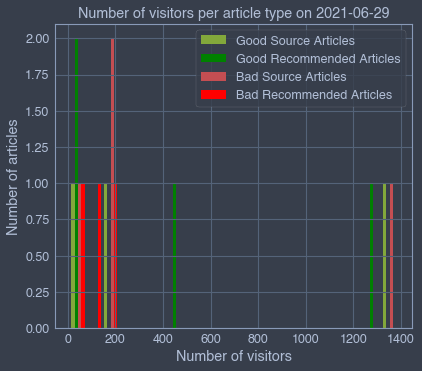

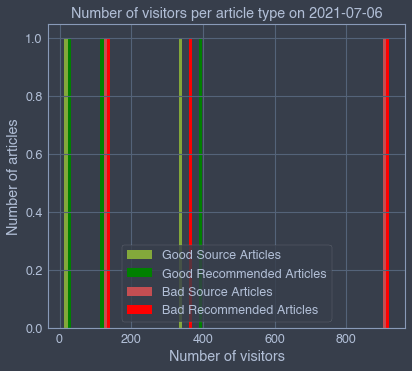

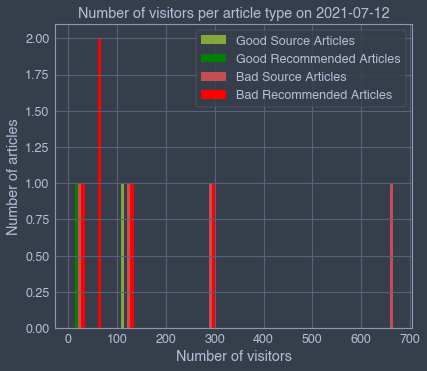

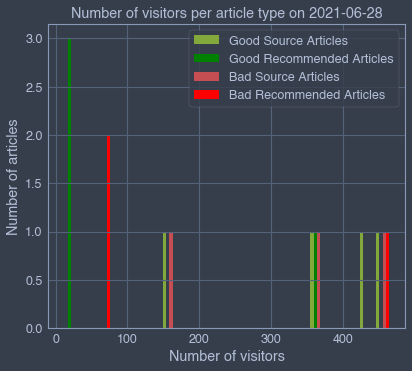

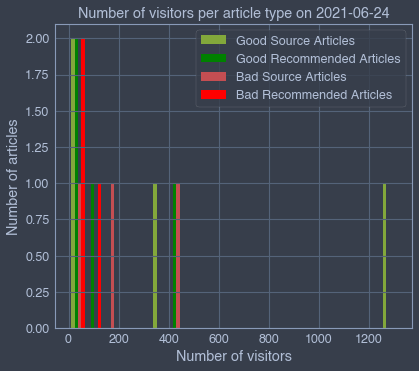

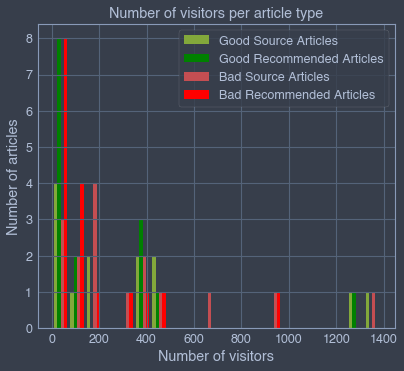

time: 4.95 s (started: 2021-07-13 00:41:20 -04:00)


In [122]:
for day in set(pd.to_datetime(qa_df.date)):
    plot_number_of_vistors(data_df, day)
    
plot_number_of_vistors(data_df)

There doesn't seem to be a clear pattern in engagement for either the source or recommended articles in the case of good or bad recommendations.

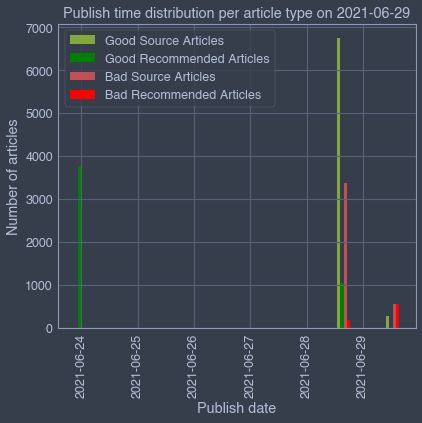

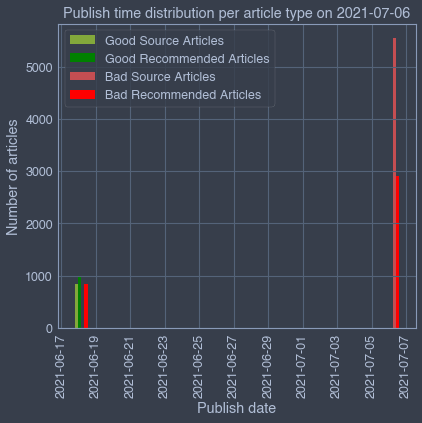

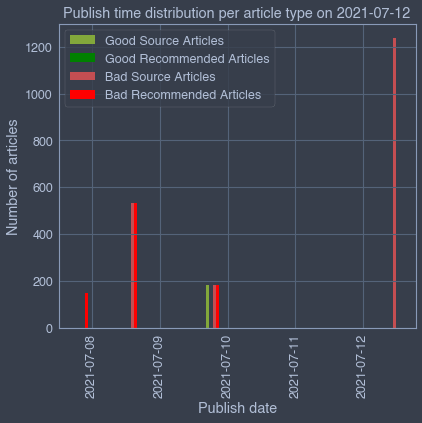

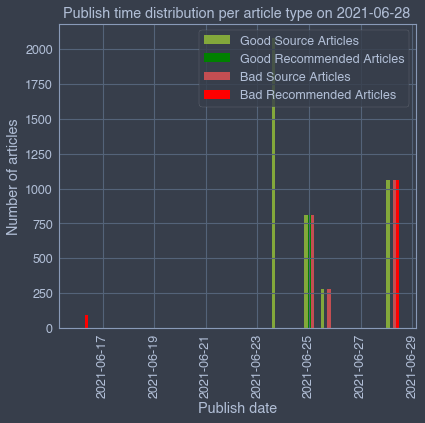

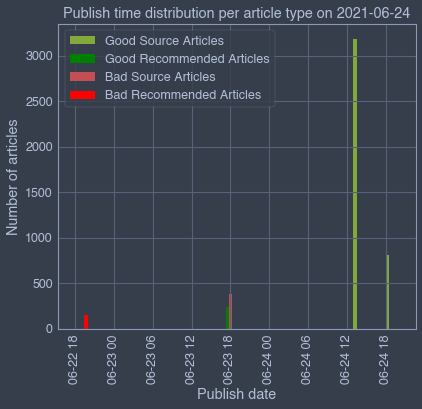

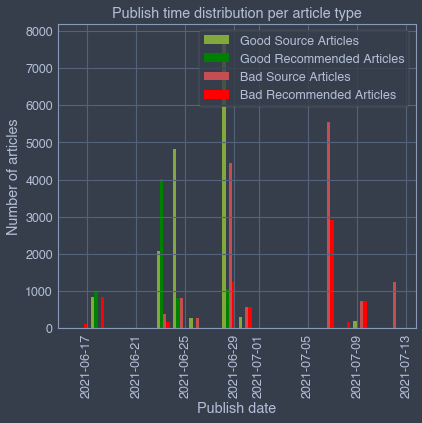

time: 6.21 s (started: 2021-07-13 00:41:25 -04:00)


In [123]:
for day in set(pd.to_datetime(qa_df.date)):
    plot_publish_dates(data_df, day)
    
plot_publish_dates(data_df)

It does seem like older source articles tended to yield better recommendations, perhaps due to the longer lead-up time to elicit relations between reader browsing habits. Perhaps it might be a good idea to have articles newer than two weeks default to default recommendations?